In [2]:
# Import packages:
import joblib
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), "lib"))
from model.base_intensity import ConstantBaseIntensity, SineBaseIntensity
from model.kernels import ExponentialKernel
from model.mark_density import TextualMarkDensity
from model.source_identify_model import SourceIdentifyModel
from sklearn.feature_extraction.text import CountVectorizer
import unicodedata

In [3]:
# Process the reddit_political_comments.csv and export as reddit_DATA.pkl format:
df = pd.read_csv('reddit_political_comments_10_30.csv',
                 parse_dates=['date_time'], encoding='ISO-8859-1"', error_bad_lines=False)

df.sort_values('date_time', ascending=True, inplace=True)

vectorizer = CountVectorizer(min_df=1, max_df=0.8, stop_words='english').fit(df.text_mark)

temp = vectorizer.transform(df.text_mark)
idx = temp.sum(axis=1).getA1() != 0
df = df[idx]
temp = temp[idx]

df['bow'] = [temp[i, :] for i in range(temp.shape[0])]

start_date = df.date_time.min().to_datetime64()

dimen_code = {}
for s in df.source:
    if s not in dimen_code:
        dimen_code[s] = len(dimen_code)

events = []
for i in range(len(df)):
    t = (df.iloc[i].date_time - start_date) / pd.to_timedelta('1s')
    s = dimen_code[df.iloc[i].source]
    x = df.iloc[i].bow
    events.append((t, s, x))

export_data = {
    'dataframe': df,
    "events": events,
    "start_date": start_date,
    "dimen_code": dimen_code,
    "vocabulary": vectorizer.vocabulary_
}

output_path = "reddit_DATA.pkl"

joblib.dump(export_data, output_path)

['reddit_DATA.pkl']

In [4]:
# Read in data:
data = joblib.load("reddit_DATA.pkl")

In [5]:
# Enter specifications:
base_constant = 1.
kernel_scale = 450
c_proportion = .67 #.1

In [6]:
# Configure the model:
n_dimensions = len(data['dimen_code'])
n_features = len(data['vocabulary'])
config = {}
config['base_intensities'] = [ConstantBaseIntensity(base_constant)
                                  for _ in range(n_dimensions)]
config['kernels'] = [ExponentialKernel(scale=kernel_scale)
                     for _ in range(n_dimensions)]
config["mark_density"] = TextualMarkDensity(n_features,
                                            lengths=np.zeros(n_dimensions),
                                            feature_probs=None,
                                            weight=None)

# Create the model:
model = SourceIdentifyModel(n_dimensions, **config)

In [8]:
# Fit the model:
model_fit = model.fit(data['events'], c_proportion, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00118686  0.00210876  0.0083936   0.00052774  0.01578622
  0.00840707  0.00473704  0.00473261  0.00643261  0.00118682  0.00210859
  0.00210851  0.0032908   0.00329166  0.00052785  0.00329148  0.00329054
  0.00643484  0.00052773  0.00210801  0.0011868   0.00473147  0.00643128
  0.00052783  0.00210788  0.01061893  0.00210801  0.00210935  0.00473376
  0.00210864  0.00118699  0.00210795  0.00013198  0.00473458  0.00329147
  0.00118666  0.00840064  0.00052777  0.00643841  0.00210859  0.00013198
  0.00118695  0.0047343   0.00329078  0.00118683  0.00118691  0.00210881
  0.00013198  0.00013198  0.0047347   0.00118682  0.00473388  0.0032919
  0.00118688  0.00118668  0.00013198  0.00013198  0.00013198  0.00013198
  0.00839409  0.00013198  0.00052774  0.00118669  0.00052779  0.00052785
  0.00052775  0.00118729  0.00013198  0.00329024  0.00013198  0.00118674
  0.00329073  0.00013198  0.00052775  0.00052785  0.00052775  0.00118719
  0.00052787  0.0047356   0.00329145  0.00013198  0.

  1%|          | 1/100 [00:22<36:34, 22.16s/it]

[  0.00000000e+00   1.03805258e-06   1.51436404e-06   9.34483252e-06
   4.38862639e-07   1.62467471e-05   6.09581625e-06   1.95804544e-06
   3.91903626e-06   6.35978655e-06   6.75685457e-07   1.08080767e-06
   1.48929948e-06   2.44449257e-06   3.01688459e-06   2.35048094e-07
   1.61492982e-06   2.46819403e-06   6.70278190e-06   4.64402927e-07
   1.56181566e-06   5.61253948e-07   4.33497451e-06   6.61849507e-06
   1.98082196e-07   1.70244774e-06   3.09954247e-06   1.24432364e-06
   7.41408820e-07   2.14331720e-06   1.00946058e-06   5.04875281e-07
   1.26694296e-06   8.09528536e-08   3.97537193e-06   1.63773133e-06
   8.78913331e-07   5.88033518e-06   1.74357568e-07   2.42031756e-06
   9.31063186e-07   7.36076487e-08   5.28021904e-07   1.95425645e-06
   1.62608013e-06   4.27997548e-07   4.01064522e-07   7.29594560e-07
   7.02515771e-08   6.90154112e-08   1.99146707e-06   3.89165921e-07
   2.13721924e-06   1.49989093e-06   4.17017547e-07   6.67723717e-07
   5.94428731e-08   5.00160701e-08

  2%|▏         | 2/100 [00:45<36:58, 22.64s/it]

[  0.00000000e+00   1.13040796e-09   1.52714482e-09   1.83683670e-08
   4.21381353e-10   3.85860280e-08   9.32936512e-09   1.87671316e-09
   5.56731984e-09   1.11506686e-08   5.71691990e-10   9.07591873e-10
   1.54262884e-09   3.10717654e-09   4.26998306e-09   1.58492029e-10
   1.48330038e-09   3.01288682e-09   1.22484354e-08   4.93353801e-10
   1.58011124e-09   4.21466058e-10   6.82581767e-09   1.22511692e-08
   1.20335158e-10   1.97356359e-09   3.54368825e-09   1.17785414e-09
   4.88874151e-10   2.18643374e-09   8.63264253e-10   3.34568069e-10
   1.21998884e-09   5.77980433e-11   6.11324285e-09   1.60295614e-09
   8.68523558e-10   1.02103735e-08   9.53425710e-11   2.58212356e-09
   7.44073646e-10   5.01981143e-11   3.70880116e-10   1.90742787e-09
   1.56486376e-09   2.55099472e-10   2.35560970e-10   4.97891455e-10
   4.45796793e-11   4.30225777e-11   1.97912170e-09   2.23130828e-10
   2.09236649e-09   1.43106157e-09   2.56886303e-10   5.57798405e-10
   3.48186492e-11   2.81434255e-11

  3%|▎         | 3/100 [01:09<36:49, 22.78s/it]

[  0.00000000e+00   1.10967205e-12   1.25908793e-12   2.84032052e-11
   3.83824822e-13   6.83414106e-11   1.06533450e-11   1.41019828e-12
   6.41400228e-12   1.62101577e-11   4.34166197e-13   6.30563260e-13
   1.37346921e-12   3.47402187e-12   5.19252367e-12   9.98009795e-14
   1.09823596e-12   3.10464048e-12   1.84941106e-11   5.23143412e-13
   1.40151062e-12   2.77180038e-13   9.23252093e-12   1.86181085e-11
   6.66885275e-14   2.01673978e-12   3.30905442e-12   9.34267382e-13
   2.52979153e-13   1.71403981e-12   6.33965582e-13   1.85636710e-13
   1.01347733e-12   4.01334874e-14   7.90182525e-12   1.28731029e-12
   8.01844010e-13   1.32925849e-11   4.75400531e-14   2.05829418e-12
   4.83760236e-13   3.26755027e-14   2.21998359e-13   1.40684710e-12
   1.21631435e-12   1.26100626e-13   1.14932778e-13   2.69543096e-13
   2.65180121e-14   2.51407808e-14   1.49821118e-12   1.05033310e-13
   1.57930429e-12   1.07715946e-12   1.31208377e-13   4.15870387e-13
   1.84493142e-14   1.47037688e-14

  4%|▍         | 4/100 [01:32<36:55, 23.08s/it]

[  0.00000000e+00   1.09000758e-15   1.03809269e-15   4.38805399e-14
   3.49884969e-16   1.20924690e-13   1.21570643e-14   1.06355606e-15
   7.38884993e-15   2.35868965e-14   3.30514757e-16   4.38674589e-16
   1.22328679e-15   3.89789613e-15   6.31682153e-15   6.31084849e-17
   8.14155607e-16   3.20053302e-15   2.79207341e-14   5.56091354e-16
   1.24252484e-15   1.82694473e-16   1.24991231e-14   2.82778427e-14
   3.71215223e-17   2.06112963e-15   3.11617821e-15   7.40976415e-16
   1.30984780e-16   1.34357271e-15   4.66595605e-16   1.03019290e-16
   8.42505106e-16   2.79021704e-17   1.02233011e-14   1.03502739e-15
   7.41149588e-16   1.72846169e-14   2.38004330e-17   1.64074787e-15
   3.14449045e-16   2.12986228e-17   1.32920264e-16   1.03673255e-15
   9.45255294e-16   6.23421912e-17   5.61258796e-17   1.45909673e-16
   1.57822866e-17   1.46989723e-17   1.13317144e-15   4.94512238e-17
   1.19060610e-15   8.10512240e-16   6.70308506e-17   3.10237843e-16
   9.78154336e-18   7.70592434e-18

  5%|▌         | 5/100 [01:55<36:26, 23.01s/it]

[  0.00000000e+00   1.07083826e-18   8.55994196e-19   6.77989394e-17
   3.18989394e-19   2.14025777e-16   1.38761978e-17   8.02795243e-19
   8.51336173e-18   3.43314416e-17   2.51716146e-19   3.05282018e-19
   1.08967436e-18   4.37633036e-18   7.68573125e-18   3.99334670e-20
   6.03781305e-19   3.29999144e-18   4.21579063e-17   5.91343448e-19
   1.10157236e-18   1.20467215e-19   1.69260501e-17   4.29535207e-17
   2.06783004e-20   2.10669391e-18   2.93944127e-18   5.87733668e-19
   6.78368077e-20   1.05343925e-18   3.43562396e-19   5.71769825e-20
   7.00518750e-19   1.94024443e-20   1.32304934e-17   8.32466107e-19
   6.85197742e-19   2.24788382e-17   1.19234272e-20   1.30836049e-18
   2.04414898e-19   1.38860839e-20   7.95947052e-20   7.64094698e-19
   7.34707217e-19   3.08246180e-20   2.74147691e-20   7.89953600e-20
   9.39379921e-21   8.59483550e-21   8.57185242e-19   2.32856377e-20
   8.97625574e-19   6.09956609e-19   3.42488701e-20   2.31473602e-19
   5.18669718e-21   4.04061039e-21

In [38]:
# Collect baseline comment rates and source source influences and compute root probabilities: 
baseline_comment_rates = model.base_intensity_weights
source_source_influences = model.influential_matrix
root_probs = model.eval_rooted_proba(data['events'])


0it [00:00, ?it/s]
6it [00:00, 54.55it/s]
11it [00:00, 50.52it/s]
16it [00:00, 48.04it/s]
20it [00:00, 44.11it/s]
24it [00:00, 41.72it/s]
28it [00:00, 39.72it/s]

32it [00:00, 34.81it/s]
36it [00:00, 33.66it/s]
40it [00:01, 32.58it/s]
44it [00:01, 31.56it/s]
48it [00:01, 30.60it/s]
52it [00:01, 29.43it/s]
55it [00:01, 28.26it/s]
58it [00:01, 26.90it/s]
61it [00:01, 26.30it/s]
64it [00:01, 25.37it/s]
67it [00:02, 24.04it/s]
70it [00:02, 22.98it/s]
73it [00:02, 22.49it/s]
76it [00:02, 21.87it/s]
79it [00:02, 21.69it/s]
82it [00:02, 20.63it/s]
85it [00:03, 19.75it/s]
87it [00:03, 18.87it/s]
89it [00:03, 18.76it/s]
91it [00:03, 18.48it/s]
93it [00:03, 18.29it/s]
95it [00:03, 18.06it/s]
97it [00:03, 17.62it/s]
99it [00:03, 17.32it/s]
101it [00:03, 17.12it/s]
103it [00:04, 16.81it/s]
105it [00:04, 16.94it/s]
107it [00:04, 16.69it/s]
109it [00:04, 16.68it/s]
111it [00:04, 16.35it/s]
113it [00:04, 15.67it/s]
115it [00:04, 15.66it/s]
117it [00:04, 15.80it/s]
119it [00:05, 15.45it/s]
121it [00:

In [40]:
# Save the results:
# Collect source names:
source_dict = dict((v,k) for k,v in data['dimen_code'].iteritems())
source_names = [source_dict[i] for i in range(len(source_dict))] 
# Create data frames of reddit_data, root probs, influence matrix, and baseline comment rates:
reddit_data_df = data['dataframe']
baseline_comment_rates_df = pd.DataFrame(baseline_comment_rates)
source_source_influences_df = pd.DataFrame(source_source_influences, columns = source_names)
root_probs_df = pd.DataFrame(root_probs, columns = source_names)
# Write to .csv:
reddit_data_df.to_csv("reddit_data_" + "kernel_scale=" + str(kernel_scale) + "_c_prop=" + str(c_proportion) + ".csv", index=False, encoding = "utf-8")
baseline_comment_rates_df.to_csv("baseline_comment_rates_" + "kernel_scale=" + str(kernel_scale) + "_c_prop=" + str(c_proportion) + ".csv", index=False)
source_source_influences_df.to_csv("source_source_influences_" + "kernel_scale=" + str(kernel_scale) + "_c_prop=" + str(c_proportion) + ".csv", index=False)
root_probs_df.to_csv("root_probs_" + "kernel_scale=" + str(kernel_scale) + "_c_prop=" + str(c_proportion) + ".csv", index=False)

In [41]:
source_source_influences_df.head()

bwaredapenguin  LadyEeaterOfBacon      alfred-o  smokedspirit  \
0      0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
1      1.070838e-18       4.768287e-21  4.909681e-17  4.422223e-16   
2      8.559942e-19       2.062218e-17  1.579983e-17  1.080136e-14   
3      6.779894e-17       4.964813e-15  5.460316e-15  1.582591e-13   
4      3.189894e-19       6.321073e-18  4.975034e-19  1.487794e-16   
5      2.140258e-16       6.142204e-14  7.543657e-14  1.463397e-11   
6      1.387620e-17       1.341720e-14  9.670614e-14  4.143285e-13   
7      8.027952e-19       1.132313e-15  1.163693e-14  2.976261e-13   
8      8.513362e-18       5.157811e-16  3.738513e-16  5.187690e-13   
9      3.433144e-17       1.473156e-15  4.200412e-16  2.052364e-13   
10     2.517161e-19       1.530467e-17  3.896418e-18  1.892286e-15   
11     3.052820e-19       1.393726e-17  2.302852e-15  4.077691e-14   
12     1.089674e-18       1.231267e-16  1.513303e-16  4.568502e-15   
13     4.376330e-18       1.547226e-16  1.407211e-16  6.215043e-14   
14     7.685731e-18       1.559041e-16  2.264827e-16  1.781349e-14   
15     3.993347e-20       1.734249e-18  1.467386e-17  1.350815e-17   
16     6.037813e-19       9.664784e-17  2.043908e-16  8.124595e-14   
17     3.299991e-18       2.269811e-16  2.051592e-16  5.750256e-14   
18     4.215791e-17       1.389872e-15  1.857182e-15  1.364063e-13   
19     5.913434e-19       6.682212e-19  9.651664e-19  2.686163e-17   
20     1.101572e-18       5.393966e-17  1.784274e-17  4.190857e-15   
21     1.204672e-19       8.057081e-18  3.427361e-18  5.652328e-15   
22     1.692605e-17       2.471433e-16  1.612062e-16  3.621113e-14   
23     4.295352e-17       7.421241e-16  1.889653e-16  3.613470e-13   
24     2.067830e-20       2.087954e-18  2.284612e-17  1.821177e-17   
25     2.106694e-18       1.282174e-16  3.310661e-18  8.254444e-15   
26     2.939441e-18       6.919727e-15  1.474912e-14  2.936592e-12   
27     5.877337e-19       1.917090e-16  9.166432e-19  9.985805e-15   
28     6.783681e-20       1.253079e-16  2.483239e-15  3.189429e-14   
29     1.053439e-18       5.220897e-16  2.845826e-16  7.780317e-13   
..              ...                ...           ...           ...   
112    1.745729e-23       1.557883e-19  5.968068e-18  2.492720e-15   
113    5.630352e-24       4.013006e-18  1.440727e-16  1.843015e-15   
114    2.404111e-24       2.145422e-20  7.824668e-19  3.435371e-16   
115    3.477137e-24       2.603731e-18  9.267360e-17  1.145196e-15   
116    1.464174e-24       1.306625e-20  4.765453e-19  2.074364e-16   
117    1.120293e-23       9.997459e-20  3.653946e-18  1.615770e-15   
118    1.231938e-24       1.099378e-20  4.009593e-19  1.745344e-16   
119    1.147781e-24       1.024276e-20  3.745461e-19  1.682410e-16   
120    3.916124e-24       3.494737e-20  1.278920e-18  1.754914e-15   
121    1.273477e-24       1.761198e-18  6.153539e-17  5.049679e-16   
122    3.201656e-25       2.857148e-21  1.045611e-19  4.668127e-17   
123    1.665449e-25       1.486242e-21  5.420543e-20  2.814539e-16   
124    1.435860e-25       1.281357e-21  4.673297e-20  2.426542e-16   
125    1.419995e-25       1.267199e-21  4.621662e-20  2.409814e-16   
126    1.162608e-25       1.037507e-21  3.783942e-20  1.964758e-16   
127    4.425743e-25       7.961999e-19  2.761698e-17  7.479319e-16   
128    7.825948e-25       2.526716e-18  8.634390e-17  1.322552e-15   
129    4.021415e-25       3.379496e-17  1.202030e-15  7.044705e-16   
130    2.345254e-26       1.946858e-18  6.993144e-17  3.963380e-17   
131    1.957186e-26       1.624713e-18  5.839259e-17  3.360902e-17   
132    8.870904e-25       7.363975e-17  2.645152e-15  1.499145e-15   
133    1.091707e-26       9.062549e-19  3.255282e-17  1.844938e-17   
134    1.042225e-26       8.651786e-19  3.107735e-17  1.761316e-17   
135    6.949758e-27       5.780494e-19  2.160205e-17  1.174480e-17   
136    4.730152e-27       3.926626e-19  1.410450e-17  7.993758e-18   
137    3.305307

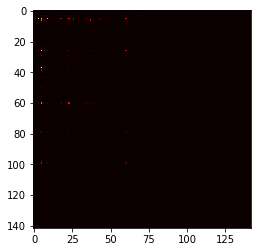

In [42]:
# Plot influence matrix:
plt.imshow(source_source_influences, cmap='hot')
plt.show()

In [43]:
# Evaluate and return the accuracy of the root probs on true root source:
root_cause_df = reddit_data_df['root_cause']
true_root_source_index = np.array([data['dimen_code'][source] for source in root_cause_df]) 
pred_root_source_index = np.argmax(root_probs, 1)
accuracy = (pred_root_source_index == true_root_source_index).mean()
accuracy

In [45]:
# Find whether each comment has source the same as the root source (call this is_same), 
# and then find whether each comment has predicted root source the same as true root source (call this is_right).
# All 426 comments either are accurate when the source is the root source, or inaccurate otherwise.
is_same = reddit_data_df['source'] == reddit_data_df['root_cause']
num_source_is_root = sum(is_same)
num_total = reddit_data_df.shape[0]
is_right = pred_root_source_index == true_root_source_index
#float(num_source_is_root)/float(num_total)
sum(is_right == is_same)

426

In [ ]:
# Note the order of comments in df is slightly different from that of reddit_politics_comments.csv due to 
# the time ordering. For posts that are at the same time, the criteria to sort them differ.

In [57]:
#reddit_data_df = data['dataframe']
#reddit_data_df

date_time                source  \
0   2016-11-08 22:38:21        bwaredapenguin   
1   2016-11-08 22:38:32     LadyEeaterOfBacon   
2   2016-11-08 22:39:01              alfred-o   
3   2016-11-08 22:39:14          smokedspirit   
4   2016-11-08 22:39:19       thesilvertongue   
5   2016-11-08 22:39:28               ECrispy   
6   2016-11-08 22:39:35      Raidernationprez   
7   2016-11-08 22:40:18           Hatewrecked   
8   2016-11-08 22:40:19      ShooterMcGavin44   
9   2016-11-08 22:40:27               mcatech   
10  2016-11-08 22:40:39              Shizaruu   
11  2016-11-08 22:40:46           thatoneguys   
12  2016-11-08 22:40:49            xPhilly215   
13  2016-11-08 22:40:50                Risley   
14  2016-11-08 22:40:52            philphan25   
15  2016-11-08 22:41:01             Blaylocke   
16  2016-11-08 22:41:26            KillJoy575   
17  2016-11-08 22:41:41                 cl33t   
18  2016-11-08 22:41:43     C-in-parentheses-   
19  2016-11-08 22:41:48              pb2crazy   
20  2016-11-08 22:41:51             PC_Viking   
21  2016-11-08 22:41:52               Mcfooce   
22  2016-11-08 22:41:55      pm_me_POTUS_pics   
23  2016-11-08 22:41:58       cucklordsupreme   
24  2016-11-08 22:42:03                merr14   
25  2016-11-08 22:42:09              rattrayc   
26  2016-11-08 22:42:11       system_exposure   
27  2016-11-08 22:42:12        Speak_and_tell   
28  2016-11-08 22:42:18               mcatech   
29  2016-11-08 22:42:20          smokedspirit   
..                  ...                   ...   
396 2016-11-08 23:06:13        Pickled_Kagura   
397 2016-11-08 23:06:19     ToChallengeTheSun   
399 2016-11-08 23:06:28      Raidernationprez   
398 2016-11-08 23:06:28        Dr_broadnoodle   
400 2016-11-08 23:06:34       Kemosabenohobby   
401 2016-11-08 23:06:43               ChemLok   
402 2016-11-08 23:06:44              Wild2098   
403 2016-11-08 23:06:51              Lucioohs   
404 2016-11-08 23:06:53          JurijFedorov   
405 2016-11-08 23:06:59   WigglestonTheFourth   
406 2016-11-08 23:07:00        Twin_Nets_Jets   
407 2016-11-08 23:07:08           skinnytrees   
408 2016-11-08 23:07:14   musingsofaninnocent   
409 2016-11-08 23:07:22        NemesisPrimev2   
410 2016-11-08 23:07:25             Blaylocke   
411 2016-11-08 23:07:27            philphan25   
412 2016-11-08 23:07:28     ToChallengeTheSun   
413 2016-11-08 23:07:29         CatrichChilly   
414 2016-11-08 23:07:31      Problem119V-0800   
415 2016-11-08 23:07:33              Zidanazo   
416 2016-11-08 23:07:35      ReallyYouDontSay   
417 2016-11-08 23:07:39     C-in-parentheses-   
418 2016-11-08 23:08:11      Raidernationprez   
419 2016-11-08 23:08:12       system_exposure   
420 2016-11-08 23:08:12              paulinbc   
421 2016-11-08 23:08:14       themilkman42069   
422 2016-11-08 23:08:15              docmedic   
423 2016-11-08 23:08:15  brasidasofamphipolis   
424 2016-11-08 23:08:18          smokedspirit   
425 2016-11-08 23:08:21               ECrispy   

                                             text_mark  \
0    this is atrocious. i have never been more asha...   
1               which live sourc is the best to watch?   
2            if michigan goe trump it all over right?    
3                              virginia goe to clinton   
4    at least the late night comedian will have mor...   
5    is there ani chanc she win now???i have no hop...   
6     http://www.nytimes.com/elections/forecast/presid   
7    make no mistake: the dnc will move right if tr...   
8    so the peopl work for the dnc career are ruined.    
9                    wow....asian market are free fall   
10   i am live in seoul, just woke up. is trump ser...   
11   nyt project trump with a 91% chanc of winning....   
12                                 trump grow in mi...   
13                              lol **dow futur >600**   
14                   look like michigan and wisconsin.   
15   for all of you young people: if your candi

In [59]:
(pd.DataFrame(np.argmax(root_probs, 1)+1)).to_csv("preds.csv",index=False)

In [60]:
# Evaluate the log likelihood of the root probs on true root source:
#log_lik = 0
#for i in range(len(root_source)):
#    log_lik += np.log(root_probs[i, data['dimen_code'][root_source[i]]])
#log_lik

In [64]:
# Make function to take a kernel scale, train a model, save root probs, influence matrix, base comment rate, 
# and return an accuracy:
def calc_acc_given_params(kernel_scale, c_proportion):
    
    # Enter specifications:
    base_constant = 1.
    kernel_scale = kernel_scale
    c_proportion = c_proportion
    
    # Configure the model:
    n_dimensions = len(data['dimen_code'])
    n_features = len(data['vocabulary'])
    config = {}
    config['base_intensities'] = [ConstantBaseIntensity(base_constant)
                                      for _ in range(n_dimensions)]
    config['kernels'] = [ExponentialKernel(scale=kernel_scale)
                         for _ in range(n_dimensions)]
    config["mark_density"] = TextualMarkDensity(n_features,
                                                lengths=np.zeros(n_dimensions),
                                                feature_probs=None,
                                                weight=None)
    
    # Create the model:
    model = SourceIdentifyModel(n_dimensions, **config)
    
    # Fit the model:
    model_fit = model.fit(data['events'], c_proportion = c_proportion, verbose=True)
    
    # Collect baseline comment rates and source source influences and compute root probabilities: 
    baseline_comment_rates = model.base_intensity_weights
    source_source_influences = model.influential_matrix
    root_probs = model.eval_rooted_proba(data['events'])
    
    # Save the results:
    # Collect source names:
    source_dict = dict((v,k) for k,v in data['dimen_code'].iteritems())
    source_names = [source_dict[i] for i in range(len(source_dict))] 
    
    # Create data frames of root probs, influence matrix, and baseline comment rates:
    baseline_comment_rates_df = pd.DataFrame(baseline_comment_rates)
    source_source_influences_df = pd.DataFrame(source_source_influences, columns = source_names)
    root_probs_df = pd.DataFrame(root_probs, columns = source_names)

    # Write to .csv:
    baseline_comment_rates_df.to_csv("baseline_comment_rates_" + "kernel_scale=" + str(kernel_scale) + "c_prop=" + str(c_proportion) + ".csv")
    source_source_influences_df.to_csv("source_source_influences_" + "kernel_scale=" + str(kernel_scale) + "c_prop=" + str(c_proportion) + ".csv")
    root_probs_df.to_csv("root_probs_" + "kernel_scale=" + str(kernel_scale) + "c_prop=" + str(c_proportion) + ".csv")
    
    # Read in true root source:
    root_source = data["dataframe"]["root_cause"]
    
    # Evaluate and return the accuracy of the root probs on true root source:
    true_root_source_index = np.array([data['dimen_code'][source] for source in root_source]) 
    pred_root_source_index = np.argmax(root_probs, 1)
    accuracy = (pred_root_source_index == true_root_source_index).mean()
    
    # print the accuracy and the model:
    print("kernel_scale=" + str(kernel_scale) + "c_prop=" + str(c_proportion) + " accuracy:")
    print(accuracy)
    
    return(accuracy)

In [65]:
# Loop through the kernel scales and calculate an accuracy for each:
accuracies = np.zeros((5, 5))
c_proportions = np.array([.1, .3, .5, .7, .9])
kernel_scales = np.array([2, 8, 32, 128, 512])
for i in range(len(kernel_scales)):
    for j in range(len(c_proportions)):
        accuracies[i,j] = calc_acc_given_params(kernel_scales[i], c_proportions[j])

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00107651  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

  1%|▊                                                                                 | 1/100 [00:02<03:32,  2.15s/it]

[  0.00000000e+00   8.74977093e-06   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:04<03:41,  2.26s/it]

[  0.00000000e+00   9.48077378e-08   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:07<03:49,  2.37s/it]

[  0.00000000e+00   9.67454859e-10   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:09<03:52,  2.42s/it]

[  0.00000000e+00   9.59435074e-12   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:12<03:43,  2.35s/it]

[  0.00000000e+00   9.34051090e-14   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  6%|████▉                                                                             | 6/100 [00:14<03:39,  2.34s/it]

[  0.00000000e+00   8.97687044e-16   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  7%|█████▋                                                                            | 7/100 [00:16<03:33,  2.30s/it]

[  0.00000000e+00   8.54685089e-18   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  8%|██████▌                                                                           | 8/100 [00:19<03:41,  2.41s/it]

[  0.00000000e+00   8.08049915e-20   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  9%|███████▍                                                                          | 9/100 [00:22<03:50,  2.54s/it]

[  0.00000000e+00   7.59868629e-22   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 10%|████████                                                                         | 10/100 [00:24<03:54,  2.61s/it]

[  0.00000000e+00   7.11584591e-24   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 11%|████████▉                                                                        | 11/100 [00:27<03:53,  2.62s/it]

[  0.00000000e+00   6.64183607e-26   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 12%|█████████▋                                                                       | 12/100 [00:30<03:55,  2.67s/it]

[  0.00000000e+00   6.18323799e-28   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 13%|██████████▌                                                                      | 13/100 [00:32<03:41,  2.55s/it]

[  0.00000000e+00   5.74427811e-30   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 14%|███████████▎                                                                     | 14/100 [00:33<03:08,  2.19s/it]

[  0.00000000e+00   5.32749086e-32   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 15%|████████████▏                                                                    | 15/100 [00:36<03:09,  2.23s/it]

[  0.00000000e+00   4.93419932e-34   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 16%|████████████▉                                                                    | 16/100 [00:38<03:06,  2.22s/it]

[  0.00000000e+00   4.56486576e-36   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 17%|█████████████▊                                                                   | 17/100 [00:40<03:05,  2.24s/it]

[  0.00000000e+00   4.21934827e-38   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 18%|██████████████▌                                                                  | 18/100 [00:42<03:04,  2.25s/it]

[  0.00000000e+00   3.89708884e-40   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 19%|███████████████▍                                                                 | 19/100 [00:45<03:02,  2.26s/it]

[  0.00000000e+00   3.59725119e-42   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 20%|████████████████▏                                                                | 20/100 [00:46<02:40,  2.01s/it]

[  0.00000000e+00   3.31882153e-44   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 21%|█████████████████                                                                | 21/100 [00:48<02:43,  2.08s/it]

[  0.00000000e+00   3.06068183e-46   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 22%|█████████████████▊                                                               | 22/100 [00:51<02:46,  2.14s/it]

[  0.00000000e+00   2.82166279e-48   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 23%|██████████████████▋                                                              | 23/100 [00:52<02:32,  1.98s/it]

[  0.00000000e+00   2.60058168e-50   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 24%|███████████████████▍                                                             | 24/100 [00:53<02:12,  1.74s/it]

[  0.00000000e+00   2.39626896e-52   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 25%|████████████████████▎                                                            | 25/100 [00:56<02:23,  1.91s/it]

[  0.00000000e+00   2.20758665e-54   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 26%|█████████████████████                                                            | 26/100 [00:58<02:31,  2.05s/it]

[  0.00000000e+00   2.03344050e-56   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 27%|█████████████████████▊                                                           | 27/100 [01:00<02:34,  2.12s/it]

[  0.00000000e+00   1.87278770e-58   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 28%|██████████████████████▋                                                          | 28/100 [01:03<02:35,  2.16s/it]

[  0.00000000e+00   1.72464133e-60   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 29%|███████████████████████▍                                                         | 29/100 [01:05<02:36,  2.20s/it]

[  0.00000000e+00   1.58807231e-62   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 30%|████████████████████████▎                                                        | 30/100 [01:07<02:35,  2.22s/it]

[  0.00000000e+00   1.46220977e-64   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
10it [00:00, 97.09it/s]
19it [00:00, 92.51it/s]
28it [00:00, 88.75it/s]
36it [00:00, 85.11it/s]
44it [00:00, 82.48it/s]
51it [00:00, 69.03it/s]
58it [00:00, 60.98it/s]
64it [00:00, 57.21it/s]
70it [00:01, 53.09it/s]
76it [00:01, 49.91it/s]
81it [00:01, 46.85it/s]
86it [00:01, 46.68it/s]
91it [00:01, 46.31it/s]
96it [00:01, 47.09it/s]
101it [00:01, 46.59it/s]
106it [00:01, 45.73it/s]
111it [00:01, 46.16it/s]
116it [00:02, 46.20it/s]
121it [00:02, 45.85it/s]
126it [00:02, 45.98it/s]
131it [00:02, 46.20it/s]
136it [00:02, 45.85it/s]
141it [00:02, 44.75it/s]
146it [00:02, 43.89it/s]
151it [00:02, 43.54it/s]
156it [00:02, 43.18it/s]
161it [00:03, 43.84it/s]
166it [00:03, 44.43it/s]
171it [00:03, 44.49it/s]
176it [00:03, 44.78it/s]
181it [00:03, 45.35it/s]
186it [00:03, 45.01it/s]
191it [00:03, 43.84it/s]
196it [00:03, 44.31it/s]
201it [00:03, 45.01it/s]
206it [00:04, 45.14it/s]
211it [00:04, 45.24it/s]
216it [00:04, 45.80it/s]
221it [00:04, 46.20it/s]
226it [00:04, 46.10

kernel_scale=2c_prop=0.1 accuracy:
0.636150234742



  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00083789  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

[ 2018-01-02 17:16:56,078][source_identify_model.fit] iter=1,	obj=-3.06833e+06



  1%|▊                                                                                 | 1/100 [00:02<04:20,  2.64s/it]

[  0.00000000e+00   2.09998038e-06   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  2%|█▋                                                                                | 2/100 [00:04<04:09,  2.54s/it]

[  0.00000000e+00   6.16088547e-09   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  3%|██▍                                                                               | 3/100 [00:07<03:59,  2.47s/it]

[  0.00000000e+00   1.69461340e-11   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  4%|███▎                                                                              | 4/100 [00:08<03:26,  2.16s/it]

[  0.00000000e+00   4.57290771e-14   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  5%|████                                                                              | 5/100 [00:09<02:54,  1.84s/it]

[  0.00000000e+00   1.22596183e-16   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  6%|████▉                                                                             | 6/100 [00:11<03:00,  1.92s/it]

[  0.00000000e+00   3.27904089e-19   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  7%|█████▋                                                                            | 7/100 [00:13<02:48,  1.81s/it]

[  0.00000000e+00   8.76276224e-22   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  8%|██████▌                                                                           | 8/100 [00:15<03:01,  1.98s/it]

[  0.00000000e+00   2.34095256e-24   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


  9%|███████▍                                                                          | 9/100 [00:18<03:06,  2.05s/it]

[  0.00000000e+00   6.25301065e-27   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


 10%|████████                                                                         | 10/100 [00:20<03:10,  2.12s/it]

[  0.00000000e+00   1.67018380e-29   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


 11%|████████▉                                                                        | 11/100 [00:22<03:12,  2.17s/it]

[  0.00000000e+00   4.46098686e-32   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


 12%|█████████▋                                                                       | 12/100 [00:24<03:13,  2.20s/it]

[  0.00000000e+00   1.19150071e-34   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


 13%|██████████▌                                                                      | 13/100 [00:26<02:51,  1.97s/it]

[  0.00000000e+00   3.18241165e-37   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


 14%|███████████▎                                                                     | 14/100 [00:28<02:53,  2.02s/it]

[  0.00000000e+00   8.49997970e-40   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00



0it [00:00, ?it/s]

12it [00:00, 110.09it/s]

22it [00:00, 106.52it/s]

32it [00:00, 102.23it/s]


42it [00:00, 101.24it/s]

53it [00:00, 101.71it/s]

65it [00:00, 104.08it/s]

76it [00:00, 103.11it/s]

86it [00:00, 78.19it/s] 

95it [00:01, 68.41it/s]

103it [00:01, 60.48it/s]

110it [00:01, 55.55it/s]

116it [00:01, 52.91it/s]

122it [00:01, 50.94it/s]

128it [00:01, 50.02it/s]

134it [00:01, 49.89it/s]

140it [00:02, 48.95it/s]

145it [00:02, 46.64it/s]

150it [00:02, 45.15it/s]

155it [00:02, 43.93it/s]

160it [00:02, 43.91it/s]

165it [00:02, 44.96it/s]

170it [00:02, 44.86it/s]

175it [00:02, 45.78it/s]

180it [00:02, 45.56it/s]

185it [00:03, 45.16it/s]

190it [00:03, 43.70it/s]

195it [00:03, 43.98it/s]

200it [00:03, 44.77it/s]

205it [00:03, 44.97it/s]

210it [00:03, 45.49it/s]

215it [00:03, 45.98it/s]

220it [00:03, 46.20it/s]

225it [00:03, 46.62it/s]

230it [00:04, 46.26it/s]

235it [00:04, 46.92it/s]

240it [00:04, 47.40it/s]

245it [00:04, 46.54it/s]

250it [00:04, 46

kernel_scale=2c_prop=0.3 accuracy:
0.730046948357


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00059892  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

  1%|▊                                                                                 | 1/100 [00:02<04:20,  2.64s/it]

[  0.00000000e+00   7.43759512e-07   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:05<04:15,  2.61s/it]

[  0.00000000e+00   1.03280430e-09   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:07<04:01,  2.49s/it]

[  0.00000000e+00   1.37609895e-12   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:09<03:53,  2.43s/it]

[  0.00000000e+00   1.82148066e-15   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:11<03:46,  2.38s/it]

[  0.00000000e+00   2.40816159e-18   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  6%|████▉                                                                             | 6/100 [00:14<03:41,  2.36s/it]

[  0.00000000e+00   3.18311201e-21   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  7%|█████▋                                                                            | 7/100 [00:16<03:36,  2.33s/it]

[  0.00000000e+00   4.20727058e-24   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  8%|██████▌                                                                           | 8/100 [00:18<03:33,  2.32s/it]

[  0.00000000e+00   5.56090637e-27   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
10it [00:00, 93.46it/s]
15it [00:00, 73.80it/s]
21it [00:00, 64.79it/s]
26it [00:00, 56.48it/s]
31it [00:00, 52.16it/s]
36it [00:00, 49.95it/s]
42it [00:00, 49.96it/s]
47it [00:00, 48.38it/s]
52it [00:01, 47.19it/s]
57it [00:01, 47.05it/s]
62it [00:01, 47.09it/s]
67it [00:01, 46.46it/s]
72it [00:01, 46.28it/s]
77it [00:01, 45.40it/s]
82it [00:01, 46.04it/s]
87it [00:01, 46.25it/s]
92it [00:01, 46.91it/s]
98it [00:01, 48.14it/s]
103it [00:02, 47.57it/s]
108it [00:02, 46.53it/s]
113it [00:02, 46.85it/s]
118it [00:02, 46.16it/s]
123it [00:02, 45.32it/s]
128it [00:02, 45.61it/s]
133it [00:02, 46.20it/s]
138it [00:02, 45.47it/s]
143it [00:02, 44.61it/s]
148it [00:03, 43.35it/s]
153it [00:03, 43.27it/s]
158it [00:03, 43.22it/s]
163it [00:03, 43.75it/s]
168it [00:03, 44.13it/s]
173it [00:03, 44.88it/s]
178it [00:03, 45.54it/s]
183it [00:03, 45.52it/s]
188it [00:04, 44.77it/s]
193it [00:04, 43.79it/s]
198it [00:04, 44.04it/s]
203it [00:04, 44.81it/s]
208it [00:04, 44.76it/s

kernel_scale=2c_prop=0.5 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00035961  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

  1%|▊                                                                                 | 1/100 [00:02<04:09,  2.52s/it]

[  0.00000000e+00   2.17203295e-07   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:04<04:00,  2.46s/it]

[  0.00000000e+00   1.42776157e-10   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:07<03:53,  2.40s/it]

[  0.00000000e+00   9.18819122e-14   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:09<03:47,  2.37s/it]

[  0.00000000e+00   5.90382125e-17   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:11<03:42,  2.34s/it]

[  0.00000000e+00   3.79294828e-20   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  6%|████▉                                                                             | 6/100 [00:13<03:13,  2.06s/it]

[  0.00000000e+00   2.43677248e-23   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
6it [00:00, 58.82it/s]
12it [00:00, 56.18it/s]
17it [00:00, 54.00it/s]
22it [00:00, 52.57it/s]
27it [00:00, 49.91it/s]
32it [00:00, 47.52it/s]
37it [00:00, 47.28it/s]
42it [00:00, 48.06it/s]
47it [00:00, 46.98it/s]
52it [00:01, 45.62it/s]
57it [00:01, 46.08it/s]
62it [00:01, 46.53it/s]
67it [00:01, 46.33it/s]
72it [00:01, 45.68it/s]
77it [00:01, 44.88it/s]
82it [00:01, 45.54it/s]
87it [00:01, 46.15it/s]
92it [00:01, 46.71it/s]
98it [00:02, 47.65it/s]
103it [00:02, 47.24it/s]
108it [00:02, 46.43it/s]
113it [00:02, 46.65it/s]
118it [00:02, 46.28it/s]
123it [00:02, 46.42it/s]
128it [00:02, 46.25it/s]
133it [00:02, 46.52it/s]
138it [00:02, 45.82it/s]
143it [00:03, 44.97it/s]
148it [00:03, 44.04it/s]
153it [00:03, 43.64it/s]
158it [00:03, 43.25it/s]
163it [00:03, 44.36it/s]
168it [00:03, 44.44it/s]
173it [00:03, 45.47it/s]
178it [00:03, 44.86it/s]
183it [00:03, 44.67it/s]
188it [00:04, 44.07it/s]
193it [00:04, 43.44it/s]
198it [00:04, 44.61it/s]
203it [00:04, 45.10it/s]


kernel_scale=2c_prop=0.7 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00011996  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

  1%|▊                                                                                 | 1/100 [00:02<04:33,  2.77s/it]

[  0.00000000e+00   2.10181910e-08   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:05<04:19,  2.65s/it]

[  0.00000000e+00   3.92822911e-12   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:07<04:15,  2.64s/it]

[  0.00000000e+00   7.31599801e-16   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:10<04:04,  2.55s/it]

[  0.00000000e+00   1.36285751e-19   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
9it [00:00, 88.24it/s]
18it [00:00, 85.71it/s]
26it [00:00, 82.87it/s]
34it [00:00, 80.26it/s]
42it [00:00, 79.94it/s]
49it [00:00, 68.97it/s]
56it [00:00, 59.10it/s]
62it [00:00, 54.81it/s]
68it [00:01, 49.95it/s]
73it [00:01, 47.14it/s]
78it [00:01, 45.85it/s]
83it [00:01, 45.11it/s]
88it [00:01, 45.34it/s]
93it [00:01, 45.50it/s]
98it [00:01, 45.36it/s]
103it [00:01, 43.95it/s]
108it [00:02, 42.91it/s]
113it [00:02, 43.41it/s]
118it [00:02, 43.43it/s]
123it [00:02, 43.33it/s]
128it [00:02, 42.49it/s]
133it [00:02, 42.67it/s]
138it [00:02, 43.59it/s]
143it [00:02, 43.78it/s]
148it [00:02, 43.13it/s]
153it [00:03, 42.14it/s]
158it [00:03, 42.53it/s]
163it [00:03, 44.06it/s]
168it [00:03, 44.35it/s]
173it [00:03, 44.91it/s]
178it [00:03, 45.57it/s]
183it [00:03, 44.80it/s]
188it [00:03, 44.04it/s]
193it [00:03, 43.30it/s]
198it [00:04, 43.81it/s]
203it [00:04, 44.06it/s]
208it [00:04, 44.47it/s]
213it [00:04, 45.12it/s]
218it [00:04, 45.10it/s]
223it [00:04, 46.08it

kernel_scale=2c_prop=0.9 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00107651  0.00143175  0.0028206   0.00071896  0.00380916
  0.00281741  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0

  1%|▊                                                                                 | 1/100 [00:05<09:50,  5.96s/it]

[  0.00000000e+00   1.21252948e-04   4.52878935e-06   1.37710090e-06
   1.71976081e-07   1.91750280e-07   5.66302367e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:13<10:18,  6.31s/it]

[  0.00000000e+00   2.21523882e-05   1.97434318e-08   1.27911876e-09
   8.50584045e-11   2.70189940e-11   3.02061512e-12   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:18<09:44,  6.03s/it]

[  0.00000000e+00   3.27081448e-06   7.15483825e-11   9.02973355e-13
   3.77511573e-14   3.09133264e-15   1.40662750e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:23<09:11,  5.74s/it]

[  0.00000000e+00   4.56331193e-07   2.48787759e-13   5.88975942e-16
   1.62664875e-17   3.33545353e-19   6.38499359e-21   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:30<09:37,  6.08s/it]

[  0.00000000e+00   6.23890289e-08   8.54401981e-16   3.73448864e-19
   6.92275510e-21   3.51937768e-23   2.87297318e-25   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  6%|████▉                                                                             | 6/100 [00:35<09:04,  5.80s/it]

[  0.00000000e+00   8.45984098e-09   2.92169996e-18   2.34005471e-22
   2.92983931e-24   3.67738128e-27   1.28782600e-29   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  7%|█████▋                                                                            | 7/100 [00:41<09:04,  5.86s/it]

[  0.00000000e+00   1.14308055e-09   9.97531777e-21   1.45793198e-25
   1.23681730e-27   3.82476506e-31   5.76272313e-34   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  8%|██████▌                                                                           | 8/100 [00:46<08:42,  5.68s/it]

[  0.00000000e+00   1.54208915e-10   3.40377152e-23   9.05499121e-29
   5.21509422e-31   3.96891856e-35   2.57659888e-38   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  9%|███████▍                                                                          | 9/100 [00:51<08:23,  5.53s/it]

[  0.00000000e+00   2.07890860e-11   1.16116921e-25   5.61331076e-32
   2.19779290e-34   4.11364009e-39   1.15159998e-42   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 10%|████████                                                                         | 10/100 [00:56<08:03,  5.37s/it]

[  0.00000000e+00   2.80170320e-12   3.96088830e-28   3.47554608e-35
   9.25986402e-38   4.26099211e-43   5.14611706e-47   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 11%|████████▉                                                                        | 11/100 [01:02<07:50,  5.28s/it]

[  0.00000000e+00   3.77524662e-13   1.35106089e-30   2.15017482e-38
   3.90097582e-41   4.41216048e-47   2.29943800e-51   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 12%|█████████▋                                                                       | 12/100 [01:07<07:40,  5.23s/it]

[  0.00000000e+00   5.08673851e-14   4.60841416e-33   1.32947959e-41
   1.64330895e-44   4.56787521e-51   1.02741735e-55   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 13%|██████████▌                                                                      | 13/100 [01:09<06:21,  4.39s/it]

[  0.00000000e+00   6.85362139e-15   1.57190334e-35   8.21712850e-45
   6.92236850e-48   4.72862516e-55   4.59054425e-60   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 14%|███████████▎                                                                     | 14/100 [01:11<05:19,  3.71s/it]

[  0.00000000e+00   9.23410124e-16   5.36166028e-38   5.07737292e-48
   2.91598561e-51   4.89477082e-59   2.05105710e-64   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 15%|████████████▏                                                                    | 15/100 [01:16<05:48,  4.10s/it]

[  0.00000000e+00   1.24413154e-16   1.82882607e-40   3.13670320e-51
   1.22832646e-54   5.06660494e-63   9.16409501e-69   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 16%|████████████▉                                                                    | 16/100 [01:22<06:38,  4.75s/it]

[  0.00000000e+00   1.67624174e-17   6.23800010e-43   1.93752637e-54
   5.17417614e-58   5.24438569e-67   4.09449735e-73   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 17%|█████████████▊                                                                   | 17/100 [01:32<08:21,  6.04s/it]

[  0.00000000e+00   2.25842871e-18   2.12773873e-45   1.19668249e-57
   2.17955651e-61   5.42835509e-71   1.82941072e-77   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 18%|██████████████▌                                                                  | 18/100 [01:38<08:29,  6.21s/it]

[  0.00000000e+00   3.04281701e-19   7.25756943e-48   7.39059912e-61
   9.18110258e-65   5.61874934e-75   8.17375593e-82   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 19%|███████████████▍                                                                 | 19/100 [01:46<09:11,  6.81s/it]

[  0.00000000e+00   4.09963464e-20   2.47550661e-50   4.56413516e-64
   3.86742094e-68   5.81580480e-79   3.65201056e-86   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 20%|████████████████▏                                                                | 20/100 [01:54<09:14,  6.93s/it]

[  0.00000000e+00   5.52350066e-21   8.44378137e-53   2.81852391e-67
   1.62910097e-71   6.01976148e-83   1.63170762e-90   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 21%|█████████████████                                                                | 21/100 [02:02<09:32,  7.24s/it]

[  0.00000000e+00   7.44189671e-22   2.88011525e-55   1.74049900e-70
   6.86237642e-75   6.23086508e-87   7.29042157e-95   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

 22%|█████████████████▊                                                               | 22/100 [02:09<09:22,  7.21s/it]

[  0.00000000e+00   1.00265807e-22   9.82387333e-58   1.07477570e-73
   2.89068695e-78   6.44936840e-91   3.25733881e-99   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
5it [00:00, 47.17it/s]
10it [00:00, 46.00it/s]
15it [00:00, 44.85it/s]
19it [00:00, 42.86it/s]
23it [00:00, 38.78it/s]
27it [00:00, 38.24it/s]
31it [00:00, 37.24it/s]
35it [00:00, 36.37it/s]
39it [00:01, 36.47it/s]
43it [00:01, 35.66it/s]
47it [00:01, 34.12it/s]
51it [00:01, 33.29it/s]
55it [00:01, 32.73it/s]
59it [00:01, 32.19it/s]
63it [00:01, 31.83it/s]
67it [00:01, 32.19it/s]
71it [00:02, 31.75it/s]
75it [00:02, 30.87it/s]
79it [00:02, 29.34it/s]
83it [00:02, 30.72it/s]
87it [00:02, 31.46it/s]
91it [00:02, 32.95it/s]
96it [00:02, 35.08it/s]
100it [00:02, 35.84it/s]
104it [00:02, 36.09it/s]
108it [00:03, 35.03it/s]
112it [00:03, 34.87it/s]
116it [00:03, 33.28it/s]
120it [00:03, 33.29it/s]
124it [00:03, 33.14it/s]
128it [00:03, 31.93it/s]
132it [00:03, 31.13it/s]
136it [00:04, 31.46it/s]
140it [00:04, 31.54it/s]
144it [00:04, 30.66it/s]

148it [00:04, 28.83it/s]
151it [00:04, 28.51it/s]
154it [00:04, 28.86it/s]
157it [00:04, 28.44it/s]
160it [00:04, 28.16it/s]
163

kernel_scale=8c_prop=0.1 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00083789  0.001115    0.0022039   0.00055937  0.00298797
  0.00220195  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0

  1%|▊                                                                                 | 1/100 [00:08<13:40,  8.29s/it]

[  0.00000000e+00   3.13886154e-05   1.09388877e-06   3.76307575e-07
   5.66040566e-08   6.92612219e-08   2.08521565e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:16<13:17,  8.13s/it]

[  0.00000000e+00   1.51759490e-06   1.29299327e-09   9.13151194e-11
   8.07216940e-12   2.73700183e-12   3.24549875e-13   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:23<12:37,  7.81s/it]

[  0.00000000e+00   6.36622064e-08   1.36769013e-12   1.78353630e-14
   1.05219562e-15   8.95532831e-17   4.50718547e-18   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:31<12:53,  8.06s/it]

[  0.00000000e+00   2.63486885e-09   1.43282785e-15   3.40266004e-18
   1.36002994e-19   2.87286339e-21   6.20704592e-23   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:40<12:53,  8.14s/it]

[  0.00000000e+00   1.08876149e-10   1.49955069e-18   6.47128849e-22
   1.75615659e-23   9.19277096e-26   8.53981105e-28   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  6%|████▉                                                                             | 6/100 [00:47<12:13,  7.80s/it]

[  0.00000000e+00   4.49793810e-12   1.56920111e-21   1.23011174e-25
   2.26736797e-27   2.94049292e-30   1.17477647e-32   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  7%|█████▋                                                                            | 7/100 [00:54<11:55,  7.69s/it]

[  0.00000000e+00   1.85815299e-13   1.64206473e-24   2.33807594e-29
   2.92734161e-31   9.40524128e-35   1.61604794e-37   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  8%|██████▌                                                                           | 8/100 [01:01<11:20,  7.39s/it]

[  0.00000000e+00   7.67622497e-15   1.71830898e-27   4.44390541e-33
   3.77940835e-35   3.00826437e-39   2.22306469e-42   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
5it [00:00, 47.62it/s]
10it [00:00, 46.69it/s]
15it [00:00, 45.67it/s]
19it [00:00, 43.38it/s]
23it [00:00, 41.39it/s]
27it [00:00, 39.16it/s]
31it [00:00, 37.84it/s]
35it [00:00, 36.47it/s]
39it [00:01, 34.46it/s]
43it [00:01, 34.29it/s]
47it [00:01, 33.23it/s]
51it [00:01, 32.30it/s]
55it [00:01, 31.98it/s]
59it [00:01, 32.45it/s]
63it [00:01, 31.77it/s]
67it [00:01, 31.69it/s]
71it [00:02, 31.26it/s]
75it [00:02, 30.90it/s]
79it [00:02, 30.43it/s]
83it [00:02, 30.89it/s]
87it [00:02, 31.81it/s]
91it [00:02, 33.22it/s]
95it [00:02, 33.76it/s]
99it [00:02, 35.04it/s]
103it [00:02, 35.06it/s]
107it [00:03, 34.17it/s]
111it [00:03, 35.07it/s]

115it [00:03, 32.75it/s]
119it [00:03, 32.29it/s]
123it [00:03, 32.04it/s]
127it [00:03, 31.50it/s]
131it [00:03, 31.06it/s]
135it [00:04, 31.41it/s]
139it [00:04, 31.44it/s]
143it [00:04, 30.59it/s]
147it [00:04, 29.75it/s]
150it [00:04, 28.55it/s]
153it [00:04, 28.80it/s]
156it [00:04, 28.90it/s]
159it [00:04, 28.31it/s]
162i

kernel_scale=8c_prop=0.3 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00059892  0.00079745  0.0015815   0.00039968  0.00215264
  0.00158049  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0

  1%|▊                                                                                 | 1/100 [00:08<13:54,  8.43s/it]

[  0.00000000e+00   1.13171304e-05   3.88321086e-07   1.38367695e-07
   2.18631035e-08   2.79593296e-08   8.43873284e-09   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:17<14:04,  8.62s/it]

[  0.00000000e+00   2.52997627e-07   2.15914704e-10   1.52044707e-11
   1.47391552e-12   5.08794974e-13   6.21198943e-14   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:24<12:58,  8.02s/it]

[  0.00000000e+00   5.19257129e-09   1.12190084e-13   1.44732292e-15
   9.43385773e-17   8.16998545e-18   4.25621151e-19   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:31<12:28,  7.79s/it]

[  0.00000000e+00   1.06176077e-10   5.81360728e-17   1.36735926e-19
   6.02555453e-21   1.30387169e-22   2.90969854e-24   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:38<11:48,  7.46s/it]

[  0.00000000e+00   2.17060903e-12   3.01220135e-20   1.29116519e-23
   3.84821872e-25   2.08011277e-27   1.98898586e-29   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  6%|████▉                                                                             | 6/100 [00:41<09:35,  6.13s/it]

[  0.00000000e+00   4.43742540e-14   1.56070167e-23   1.21916728e-27
   2.45765040e-29   3.31839255e-32   1.35960667e-34   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
21it [00:00, 200.00it/s]
32it [00:00, 159.19it/s]
40it [00:00, 80.50it/s] 
47it [00:00, 59.09it/s]
53it [00:00, 47.85it/s]
58it [00:00, 42.11it/s]
63it [00:01, 39.30it/s]
68it [00:01, 36.80it/s]
72it [00:01, 33.70it/s]
76it [00:01, 32.29it/s]
80it [00:01, 30.16it/s]
84it [00:01, 29.73it/s]
88it [00:01, 29.90it/s]
92it [00:02, 30.43it/s]
96it [00:02, 31.62it/s]
100it [00:02, 31.81it/s]
104it [00:02, 32.10it/s]
108it [00:02, 33.10it/s]
112it [00:02, 33.34it/s]
116it [00:02, 32.21it/s]
120it [00:02, 30.74it/s]
124it [00:03, 30.82it/s]
128it [00:03, 30.80it/s]
132it [00:03, 30.65it/s]
136it [00:03, 30.97it/s]
140it [00:03, 30.91it/s]
144it [00:03, 29.90it/s]
148it [00:03, 28.85it/s]
151it [00:04, 27.81it/s]
154it [00:04, 27.72it/s]
157it [00:04, 27.36it/s]
160it [00:04, 27.18it/s]
164it [00:04, 28.17it/s]
167it [00:04, 26.92it/s]
170it [00:04, 27.17it/s]
173it [00:04, 25.47it/s]
177it [00:04, 27.47it/s]
181it [00:05, 28.50it/s]
184it [00:05, 28.36it/s]
187it [00:05, 27.

kernel_scale=8c_prop=0.5 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00035961  0.00047908  0.00095331  0.00023988  0.0013028
  0.00095294  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.

  1%|▊                                                                                 | 1/100 [00:08<13:56,  8.45s/it]

[  0.00000000e+00   3.33527071e-06   1.13597994e-07   4.13570670e-08
   6.68798646e-09   8.84438022e-09   2.66486818e-09   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:16<13:41,  8.38s/it]

[  0.00000000e+00   3.46653866e-08   2.96750975e-11   2.07173323e-12
   2.12830378e-13   7.42301147e-14   9.22760001e-15   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:21<12:01,  7.44s/it]

[  0.00000000e+00   3.44649090e-10   7.47992250e-15   9.56331092e-17
   6.60464624e-18   5.80871415e-19   3.07832533e-20   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:24<09:27,  5.91s/it]

[  0.00000000e+00   3.42460064e-12   1.88475276e-18   4.40654408e-21
   2.04933952e-22   4.53997193e-24   1.02699680e-25   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  5%|████                                                                              | 5/100 [00:29<09:00,  5.69s/it]

[  0.00000000e+00   3.40291098e-14   4.74923650e-22   2.03035610e-25
   6.35904853e-27   3.54836387e-29   3.42650421e-31   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
14it [00:00, 138.61it/s]
29it [00:00, 140.65it/s]
45it [00:00, 139.09it/s]
55it [00:00, 70.06it/s] 
63it [00:00, 53.08it/s]
70it [00:01, 44.30it/s]
76it [00:01, 38.09it/s]
81it [00:01, 36.05it/s]
86it [00:01, 35.64it/s]
90it [00:01, 34.38it/s]
94it [00:01, 35.32it/s]
98it [00:01, 35.34it/s]
102it [00:02, 35.45it/s]
106it [00:02, 35.16it/s]
110it [00:02, 35.42it/s]
114it [00:02, 33.29it/s]
118it [00:02, 33.47it/s]
122it [00:02, 32.69it/s]
126it [00:02, 31.41it/s]
130it [00:02, 31.51it/s]
134it [00:03, 30.02it/s]
138it [00:03, 30.80it/s]
142it [00:03, 30.23it/s]
146it [00:03, 29.91it/s]
150it [00:03, 29.69it/s]
153it [00:03, 28.76it/s]
156it [00:03, 28.87it/s]
159it [00:03, 27.89it/s]
162it [00:04, 28.25it/s]
165it [00:04, 28.59it/s]
168it [00:04, 27.19it/s]
171it [00:04, 27.66it/s]
174it [00:04, 27.17it/s]
177it [00:04, 27.58it/s]
180it [00:04, 25.59it/s]
183it [00:04, 26.14it/s]
186it [00:04, 25.85it/s]

189it [00:05, 23.77it/s]
192it [00:05, 24.24it/s]
195it [00:05

kernel_scale=8c_prop=0.7 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[  0.00000000e+00   1.19956816e-04   1.59897665e-04   3.19252927e-04
   7.99872020e-05   4.38072481e-04   3.19212083e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  1%|▊                                                                                 | 1/100 [00:06<10:40,  6.47s/it]

[  0.00000000e+00   3.24745496e-07   1.10093356e-08   4.07639683e-09
   6.68361258e-10   9.10657607e-10   2.73431925e-10   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  2%|█▋                                                                                | 2/100 [00:13<10:38,  6.52s/it]

[  0.00000000e+00   9.44818770e-10   8.10773110e-13   5.60154708e-14
   6.03135538e-15   2.11841680e-15   2.66934175e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  3%|██▍                                                                               | 3/100 [00:20<11:07,  6.89s/it]

[  0.00000000e+00   2.72090178e-12   5.92416974e-17   7.51158323e-19
   5.42156814e-20   4.83673952e-21   2.59072389e-22   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

  4%|███▎                                                                              | 4/100 [00:26<10:12,  6.38s/it]

[  0.00000000e+00   7.83937836e-15   4.33079686e-21   1.00751092e-23
   4.87593336e-25   1.10490739e-26   2.51672056e-28   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00


0it [00:00, ?it/s]
8it [00:00, 74.07it/s]
17it [00:00, 76.05it/s]
25it [00:00, 75.87it/s]
33it [00:00, 74.69it/s]
39it [00:00, 68.86it/s]
45it [00:00, 65.51it/s]
51it [00:00, 50.41it/s]
57it [00:01, 43.60it/s]
62it [00:01, 39.91it/s]
67it [00:01, 37.68it/s]
71it [00:01, 35.21it/s]
75it [00:01, 34.18it/s]
79it [00:01, 32.84it/s]
83it [00:01, 31.43it/s]
87it [00:01, 31.37it/s]
91it [00:02, 32.01it/s]
95it [00:02, 33.97it/s]
99it [00:02, 34.74it/s]
103it [00:02, 34.75it/s]
107it [00:02, 33.20it/s]
111it [00:02, 33.24it/s]
115it [00:02, 32.15it/s]
119it [00:02, 31.06it/s]
123it [00:03, 30.97it/s]
127it [00:03, 30.42it/s]
131it [00:03, 30.95it/s]
135it [00:03, 30.33it/s]
139it [00:03, 30.12it/s]
143it [00:03, 29.90it/s]
146it [00:03, 28.32it/s]
149it [00:03, 26.51it/s]
152it [00:04, 25.64it/s]
155it [00:04, 25.91it/s]
158it [00:04, 25.96it/s]
161it [00:04, 25.15it/s]
164it [00:04, 25.55it/s]
167it [00:04, 25.51it/s]
170it [00:04, 25.04it/s]
173it [00:04, 25.60it/s]
176it [00:05, 26.22it/s]

kernel_scale=8c_prop=0.9 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00107651  0.00143175  0.00564475  0.00071896  0.01142748
  0.00564243  0.00213237  0.00426473  0.00495264  0.00107651  0.00143175
  0.00143176  0.00356789  0.00356907  0.00071905  0.00178394  0.00356789
  0.00743391  0.00143793  0.00143175  0.00107651  0.00426473  0.00742895
  0.00071897  0.00286351  0.00315577  0.00143175  0.00143177  0.00213236
  0.00143179  0.00107652  0.00143175  0.00035987  0.00639978  0.00178395
  0.00107651  0.01126812  0.00071896  0.00247663  0.00143176  0.00035987
  0.00107651  0.00213236  0.00178394  0.00107651  0.00107651  0.00143181
  0.00035987  0.00035987  0.00213236  0.00107651  0.00213236  0.00178419
  0.00107651  0.00107651  0.00035987  0.00035987  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.       

  1%|▊                                                                                 | 1/100 [00:17<28:28, 17.26s/it]

[  0.00000000e+00   8.81770138e-05   4.33574522e-05   6.89172237e-05
   1.07677896e-05   4.27307826e-05   1.48224587e-05   2.61390433e-06
   4.98956926e-06   3.54073403e-06   7.80793031e-07   6.11659169e-07
   6.64700089e-07   1.10598385e-06   8.69904589e-07   2.87514616e-07
   2.56257226e-07   3.42343876e-07   4.47502490e-07   1.75367698e-07
   9.10690184e-08   5.79992889e-08   1.04322960e-07   1.37183287e-07
   3.83387747e-08   6.13391478e-08   2.76877948e-08   2.24799818e-08
   1.72558654e-08   1.31602039e-08   1.00560681e-08   8.84707281e-09
   7.37311941e-09   4.67791550e-09   2.35483684e-08   4.91621539e-09
   3.28525982e-09   1.18843541e-08   1.95688035e-09   1.65580958e-09
   1.28677804e-09   1.04428282e-09   1.07020486e-09   1.19489351e-09
   8.65727308e-10   8.36823668e-10   7.20881896e-10   7.09630336e-10
   3.59426392e-10   3.09055015e-10   2.01334382e-10   1.68809668e-10
   2.32862489e-10   1.57929500e-10   6.60795166e-11   4.09741747e-11
   3.96885402e-11   2.92493341e-11

  2%|█▋                                                                                | 2/100 [00:35<28:31, 17.46s/it]

[  0.00000000e+00   1.19149884e-05   2.42317470e-06   2.57104796e-06
   3.69032870e-07   9.30477803e-07   2.65783857e-07   1.28393629e-08
   2.47683545e-08   1.36324446e-08   2.06651923e-09   1.34992839e-09
   1.29759359e-09   1.94955773e-09   1.46676366e-09   3.90936819e-10
   1.57848385e-10   1.36559538e-10   1.60389510e-10   7.41583711e-11
   2.65076213e-11   1.65017255e-11   2.42887196e-11   2.84921304e-11
   8.03977944e-12   1.02264046e-11   3.41255491e-12   3.26543275e-12
   1.57528242e-12   8.27073170e-13   6.06605406e-13   5.01961946e-13
   2.68330725e-13   2.43943371e-13   7.92338481e-13   1.08275042e-13
   7.33327833e-14   1.79303674e-13   3.47077618e-14   1.77879170e-14
   1.40738194e-14   3.02999677e-14   1.11786316e-14   9.24003238e-15
   6.45664842e-15   4.29505890e-15   3.59997297e-15   2.94144066e-15
   2.86480687e-15   1.81960954e-15   2.59063620e-16   2.49106315e-16
   2.71944006e-16   1.67170039e-16   5.27638826e-17   2.29622818e-17
   7.30516115e-17   3.81811586e-17

  3%|██▍                                                                               | 3/100 [00:51<27:40, 17.12s/it]

[  0.00000000e+00   1.16540263e-06   9.30497744e-08   6.29458408e-08
   9.26620006e-09   1.37880897e-08   3.28944787e-09   4.17967389e-11
   8.00793634e-11   3.49722555e-11   3.84145079e-12   1.95606388e-12
   1.70122673e-12   2.41322498e-12   1.69566396e-12   3.99713022e-13
   6.32135450e-14   3.47845039e-14   3.84061624e-14   2.33675313e-14
   5.11065947e-15   3.16321329e-15   3.91169287e-15   4.15082299e-15
   1.19253196e-15   1.13511934e-15   3.13791562e-16   3.21207819e-16
   9.56277590e-17   3.46547443e-17   2.57121005e-17   1.90905274e-17
   6.28196893e-18   7.35988581e-18   1.88438458e-17   1.61321684e-18
   1.14359574e-18   2.10655155e-18   4.07887224e-19   1.38980960e-19
   1.06432212e-19   4.48773543e-19   7.94758114e-20   4.97477183e-20
   3.44937376e-20   1.37450628e-20   1.16171740e-20   7.93119416e-21
   1.07285654e-20   5.11811203e-21   2.40232907e-22   2.40040594e-22
   2.13265331e-22   1.27705917e-22   2.79724577e-23   9.28790337e-24
   6.91808815e-23   2.98692633e-23

  4%|███▎                                                                              | 4/100 [01:05<25:58, 16.23s/it]

[  0.00000000e+00   1.10513166e-07   3.40699707e-09   1.43159494e-09
   2.25330787e-10   1.92803011e-10   3.85348502e-11   1.30200931e-13
   2.43574388e-13   8.40335323e-14   6.88696440e-15   2.68669403e-15
   2.12654163e-15   2.85993870e-15   1.87370075e-15   4.00179698e-16
   2.40902475e-17   8.34266914e-18   8.65586226e-18   7.10394453e-18
   9.26025390e-19   5.80133882e-19   5.94681744e-19   5.71788765e-19
   1.72088577e-19   1.17762593e-19   2.75257534e-20   3.00116747e-20
   5.57470701e-21   1.36845853e-21   1.03737047e-21   6.91050251e-22
   1.39376486e-22   2.09995938e-22   4.27291847e-22   2.30579353e-23
   1.72007889e-23   2.39064854e-23   4.56084824e-24   1.02887165e-24
   7.66477582e-25   5.44234022e-24   5.33603670e-25   2.56041758e-25
   1.76148931e-25   4.20054507e-26   3.56013199e-26   2.03590749e-26
   3.49497671e-26   1.28812047e-26   2.14423619e-28   2.17844477e-28
   1.58439727e-28   9.38238678e-29   1.40019810e-29   3.61108638e-30
   4.91854362e-29   1.91084856e-29

  5%|████                                                                              | 5/100 [01:17<23:44, 14.99s/it]

[  0.00000000e+00   1.04446208e-08   1.23779098e-10   3.20670182e-11
   5.45805733e-12   2.67260852e-12   4.46320078e-13   4.03644200e-16
   7.33444276e-16   1.99662663e-16   1.23000747e-17   3.66523317e-18
   2.64147875e-18   3.36930819e-18   2.05904519e-18   3.99961861e-19
   9.12383244e-21   1.98213735e-21   1.93222694e-21   2.14979236e-21
   1.65984103e-22   1.05870725e-22   8.95120874e-23   7.80552903e-23
   2.47768570e-23   1.20827758e-23   2.39492037e-24   2.78601512e-24
   3.23678485e-25   5.35093743e-26   4.14884772e-26   2.48478626e-26
   3.07271428e-27   5.95836717e-27   9.62465742e-27   3.28066630e-28
   2.57653007e-28   2.70571250e-28   5.06770369e-29   7.54428086e-30
   5.48609289e-30   6.31332996e-29   3.55126112e-30   1.31085287e-30
   8.94024823e-31   1.27813071e-31   1.08396839e-31   5.19576147e-32
   1.11577306e-31   3.19783002e-32   1.90644007e-34   1.96110553e-34
   1.16896961e-34   6.85929492e-35   6.95897765e-36   1.39728105e-36
   3.19818509e-35   1.11905214e-35

  6%|████▉                                                                             | 6/100 [01:36<25:23, 16.20s/it]

[  0.00000000e+00   9.86721657e-10   4.49010426e-12   7.15656331e-13
   1.32136097e-13   3.69977990e-14   5.15239753e-15   1.25063838e-18
   2.20424300e-18   4.73378563e-19   2.19584537e-20   4.99537244e-21
   3.27797536e-21   3.96577575e-21   2.26101523e-21   3.99678504e-22
   3.45250116e-24   4.70097775e-25   4.30602674e-25   6.50155819e-25
   2.96869988e-26   1.93087445e-26   1.34472837e-26   1.06378777e-26
   3.56653113e-27   1.23735042e-27   2.08044438e-28   2.58393496e-28
   1.87844765e-29   2.08814623e-30   1.65597165e-30   8.92488101e-31
   6.76864472e-32   1.68949007e-31   2.16571050e-31   4.66508911e-33
   3.85725358e-33   3.06512277e-33   5.62583305e-34   5.52142417e-35
   3.92344989e-35   7.25330440e-34   2.35982426e-35   6.70655190e-36
   4.53335925e-36   3.88726531e-37   3.29721066e-37   1.32495654e-37
   3.55130739e-37   7.92452465e-38   1.69457263e-40   1.76337037e-40
   8.61644714e-41   5.01121390e-41   3.45537039e-42   5.40311764e-43
   2.02625083e-41   6.27344226e-42

  7%|█████▋                                                                            | 7/100 [01:56<26:57, 17.39s/it]

[  0.00000000e+00   9.32124012e-11   1.62824351e-13   1.59559254e-14
   3.19867752e-15   5.12076662e-16   5.94123927e-17   3.87464901e-21
   6.62177438e-21   1.12183583e-21   3.91989028e-23   6.80721449e-24
   4.06720177e-24   4.66712650e-24   2.48251703e-24   3.99388172e-25
   1.30627133e-27   1.11449137e-28   9.59308518e-29   1.96606700e-28
   5.30711277e-30   3.52123726e-30   2.01934241e-30   1.44932107e-30
   5.13376218e-31   1.26668262e-31   1.80666559e-32   2.39616771e-32
   1.09007390e-33   8.14496209e-35   6.60612654e-35   3.20502499e-35
   1.49084791e-36   4.79010589e-36   4.87238871e-36   6.63324062e-38
   5.77409719e-38   3.47500764e-38   6.24456836e-39   4.03931682e-40
   2.80557412e-40   8.31478802e-39   1.56764812e-40   3.43085624e-41
   2.29840753e-41   1.18219603e-42   1.00277880e-42   3.37835227e-43
   1.12977641e-42   1.96327867e-43   1.50632011e-46   1.58527814e-46
   6.35025124e-47   3.66066561e-47   1.71548673e-48   2.08911364e-49
   1.27379577e-47   3.43919954e-48

  8%|██████▌                                                                           | 8/100 [02:10<24:43, 16.13s/it]

[  0.00000000e+00   8.80541060e-12   5.90402189e-15   3.55643128e-16
   7.74308807e-17   7.08740030e-18   6.84793034e-19   1.20040738e-23
   1.98907040e-23   2.65833118e-24   6.99750865e-26   9.27598870e-27
   5.04630852e-27   5.49236569e-27   2.72567016e-27   3.99097212e-28
   4.94224335e-31   2.64196405e-32   2.13704146e-32   5.94529239e-32
   9.48640796e-34   6.42142118e-34   3.03211977e-34   1.97443670e-34
   7.38965794e-35   1.29662624e-35   1.56880098e-36   2.22198889e-36
   6.32569729e-38   3.17661975e-39   2.63495872e-39   1.15091624e-39
   3.28366010e-41   1.35809110e-40   1.09615178e-40   9.43163884e-43
   8.64338762e-43   3.94134453e-43   6.93119815e-44   2.95477862e-45
   2.00616998e-45   9.52650897e-44   1.04133690e-45   1.75509028e-46
   1.16526136e-46   3.59527249e-48   3.04965208e-48   8.61391837e-49
   3.59387409e-48   4.86378929e-49   1.33902554e-52   1.42512797e-52
   4.67997317e-53   2.67405157e-53   8.51671159e-55   8.07742393e-56
   7.98817992e-54   1.86404169e-54

  9%|███████▍                                                                          | 9/100 [02:25<23:53, 15.75s/it]

[  0.00000000e+00   8.31811827e-13   2.14076060e-16   7.92625612e-18
   1.87437777e-18   9.80935178e-20   7.89168877e-21   3.71898442e-26
   5.97471331e-26   6.29911897e-27   1.24914444e-28   1.26400586e-29
   6.26108677e-30   6.46349215e-30   2.99263058e-30   3.98806366e-31
   1.86987883e-34   6.26278990e-36   4.76060486e-36   1.79782422e-35
   1.69563939e-37   1.17102508e-37   4.55275103e-38   2.68976709e-38
   1.06368441e-38   1.32726138e-39   1.36223069e-40   2.06046126e-40
   3.67079504e-42   1.23887438e-43   1.05094607e-43   4.13287723e-44
   7.23239379e-46   3.85045299e-45   2.46602322e-45   1.34105922e-47
   1.29384687e-47   4.47113452e-48   7.69329861e-49   2.16138769e-50
   1.43453955e-50   1.09133429e-48   6.91716793e-51   8.97832724e-52
   5.90769199e-52   1.09338655e-53   9.27454973e-54   2.19631889e-54
   1.14321413e-53   1.20493926e-54   1.19032700e-58   1.28114964e-58
   3.44900645e-59   1.95334207e-59   4.22819770e-61   3.12307615e-62
   5.00557069e-60   1.00449485e-60

 10%|████████                                                                         | 10/100 [02:46<25:59, 17.33s/it]

[  0.00000000e+00   7.85779161e-14   7.76222254e-18   1.76648213e-19
   4.53732533e-20   1.35767187e-21   9.09394804e-23   1.15217906e-28
   1.79465904e-28   1.49261736e-29   2.22988176e-31   1.72241426e-32
   7.76828673e-33   7.60632042e-33   3.28573633e-33   3.98515719e-34
   7.07461124e-38   1.48458984e-39   1.06049883e-39   5.43652137e-39
   3.03083479e-41   2.13550753e-41   6.83595828e-42   3.66424417e-42
   1.53109184e-42   1.35861712e-43   1.18285560e-44   1.91067398e-44
   2.13015761e-46   4.83153717e-48   4.19160891e-48   1.48409097e-48
   1.59296336e-50   1.09167813e-49   5.54783078e-50   1.90681544e-52
   1.93678582e-52   5.07258011e-53   8.53918827e-54   1.58102289e-55
   1.02578688e-55   1.25016304e-53   4.59477390e-56   4.59294502e-57
   2.99510483e-57   3.32518324e-59   2.82055674e-59   5.60002353e-60
   3.63656507e-59   2.98507457e-60   1.05814635e-64   1.15171603e-64
   2.54181717e-65   1.42687733e-65   2.09912567e-67   1.20751376e-68
   3.13578425e-66   5.39735024e-67


0it [00:00, ?it/s]
12it [00:00, 117.65it/s]
20it [00:00, 96.74it/s] 
25it [00:00, 59.82it/s]
30it [00:00, 47.89it/s]
34it [00:00, 41.04it/s]
38it [00:00, 36.59it/s]
42it [00:00, 34.01it/s]
46it [00:01, 31.64it/s]
50it [00:01, 30.10it/s]
53it [00:01, 27.97it/s]
56it [00:01, 26.50it/s]
59it [00:01, 25.44it/s]
62it [00:01, 24.50it/s]
65it [00:01, 23.94it/s]
68it [00:02, 23.34it/s]
71it [00:02, 22.68it/s]
74it [00:02, 21.34it/s]
77it [00:02, 21.01it/s]
80it [00:02, 20.95it/s]
83it [00:02, 20.74it/s]
86it [00:02, 20.56it/s]
89it [00:03, 20.26it/s]
92it [00:03, 20.18it/s]
95it [00:03, 19.69it/s]
97it [00:03, 18.83it/s]
99it [00:03, 18.13it/s]
101it [00:03, 17.66it/s]
103it [00:03, 17.31it/s]
105it [00:03, 16.81it/s]
107it [00:04, 16.56it/s]
109it [00:04, 16.93it/s]
111it [00:04, 16.76it/s]
113it [00:04, 16.01it/s]
115it [00:04, 15.49it/s]
117it [00:04, 15.82it/s]
119it [00:04, 15.65it/s]
121it [00:04, 15.53it/s]
123it [00:05, 15.42it/s]
125it [00:05, 15.37it/s]
127it [00:05, 14.96it/s]
129i

kernel_scale=32c_prop=0.1 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00083789  0.001115    0.00440997  0.00055937  0.00896391
  0.00440855  0.00166324  0.00332647  0.00386695  0.00083789  0.001115
  0.00111501  0.00278054  0.00278125  0.00055943  0.00139027  0.00278054
  0.00580344  0.00111875  0.001115    0.00083789  0.00332647  0.00580042
  0.00055938  0.00223001  0.00246875  0.001115    0.00111501  0.00166323
  0.00111503  0.00083789  0.001115    0.00027992  0.00499134  0.00139027
  0.00083789  0.00880688  0.00055937  0.00193366  0.00111501  0.00027992
  0.00083789  0.00166323  0.00139027  0.00083789  0.00083789  0.00111504
  0.00027992  0.00027992  0.00166323  0.00083789  0.00166323  0.00139042
  0.00083789  0.00083789  0.00027992  0.00027992  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.         

  1%|▊                                                                                 | 1/100 [00:20<34:14, 20.75s/it]

[  0.00000000e+00   2.23107058e-05   1.12620419e-05   2.35307445e-05
   3.37499048e-06   2.03263288e-05   7.39228934e-06   8.53356950e-07
   2.00279861e-06   1.59236481e-06   2.86349548e-07   2.62125541e-07
   2.74974902e-07   5.27948352e-07   4.42865762e-07   1.00655040e-07
   9.89957708e-08   1.37472196e-07   2.11626889e-07   6.30955239e-08
   4.08135159e-08   2.46977009e-08   5.69025515e-08   8.15034289e-08
   1.37813885e-08   3.18317894e-08   1.48675447e-08   1.25106139e-08
   8.80549235e-09   7.21099867e-09   5.39153217e-09   4.47080130e-09
   3.68218938e-09   1.70453023e-09   1.26625535e-08   2.57052782e-09
   1.70207959e-09   7.58504801e-09   8.65146949e-10   1.02715191e-09
   7.72964503e-10   4.97204341e-10   6.13226673e-10   7.34410469e-10
   5.49066794e-10   4.06231493e-10   3.63747970e-10   3.78914769e-10
   1.60508793e-10   1.32156643e-10   1.25637923e-10   9.26807308e-11
   1.41787072e-10   9.54339615e-11   3.95536820e-11   2.57376855e-11
   2.17102222e-11   1.58923900e-11

  2%|█▋                                                                                | 2/100 [00:31<29:11, 17.88s/it]

[  0.00000000e+00   7.94945484e-07   1.65006976e-07   2.38822715e-07
   2.99454900e-08   1.30717387e-07   3.71600315e-08   1.08256984e-09
   2.64877060e-09   1.68462115e-09   1.94476783e-10   1.53048211e-10
   1.40794647e-10   2.53040268e-10   2.00998001e-10   3.48263526e-11
   1.57902977e-11   1.43538209e-11   2.10231671e-11   6.84754941e-12
   3.17382193e-12   1.85156520e-12   3.75775778e-12   4.96992345e-12
   7.22508638e-13   1.48327629e-12   5.23635168e-13   5.29287114e-13
   2.16485505e-13   1.25959732e-13   9.05963863e-14   6.70101303e-14
   3.51311142e-14   1.89899223e-14   1.21193214e-13   1.51755421e-14
   1.01615367e-14   3.86135293e-14   3.84873838e-15   3.35894047e-15
   2.44616509e-15   2.97386646e-15   1.76011245e-15   1.71307852e-15
   1.21477621e-15   5.29248525e-16   4.74871945e-16   4.18394688e-16
   2.48559200e-16   1.51520570e-16   4.92161548e-17   3.81097295e-17
   4.89092204e-17   2.98881240e-17   9.02519754e-18   4.30098045e-18
   8.98714320e-18   5.29706656e-18

  3%|██▍                                                                               | 3/100 [00:52<30:19, 18.75s/it]

[  0.00000000e+00   2.31491783e-08   1.85589989e-09   1.67477053e-09
   2.23228146e-10   5.71022678e-10   1.34035116e-10   1.03514657e-12
   2.48264743e-12   1.24992754e-12   1.06880504e-13   6.46770004e-14
   5.41350228e-14   9.23288021e-14   6.84028642e-14   1.06552739e-14
   1.85087344e-15   1.06037131e-15   1.46477762e-15   6.36548363e-16
   1.77067800e-16   1.04277278e-16   1.76075511e-16   2.12101144e-16
   3.18744457e-17   4.74730379e-17   1.41049288e-17   1.53123436e-17
   3.88659632e-18   1.53256143e-18   1.12312450e-18   7.45986117e-19
   2.40106490e-19   1.65858159e-19   8.48273270e-19   6.67915552e-20
   4.69746168e-20   1.38504544e-19   1.31687824e-20   7.69163851e-21
   5.44373873e-21   1.07845185e-20   3.63505645e-21   2.73484242e-21
   1.91802853e-21   4.97760797e-22   4.47578456e-22   3.30912487e-22
   2.46729900e-22   1.16580825e-22   1.36551275e-23   1.06800806e-23
   1.12987033e-23   6.79026568e-24   1.39597269e-24   5.16985856e-25
   1.84453154e-24   9.44074812e-25

  4%|███▎                                                                              | 4/100 [01:09<29:13, 18.27s/it]

[  0.00000000e+00   6.70585519e-10   2.06557065e-11   1.15033147e-11
   1.65639143e-12   2.44497296e-12   4.75921012e-13   9.85007194e-16
   2.29305190e-15   9.11776905e-16   5.84937205e-17   2.70447633e-17
   2.06134198e-17   3.33689613e-17   2.30618476e-17   3.26188710e-18
   2.15018155e-19   7.72242439e-20   1.00426721e-19   5.89872507e-20
   9.71986477e-21   5.83062611e-21   8.12873810e-21   8.89545421e-21
   1.40558654e-21   1.49212667e-21   3.77305278e-22   4.35923919e-22
   6.92017075e-23   1.83764626e-23   1.37511970e-23   8.21729556e-24
   1.62297637e-24   1.44098834e-24   5.86563131e-24   2.91600838e-25
   2.15640588e-25   4.84853638e-25   4.47928743e-26   1.73176777e-26
   1.19484059e-26   3.79259919e-26   7.40782959e-27   4.30125070e-27
   2.98703099e-27   4.64239088e-28   4.17493811e-28   2.58937756e-28
   2.40664692e-28   8.85370469e-29   3.73272451e-30   2.94580992e-30
   2.56135873e-30   1.52356427e-30   2.12615070e-31   6.13242455e-32
   3.55840015e-31   1.56572534e-31

  5%|████                                                                              | 5/100 [01:20<25:23, 16.03s/it]

[  0.00000000e+00   1.94233914e-11   2.29777674e-13   7.89085167e-14
   1.22893456e-14   1.04576864e-14   1.68812626e-15   9.37618919e-19
   2.11648818e-18   6.64564327e-19   3.20156543e-20   1.13059607e-20
   7.84636725e-21   1.20559409e-20   7.77304374e-21   9.98943508e-22
   2.49749927e-23   5.62025286e-24   6.88034724e-24   5.46690304e-24
   5.33038128e-25   3.26013635e-25   3.75042102e-25   3.72752078e-25
   6.20074414e-26   4.68599600e-26   1.00957764e-26   1.24018193e-26
   1.23197508e-27   2.20217176e-28   1.68263884e-28   9.04777768e-29
   1.09667197e-29   1.25186959e-29   4.05437494e-29   1.27289448e-30
   9.89748939e-31   1.69409357e-30   1.52376855e-31   3.89632331e-32
   2.62120068e-32   1.33140765e-31   1.50880641e-32   6.76114874e-33
   4.64932249e-33   4.32893060e-34   3.89306574e-34   2.02548089e-34
   2.34589123e-34   6.72109708e-35   1.01964081e-36   8.12004679e-37
   5.80061169e-37   3.41674663e-37   3.23653704e-38   7.27024325e-39
   6.83279069e-38   2.57416877e-38

  6%|████▉                                                                             | 6/100 [01:34<23:52, 15.24s/it]

[  0.00000000e+00   5.62596359e-13   2.55601745e-15   5.41231266e-16
   9.11790423e-17   4.47269935e-17   5.98733781e-18   8.92565772e-22
   1.95345082e-21   4.84358842e-22   1.75237457e-23   4.72643095e-24
   2.98663230e-24   4.35567106e-24   2.61990517e-24   3.05938288e-25
   2.90094975e-27   4.09017126e-28   4.71364063e-28   5.06684287e-28
   2.92298417e-29   1.82291358e-29   1.73032097e-29   1.56189422e-29
   2.73559971e-30   1.47157066e-30   2.70157818e-31   3.52814312e-31
   2.19325842e-32   2.63894092e-33   2.05885253e-33   9.96200057e-34
   7.41034344e-35   1.08757951e-34   2.80240439e-34   5.55647076e-36
   4.54276342e-36   5.91816649e-36   5.18375834e-37   8.76615636e-38
   5.75019546e-38   4.67345012e-37   3.07302392e-38   1.06276675e-38
   7.23653565e-39   4.03663083e-40   3.63019750e-40   1.58436992e-40
   2.28660726e-40   5.10211070e-41   2.78516201e-43   2.23821167e-43
   1.31355358e-43   7.66222686e-44   4.92674937e-45   8.61897429e-46
   1.31150622e-44   4.22694706e-45

  7%|█████▋                                                                            | 7/100 [01:48<23:17, 15.03s/it]

[  0.00000000e+00   1.62955503e-14   2.84327647e-17   3.71225979e-18
   6.76490206e-19   1.91294268e-19   2.12352784e-20   8.49682911e-25
   1.80296904e-24   3.53017680e-25   9.59163718e-27   1.97587611e-27
   1.13682793e-27   1.57365311e-27   8.83039468e-28   9.36976574e-29
   3.36958053e-31   2.97663836e-32   3.22925148e-32   4.69607368e-32
   1.60284828e-33   1.01928960e-33   7.98312657e-34   6.54458249e-34
   1.20687826e-34   4.62125083e-35   7.22934291e-36   1.00370540e-35
   3.90461490e-37   3.16233308e-38   2.51917481e-38   1.09685899e-38
   5.00725861e-40   9.44851177e-40   1.93703754e-39   2.42552760e-41
   2.08504534e-41   2.06741990e-41   1.76348704e-42   1.97225542e-43
   1.26143453e-43   1.64044222e-42   6.25889884e-44   1.67053358e-44
   1.12634507e-44   3.76406920e-46   3.38507922e-46   1.23932435e-46
   2.22881924e-46   3.87310710e-47   7.60768409e-50   6.16940610e-50
   2.97453875e-50   1.71829129e-50   7.49963811e-52   1.02179041e-52
   2.51725257e-51   6.93964513e-52


0it [00:00, ?it/s]
15it [00:00, 128.21it/s]
19it [00:00, 72.54it/s] 
23it [00:00, 54.72it/s]
27it [00:00, 44.51it/s]
31it [00:00, 39.60it/s]
35it [00:00, 36.26it/s]
39it [00:00, 34.33it/s]
43it [00:01, 31.53it/s]
47it [00:01, 29.83it/s]
50it [00:01, 28.85it/s]
53it [00:01, 27.12it/s]
56it [00:01, 25.97it/s]
59it [00:01, 24.36it/s]
62it [00:01, 23.51it/s]
65it [00:01, 22.84it/s]
68it [00:02, 22.20it/s]
71it [00:02, 21.96it/s]
74it [00:02, 21.80it/s]
77it [00:02, 21.64it/s]
80it [00:02, 20.47it/s]
83it [00:02, 20.33it/s]
86it [00:02, 20.07it/s]
89it [00:03, 20.01it/s]
92it [00:03, 19.85it/s]
94it [00:03, 18.46it/s]
96it [00:03, 18.27it/s]
98it [00:03, 17.76it/s]
100it [00:03, 17.33it/s]
102it [00:03, 17.53it/s]
104it [00:03, 17.31it/s]
106it [00:04, 17.15it/s]
108it [00:04, 17.00it/s]
110it [00:04, 16.65it/s]
112it [00:04, 16.49it/s]
114it [00:04, 16.75it/s]
116it [00:04, 16.44it/s]
118it [00:04, 16.46it/s]
120it [00:04, 16.36it/s]
122it [00:05, 16.53it/s]
124it [00:05, 16.29it/s]
126it

kernel_scale=32c_prop=0.3 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00059892  0.00079745  0.00316411  0.00039968  0.00645793
  0.00316338  0.00119142  0.00238284  0.00277283  0.00059892  0.00079745
  0.00079745  0.00199005  0.00199042  0.00039971  0.00099502  0.00199005
  0.00416079  0.00079936  0.00079745  0.00059892  0.00238284  0.00415924
  0.00039968  0.0015949   0.0017737   0.00079745  0.00079745  0.00119142
  0.00079746  0.00059892  0.00079745  0.00019996  0.0035751   0.00099503
  0.00059892  0.0063215   0.00039968  0.00138651  0.00079745  0.00019996
  0.00059892  0.00119142  0.00099502  0.00059892  0.00059892  0.00079747
  0.00019996  0.00019996  0.00119142  0.00059892  0.00119142  0.0009951
  0.00059892  0.00059892  0.00019996  0.00019996  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        

  1%|▊                                                                                 | 1/100 [00:16<27:17, 16.54s/it]

[  0.00000000e+00   7.99947602e-06   4.06735523e-06   9.25862619e-06
   1.28295514e-06   9.31318119e-06   3.46845690e-06   3.29857837e-07
   8.37906975e-07   7.04878872e-07   1.15087273e-07   1.12834077e-07
   1.16398013e-07   2.40793268e-07   2.09971795e-07   3.97279493e-08
   4.06972394e-08   5.74682653e-08   9.63102470e-08   2.52678426e-08
   1.79691249e-08   1.05918613e-08   2.82840007e-08   4.32845505e-08
   5.49349030e-09   1.52721763e-08   7.32610525e-09   6.30212502e-09
   4.17868173e-09   3.59574824e-09   2.64425576e-09   2.10751582e-09
   1.72389050e-09   6.82790999e-10   6.26655876e-09   1.24013438e-09
   8.15323474e-10   4.29309244e-09   3.77845810e-10   5.66089361e-10
   4.13685845e-10   2.25994977e-10   3.15716354e-10   4.01251504e-10
   3.08562128e-10   1.86858085e-10   1.71307962e-10   1.85311967e-10
   7.04468093e-11   5.67510866e-11   6.95820393e-11   4.62070220e-11
   7.68341641e-11   5.13542475e-11   2.10992046e-11   1.43272422e-11
   1.07900939e-11   7.86054592e-12

  2%|█▋                                                                                | 2/100 [00:35<28:04, 17.19s/it]

[  0.00000000e+00   1.30108435e-07   2.68312986e-08   4.18263397e-08
   5.20802582e-09   2.69694124e-08   7.78659540e-09   1.85786698e-10
   4.90718229e-10   3.30879235e-10   3.51993012e-11   2.90129376e-11
   2.64589658e-11   5.16312219e-11   4.24222742e-11   6.33033449e-12
   2.87050987e-12   2.65023002e-12   4.24679749e-12   1.25186173e-12
   6.16945149e-13   3.50494559e-13   8.29021057e-13   1.18332181e-12
   1.30064719e-13   3.12438809e-13   1.15637313e-13   1.18011961e-13
   4.53060147e-14   2.78182236e-14   1.97221473e-14   1.39450286e-14
   7.21607582e-15   3.33462650e-15   2.68058899e-14   3.25577362e-15
   2.17642459e-15   1.00834624e-14   7.36630863e-16   8.34705564e-16
   5.80682831e-16   5.33882311e-16   3.99291838e-16   4.18504783e-16
   3.06522953e-16   1.06343264e-16   9.78091511e-17   9.00628017e-17
   4.40724300e-17   2.67646810e-17   1.22798082e-17   8.28273842e-18
   1.18165014e-17   7.21872269e-18   2.10831415e-18   1.07142434e-18
   1.65894216e-18   9.95331020e-19

  3%|██▍                                                                               | 3/100 [00:46<24:44, 15.30s/it]

[  0.00000000e+00   1.86672319e-09   1.48219218e-10   1.43537977e-10
   1.91261821e-11   5.79351609e-11   1.37835367e-11   8.74178483e-14
   2.25584279e-13   1.20341618e-13   9.52388204e-15   6.01630249e-15
   4.99943645e-15   9.26442669e-15   7.10053422e-15   9.55412267e-16
   1.65372065e-16   9.60069779e-17   1.45139962e-16   5.72855701e-17
   1.68619050e-17   9.69608732e-18   1.90339342e-17   2.47642341e-17
   2.82770614e-18   4.88539895e-18   1.53130731e-18   1.67106475e-18
   3.99902945e-19   1.65875031e-19   1.19814579e-19   7.61959570e-20
   2.42122587e-20   1.43310664e-20   9.21067722e-20   7.05116466e-21
   4.94922876e-21   1.76815549e-20   1.23722335e-21   9.35980663e-22
   6.33445723e-22   9.33449921e-22   4.03923031e-22   3.27744632e-22
   2.37422306e-22   4.91719294e-23   4.52363798e-23   3.49851544e-23
   2.13318590e-23   1.00768111e-23   1.67208416e-24   1.13512033e-24
   1.33924858e-24   8.05170138e-25   1.59529490e-25   6.31108490e-26
   1.60154989e-25   8.24252683e-26

  4%|███▎                                                                              | 4/100 [00:57<22:23, 14.00s/it]

[  0.00000000e+00   2.67547849e-11   8.16359934e-13   4.89116608e-13
   7.01891546e-14   1.23597836e-13   2.42858598e-14   4.12371713e-17
   1.03254091e-16   4.35419737e-17   2.57876828e-18   1.24507796e-18
   9.42218580e-19   1.65838529e-18   1.18567758e-18   1.44657791e-19
   9.51527523e-21   3.46220378e-21   4.93556796e-21   2.62526961e-21
   4.57982643e-22   2.68199559e-22   4.35433216e-22   5.15177932e-22
   6.16724337e-23   7.59669412e-23   2.03578920e-23   2.35397070e-23
   3.52448284e-24   9.85589066e-25   7.25802513e-25   4.15161974e-25
   8.10034887e-26   6.15637560e-26   3.15636459e-25   1.52486390e-26
   1.12399916e-26   3.07046408e-26   2.08090190e-27   1.04510813e-27
   6.88056513e-28   1.62050060e-27   4.07108626e-28   2.55475432e-28
   1.83104532e-28   2.26892624e-29   2.08722856e-29   1.35496026e-29
   1.02831150e-29   3.78295031e-30   2.26518460e-31   1.54836437e-31
   1.50480612e-31   8.94645972e-32   1.20169070e-32   3.70243838e-33
   1.52104066e-32   6.69851621e-33

  5%|████                                                                              | 5/100 [01:14<23:46, 15.02s/it]

[  0.00000000e+00   3.83488022e-13   4.49632797e-15   1.66641438e-15
   2.57597449e-16   2.63654043e-16   4.27885116e-17   1.94660141e-20
   4.72606278e-20   1.57538319e-20   6.98463087e-22   2.57712590e-22
   1.77576644e-22   2.96871763e-22   1.97997302e-22   2.19132937e-23
   5.47616700e-25   1.24844865e-25   1.67829670e-25   1.20353976e-25
   1.24351772e-26   7.42085305e-27   9.96246207e-27   1.07161978e-26
   1.34580258e-27   1.18120299e-27   2.70928455e-28   3.31576413e-28
   3.10668845e-29   5.85694986e-30   4.39707891e-30   2.26204703e-30
   2.71010237e-31   2.64499954e-31   1.08181252e-30   3.29809245e-32
   2.55292003e-32   5.33021878e-32   3.50155760e-33   1.16718259e-33
   7.47356300e-34   2.81301933e-33   4.10318510e-34   1.99145814e-34
   1.41211600e-34   1.04698024e-35   9.63129558e-36   5.24774261e-36
   4.95690825e-36   1.42017803e-36   3.06842151e-38   2.11200336e-38
   1.68999348e-38   9.94054902e-39   9.05211824e-40   2.17206179e-40
   1.44380447e-39   5.43878457e-40

  6%|████▉                                                                             | 6/100 [01:35<26:30, 16.92s/it]

[  0.00000000e+00   5.49675755e-15   2.47649603e-17   5.67744716e-18
   9.45404212e-19   5.62419835e-19   7.53884258e-20   9.18969346e-24
   2.16319576e-23   5.69991695e-24   1.89186763e-25   5.33440188e-26
   3.34674700e-26   5.31443158e-26   3.30640547e-26   3.31969353e-27
   3.15170403e-29   4.50183441e-30   5.70694172e-30   5.51779962e-30
   3.37632099e-31   2.05336763e-31   2.27941218e-31   2.22907431e-31
   2.93696272e-32   1.83665404e-32   3.60605217e-33   4.67055200e-33
   2.73847587e-34   3.48064026e-35   2.66390360e-35   1.23250392e-35
   9.06717086e-37   1.13640496e-36   3.70790607e-36   7.13351391e-38
   5.79849146e-38   9.25299169e-38   5.89245343e-39   1.30356466e-39
   8.11771610e-40   4.88315920e-39   4.13557130e-40   1.55238302e-40
   1.08904339e-40   4.83125364e-42   4.44432398e-42   2.03245724e-42
   2.38945931e-42   5.33160438e-43   4.15650009e-45   2.88084214e-45
   1.89788503e-45   1.10451840e-45   6.81887293e-47   1.27426849e-47
   1.37046837e-46   4.41575510e-47


0it [00:00, ?it/s]
13it [00:00, 128.71it/s]
25it [00:00, 123.63it/s]
34it [00:00, 108.36it/s]
43it [00:00, 101.08it/s]
51it [00:00, 65.09it/s] 
58it [00:00, 44.71it/s]
64it [00:01, 34.59it/s]
69it [00:01, 29.38it/s]
73it [00:01, 25.66it/s]
77it [00:01, 23.12it/s]
80it [00:01, 22.43it/s]
83it [00:02, 21.41it/s]
86it [00:02, 20.33it/s]
89it [00:02, 20.15it/s]
92it [00:02, 19.86it/s]
95it [00:02, 19.79it/s]
98it [00:02, 19.35it/s]
100it [00:03, 18.61it/s]
102it [00:03, 18.08it/s]
104it [00:03, 17.31it/s]
106it [00:03, 17.34it/s]
108it [00:03, 17.31it/s]
110it [00:03, 17.11it/s]
112it [00:03, 16.80it/s]
114it [00:03, 17.02it/s]
116it [00:03, 16.66it/s]
118it [00:04, 16.62it/s]
120it [00:04, 16.43it/s]
122it [00:04, 15.57it/s]
124it [00:04, 15.74it/s]
126it [00:04, 15.56it/s]
128it [00:04, 15.84it/s]
130it [00:04, 15.85it/s]
132it [00:04, 16.24it/s]

134it [00:05, 15.17it/s]
136it [00:05, 15.03it/s]
138it [00:05, 15.45it/s]
140it [00:05, 15.29it/s]
142it [00:05, 15.32it/s]
144it [00:05, 15

kernel_scale=32c_prop=0.5 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00035961  0.00047908  0.00190702  0.00023988  0.00390841
  0.00190676  0.0007169   0.00143381  0.00167018  0.00035961  0.00047908
  0.00047908  0.00119641  0.00119654  0.00023989  0.00059821  0.00119641
  0.00250583  0.00047977  0.00047908  0.00035961  0.00143381  0.00250527
  0.00023989  0.00095816  0.00107048  0.00047908  0.00047908  0.0007169
  0.00047908  0.00035961  0.00047908  0.00011999  0.00215101  0.00059821
  0.00035961  0.0038116   0.00023988  0.00083512  0.00047908  0.00011999
  0.00035961  0.0007169   0.00059821  0.00035961  0.00035961  0.00047909
  0.00011999  0.00011999  0.0007169   0.00035961  0.0007169   0.00059823
  0.00035961  0.00035961  0.00011999  0.00011999  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        

  1%|▊                                                                                 | 1/100 [00:20<34:04, 20.65s/it]

[  0.00000000e+00   2.35076700e-06   1.20038918e-06   2.87432370e-06
   3.88910174e-07   3.20973722e-06   1.21424954e-06   1.01180509e-07
   2.69784794e-07   2.36195361e-07   3.60612646e-08   3.69834727e-08
   3.77209223e-08   8.23319123e-08   7.40055945e-08   1.23079057e-08
   1.29471588e-08   1.84819605e-08   3.29538759e-08   7.90824073e-09
   5.98344611e-09   3.46138266e-09   1.03820722e-08   1.69169383e-08
   1.71210601e-09   5.43353834e-09   2.67275986e-09   2.33922118e-09
   1.47332035e-09   1.32351880e-09   9.58459569e-10   7.38814865e-10
   6.01221427e-10   2.13391972e-10   2.30168237e-09   4.43427284e-10
   2.89594615e-10   1.79664566e-09   1.25013089e-10   2.29939548e-10
   1.62805896e-10   7.69723942e-11   1.19559668e-10   1.61430702e-10
   1.28019103e-10   6.42512791e-11   6.00086096e-11   6.70056968e-11
   2.33852419e-11   1.85537451e-11   2.84079145e-11   1.69874208e-11
   3.06452638e-11   2.03282841e-11   8.27417946e-12   5.87976630e-12
   3.95457079e-12   2.86858991e-12

  2%|█▋                                                                                | 2/100 [00:33<30:05, 18.42s/it]

[  0.00000000e+00   1.75251047e-08   3.56688678e-09   5.71059849e-09
   7.29351487e-10   4.08344702e-09   1.20695852e-09   2.53179379e-11
   6.97419146e-11   4.87985051e-11   5.02103255e-12   4.20022544e-12
   3.83745235e-12   7.92762812e-12   6.68731478e-12   9.13290132e-13
   4.05362522e-13   3.76200888e-13   6.39585669e-13   1.81001801e-13
   9.10805374e-14   5.09781512e-14   1.33678880e-13   2.03648755e-13
   1.85934337e-14   4.84215392e-14   1.86960382e-14   1.90945359e-14
   7.07484371e-15   4.48355979e-15   3.16979237e-15   2.17817652e-15
   1.11064668e-15   4.72696564e-16   4.36306604e-15   5.19370073e-16
   3.48366782e-16   1.86117834e-15   1.08827803e-16   1.48644740e-16
   1.00299830e-16   7.61027323e-17   6.67016872e-17   7.34727206e-17
   5.61745042e-17   1.61822631e-17   1.51257872e-17   1.43818763e-17
   6.26285809e-18   3.79973842e-18   2.21014775e-18   1.32199618e-18
   2.06141499e-18   1.26595179e-18   3.58538315e-19   1.94181172e-19
   2.38203407e-19   1.43581402e-19

  3%|██▍                                                                               | 3/100 [00:48<27:53, 17.25s/it]

[  0.00000000e+00   1.22046884e-10   9.55604298e-12   9.50852581e-12
   1.29988261e-12   4.27337558e-12   1.03787303e-12   5.78694098e-15
   1.55560784e-14   8.61462564e-15   6.59293451e-16   4.22325668e-16
   3.51795676e-16   6.90602254e-16   5.43421845e-16   6.69157871e-17
   1.13347196e-17   6.60866999e-18   1.06116396e-17   4.01859616e-18
   1.20647697e-18   6.83853851e-19   1.48862226e-18   2.06857384e-18
   1.96184595e-19   3.66498017e-19   1.20430883e-19   1.30939193e-19
   3.02996018e-20   1.29662260e-20   9.33242436e-21   5.76999051e-21
   1.80734887e-21   9.85521980e-22   7.27551568e-21   5.46180133e-22
   3.84328943e-22   1.58089201e-21   8.86026267e-23   8.08363507e-23
   5.30214454e-23   6.42042744e-23   3.26875445e-23   2.79092133e-23
   2.10974092e-23   3.62964534e-24   3.39119503e-24   2.70974596e-24
   1.46714532e-24   6.93033168e-25   1.45988094e-25   8.77040820e-26
   1.13355753e-25   6.84867059e-26   1.31333288e-26   5.53922226e-27
   1.10205445e-26   5.67448445e-27

  4%|███▎                                                                              | 4/100 [01:08<28:46, 17.99s/it]

[  0.00000000e+00   8.50212597e-13   2.55947180e-14   1.58050636e-14
   2.31767530e-15   4.46568255e-15   8.92120620e-16   1.32960576e-18
   3.46791474e-18   1.51961522e-18   8.67661323e-20   4.25025884e-20
   3.22425598e-20   6.01605685e-20   4.41573016e-20   4.92233530e-21
   3.17382699e-22   1.15974368e-22   1.75906675e-22   8.94748133e-23
   1.59350229e-23   9.19367972e-24   1.65859372e-23   2.09802508e-23
   2.07884030e-24   2.77121645e-24   7.82083788e-25   8.96935250e-25
   1.29863708e-25   3.75222514e-26   2.74903097e-26   1.52799643e-26
   2.94048153e-27   2.05643709e-27   1.21421324e-26   5.74814814e-28
   4.24232069e-28   1.33945343e-27   7.23995814e-29   4.40023599e-29
   2.80067029e-29   5.41296557e-29   1.60120332e-29   1.05958222e-29
   7.91786703e-30   8.14037101e-31   7.60497346e-31   5.10359271e-31
   3.43515072e-31   1.26372139e-31   9.63225683e-33   5.81428176e-33
   6.20372594e-33   3.70304929e-33   4.80812570e-34   1.57934640e-34
   5.08116866e-34   2.23727294e-34

  5%|████                                                                              | 5/100 [01:28<29:50, 18.84s/it]

[  0.00000000e+00   5.92339046e-15   6.85583440e-17   2.62721931e-17
   4.13278924e-18   4.66707060e-18   7.66947585e-19   3.05725614e-22
   7.73184155e-22   2.68089185e-22   1.14228079e-23   4.27846670e-24
   2.95527332e-24   5.24131511e-24   3.58846260e-24   3.62278499e-25
   8.88961151e-27   2.03528092e-27   2.91620175e-27   1.99299019e-27
   2.10421539e-28   1.23644937e-28   1.84844610e-28   2.12795330e-28
   2.20408161e-29   2.09557705e-29   5.08504747e-30   6.14436884e-30
   5.56702403e-31   1.08614007e-31   8.09944608e-32   4.04667231e-32
   4.78448127e-33   4.29171355e-33   2.02694255e-32   6.05068321e-34
   4.68346006e-34   1.13494716e-33   5.91919680e-35   2.39611415e-35
   1.47944644e-35   4.56425851e-35   7.84420124e-36   4.02327094e-36
   2.97183020e-36   1.82580702e-37   1.70570618e-37   9.61285570e-38
   8.04352453e-38   2.30450836e-38   6.35567349e-40   3.85486363e-40
   3.39376741e-40   2.00239505e-40   1.76045530e-41   4.50352931e-42
   2.34279838e-41   8.82300942e-42


0it [00:00, ?it/s]
19it [00:00, 186.27it/s]
34it [00:00, 162.39it/s]
42it [00:00, 71.89it/s] 
49it [00:00, 49.62it/s]
55it [00:00, 39.36it/s]
60it [00:01, 33.71it/s]
64it [00:01, 29.06it/s]
68it [00:01, 26.44it/s]
72it [00:01, 24.83it/s]
75it [00:01, 23.48it/s]
78it [00:01, 21.97it/s]
81it [00:02, 21.30it/s]
84it [00:02, 20.63it/s]
87it [00:02, 19.83it/s]
90it [00:02, 19.92it/s]
93it [00:02, 19.36it/s]
95it [00:02, 19.05it/s]
97it [00:03, 18.78it/s]

99it [00:03, 17.12it/s]
101it [00:03, 16.35it/s]
103it [00:03, 16.65it/s]
105it [00:03, 16.66it/s]
107it [00:03, 16.66it/s]
109it [00:03, 16.96it/s]
111it [00:03, 16.91it/s]
113it [00:03, 16.55it/s]
115it [00:04, 16.83it/s]
117it [00:04, 16.53it/s]
119it [00:04, 16.78it/s]
121it [00:04, 16.30it/s]
123it [00:04, 16.33it/s]
125it [00:04, 15.95it/s]
127it [00:04, 16.08it/s]
129it [00:04, 15.46it/s]
131it [00:05, 15.16it/s]
133it [00:05, 15.19it/s]
135it [00:05, 15.32it/s]
137it [00:05, 15.23it/s]
139it [00:05, 15.38it/s]
141it [00:05, 15.31i

kernel_scale=32c_prop=0.7 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[  0.00000000e+00   1.19956816e-04   1.59897666e-04   6.38551359e-04
   7.99872020e-05   1.31421749e-03   6.38521663e-04   2.39654948e-04
   4.79309794e-04   5.58904547e-04   1.19956816e-04   1.59897666e-04
   1.59897752e-04   3.99600400e-04   3.99615169e-04   7.99883139e-05
   1.99800200e-04   3.99600400e-04   8.38419881e-04   1.59974404e-04
   1.59897665e-04   1.19956816e-04   4.79309794e-04   8.38356821e-04
   7.99873023e-05   3.19795331e-04   3.58935568e-04   1.59897665e-04
   1.59897875e-04   2.39654897e-04   1.59898134e-04   1.19956860e-04
   1.59897665e-04   3.99984001e-05   7.18998621e-04   1.99800220e-04
   1.19956816e-04   1.27682872e-03   7.99872020e-05   2.79456217e-04
   1.59897755e-04   3.99984001e-05   1.19956848e-04   2.39654899e-04
   1.99800200e-04   1.19956816e-04   1.19956816e-04   1.59898414e-04
   3.99984001e-05   3.99984001e-05   2.39654898e-04   1.19956816e-04
   2.39654898e-04   1.99803278e-04   1.19956816e-04   1.19956816e-04
   3.99984001e-05   3.99984001e-05

  1%|▊                                                                                 | 1/100 [00:17<28:58, 17.56s/it]

[  0.00000000e+00   2.28440269e-07   1.17033815e-07   2.91170690e-07
   3.86113824e-08   3.54613502e-07   1.35827344e-07   1.01470743e-08
   2.80708659e-08   2.54208654e-08   3.66950787e-09   3.90064650e-09
   3.94187856e-09   9.00563431e-09   8.32201458e-09   1.24149284e-09
   1.33387149e-09   1.92053060e-09   3.61463300e-09   8.04449091e-10
   6.39430808e-10   3.64082701e-10   1.21525212e-09   2.11994019e-09
   1.73475302e-10   6.16347119e-10   3.11191391e-10   2.76827067e-10
   1.65691144e-10   1.55343388e-10   1.10714060e-10   8.26248802e-11
   6.69306950e-11   2.16639268e-11   2.70914105e-10   5.05536595e-11
   3.27903411e-11   2.45205565e-10   1.32818346e-11   3.01840275e-11
   2.05596453e-11   8.38346702e-12   1.44524891e-11   2.09384592e-11
   1.72718035e-11   7.05946043e-12   6.70629286e-12   7.72122845e-12
   2.49117257e-12   1.95159929e-12   3.75316898e-12   1.99018379e-12
   3.93299216e-12   2.58508639e-12   1.04047024e-12   7.82031913e-13
   4.61755755e-13   3.33499181e-13

  2%|█▋                                                                                | 2/100 [00:34<28:24, 17.39s/it]

[  0.00000000e+00   4.69487595e-10   9.37949734e-11   1.50044162e-10
   2.01733455e-11   1.16040823e-10   3.55267620e-11   6.73954429e-13
   1.90655514e-12   1.37231442e-12   1.40261312e-13   1.17316691e-13
   1.08088242e-13   2.34205947e-13   2.02361302e-13   2.58773611e-14
   1.11114414e-14   1.02882597e-14   1.83507827e-14   5.13412719e-15
   2.59256720e-15   1.43735302e-15   4.08930704e-15   6.64181723e-15
   5.22317961e-16   1.42541738e-15   5.72932623e-16   5.83770740e-16
   2.11962297e-16   1.36472552e-16   9.73673841e-17   6.54647329e-17
   3.28071737e-17   1.32360710e-17   1.35635121e-16   1.58639108e-17
   1.07154034e-17   6.50167907e-17   3.12698109e-18   5.01083519e-18
   3.31257750e-18   2.13432643e-18   2.13468971e-18   2.45067071e-18
   1.98272400e-18   4.75051680e-19   4.49943635e-19   4.39362397e-19
   1.75496670e-19   1.06446755e-19   7.61040736e-20   4.02230550e-20
   6.84752242e-20   4.24483651e-20   1.16462875e-20   6.77598690e-21
   6.69468382e-21   4.04019518e-21

  3%|██▍                                                                               | 3/100 [00:53<28:42, 17.75s/it]

[  0.00000000e+00   9.47629758e-13   7.28332450e-14   7.25646457e-14
   1.04174610e-14   3.54165871e-14   8.87809342e-15   4.47171093e-17
   1.23400950e-16   7.03524517e-17   5.33746889e-18   3.41879837e-18
   2.87259866e-18   5.91869920e-18   4.77025577e-18   5.49375940e-19
   9.01196846e-20   5.24048841e-20   8.84158401e-20   3.30235919e-20
   9.95228819e-21   5.58646593e-21   1.32122261e-20   1.95909719e-20
   1.59674368e-21   3.12497836e-21   1.07380815e-21   1.15964495e-21
   2.63161387e-22   1.14500454e-22   8.30683327e-23   5.02424695e-23
   1.54746521e-23   7.99366873e-24   6.56309571e-23   4.83980577e-24
   3.42571055e-24   1.60297145e-23   7.37331838e-25   7.90984818e-25
   5.07406298e-25   5.20772567e-25   3.02997037e-25   2.70080214e-25
   2.15899345e-25   3.08767269e-26   2.92250214e-26   2.39955184e-26
   1.19010531e-26   5.62165997e-27   1.45849135e-27   7.72685223e-28
   1.09266936e-27   6.65889357e-28   1.23524669e-28   5.59713960e-29
   8.93994714e-29   4.60244825e-29

  4%|███▎                                                                              | 4/100 [01:03<25:03, 15.66s/it]

[  0.00000000e+00   1.91419994e-15   5.65963181e-17   3.51068334e-17
   5.38374882e-18   1.08176697e-17   2.22137908e-18   2.98548398e-21
   7.99396428e-21   3.60992824e-21   2.03680572e-22   9.98220092e-23
   7.63840303e-23   1.49695911e-22   1.12531918e-22   1.17129710e-23
   7.32635688e-25   2.67003607e-25   4.26274330e-25   2.13117325e-25
   3.81370930e-26   2.17773152e-26   4.27763317e-26   5.77988625e-26
   4.90406221e-27   6.85533977e-27   2.03239780e-27   2.30463016e-27
   3.27234573e-28   9.62838428e-29   7.09904784e-29   3.85801208e-29
   7.30442165e-30   4.83353273e-30   3.18253413e-29   1.47883199e-30
   1.09647050e-30   3.95460007e-30   1.74629040e-31   1.25239049e-31
   7.77593505e-32   1.27226317e-31   4.30374200e-32   2.97958065e-32
   2.35248779e-32   2.00797888e-33   1.90039699e-33   1.31118041e-33
   8.07468329e-34   2.97050998e-34   2.79633623e-35   1.48532474e-35
   1.73774001e-35   1.04529590e-35   1.31128573e-36   4.62739102e-37
   1.19435772e-36   5.25747330e-37


0it [00:00, ?it/s]
20it [00:00, 192.31it/s]
29it [00:00, 129.76it/s]
36it [00:00, 69.06it/s] 
42it [00:00, 49.54it/s]
47it [00:00, 39.73it/s]
52it [00:01, 34.75it/s]
56it [00:01, 31.25it/s]
60it [00:01, 28.39it/s]

64it [00:01, 25.22it/s]
67it [00:01, 24.41it/s]
70it [00:01, 22.64it/s]
73it [00:01, 22.46it/s]
76it [00:02, 22.29it/s]
79it [00:02, 21.83it/s]
82it [00:02, 21.20it/s]
85it [00:02, 20.74it/s]
88it [00:02, 20.55it/s]
91it [00:02, 20.26it/s]
94it [00:03, 20.06it/s]
97it [00:03, 19.34it/s]
99it [00:03, 18.82it/s]
101it [00:03, 18.52it/s]
103it [00:03, 18.42it/s]
105it [00:03, 18.45it/s]
107it [00:03, 17.59it/s]
109it [00:03, 17.62it/s]
111it [00:03, 17.55it/s]
113it [00:04, 17.19it/s]
115it [00:04, 17.07it/s]
117it [00:04, 17.08it/s]
119it [00:04, 16.91it/s]
121it [00:04, 16.67it/s]
123it [00:04, 16.34it/s]
125it [00:04, 16.48it/s]
127it [00:04, 16.41it/s]
129it [00:05, 16.49it/s]
131it [00:05, 16.46it/s]
133it [00:05, 16.40it/s]
135it [00:05, 16.36it/s]
137it [00:05, 16.25it/

kernel_scale=32c_prop=0.9 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00322977  0.00572798  0.0197616   0.00143793  0.0381166
  0.01980424  0.01280309  0.01279459  0.01733665  0.00322963  0.00572763
  0.00572899  0.0089202   0.00893019  0.0014386   0.00892087  0.00891997
  0.01736552  0.00143793  0.00572706  0.00322958  0.01279433  0.01733572
  0.0014383   0.00572702  0.02529967  0.00572704  0.00573048  0.01279547
  0.00573004  0.00323036  0.00572703  0.00035987  0.01281272  0.00892226
  0.00322954  0.02258694  0.00143794  0.01736498  0.00572902  0.00035987
  0.00323029  0.01279682  0.00892017  0.00322959  0.00322982  0.00573043
  0.00035987  0.00035987  0.01279753  0.00322957  0.01279638  0.00892819
  0.00322981  0.00322954  0.00035987  0.00035987  0.00035987  0.00035987
  0.02255973  0.00035987  0.00143793  0.00322954  0.00143798  0.00143863
  0.00143793  0.00215538  0.00035987  0.00891978  0.00035987  0.00322954
  0.00892024  0.00035987  0.00143793  0.00143858  0.00143793  0.00323074
  0.00071945  0.01280297  0.00892057  0.00035987  0.

  1%|▊                                                                                 | 1/100 [00:31<51:44, 31.36s/it]

[  0.00000000e+00   8.59379270e-05   9.99087283e-05   2.13807465e-04
   2.37969633e-05   1.77116378e-04   6.87063092e-05   3.40571561e-05
   4.97083642e-05   6.07847456e-05   1.28900159e-05   1.45112838e-05
   1.71387925e-05   2.41760665e-05   2.21375290e-05   4.39755870e-06
   1.33687123e-05   1.60204826e-05   2.73760447e-05   8.68758182e-06
   1.15611966e-05   4.93883942e-06   1.66006131e-05   1.93780929e-05
   2.18379948e-06   8.19171221e-06   7.28617190e-06   5.36882731e-06
   2.86279111e-06   5.17566777e-06   3.46807204e-06   2.17349296e-06
   4.06999517e-06   9.91260929e-07   9.93102589e-06   3.82836488e-06
   3.79150877e-06   8.06692280e-06   9.14684769e-07   2.78710071e-06
   1.72361307e-06   5.90886599e-07   1.28580680e-06   2.37214671e-06
   2.20668187e-06   1.02994760e-06   9.50213264e-07   1.18981070e-06
   4.28362930e-07   4.10799380e-07   1.89130186e-06   6.62855584e-07
   2.09772628e-06   1.73420196e-06   5.44716279e-07   1.08242509e-06
   2.02749040e-07   1.72528127e-07

  2%|█▋                                                                                | 2/100 [01:13<56:18, 34.47s/it]

[  0.00000000e+00   4.02757397e-06   3.90857680e-06   9.12372180e-06
   8.31218158e-07   6.60163130e-06   2.17472285e-06   7.21930419e-07
   1.20884117e-06   1.70297769e-06   2.51514191e-07   2.68810058e-07
   3.16935341e-07   5.21553407e-07   4.79742312e-07   8.07268863e-08
   1.76381487e-07   2.22888896e-07   5.08614800e-07   1.51071559e-07
   1.35668566e-07   5.74896208e-08   2.24099835e-07   3.05527873e-07
   2.64482446e-08   9.93119537e-08   5.91384456e-08   5.26405154e-08
   2.47367668e-08   3.80766301e-08   2.74898795e-08   1.77158794e-08
   2.96999245e-08   1.09822228e-08   1.24768018e-07   2.69286373e-08
   2.99892005e-08   8.49460755e-08   5.95359112e-09   1.29699158e-08
   9.06547383e-09   6.62973969e-09   7.16513680e-09   1.09806750e-08
   1.05282188e-08   4.53813984e-09   4.20838655e-09   4.75494418e-09
   3.73979129e-09   3.31942425e-09   6.92681673e-09   2.15773639e-09
   6.86079342e-09   7.31225099e-09   1.60754264e-09   3.99202352e-09
   1.47815184e-09   1.10876888e-09

  3%|██▍                                                                               | 3/100 [01:55<59:28, 36.79s/it]

[  0.00000000e+00   1.26185404e-07   9.39489062e-08   2.34204386e-07
   1.99755054e-08   1.50919047e-07   4.10895238e-08   9.17860146e-09
   1.74618378e-08   2.89797401e-08   2.96396677e-09   2.87506772e-09
   3.41138136e-09   6.90638911e-09   6.20244061e-09   8.75142949e-10
   1.35061205e-09   1.82493427e-09   5.79177430e-09   1.97097670e-09
   9.30966778e-10   3.84717382e-10   1.89008219e-09   3.05388267e-09
   1.77491662e-10   7.22360774e-10   3.17302191e-10   2.98960816e-10
   1.20053394e-10   1.69614400e-10   1.28344421e-10   7.92360206e-11
   1.28297172e-10   6.71930279e-11   9.85871981e-10   1.12494256e-10
   1.48721067e-10   5.95027826e-10   2.12681764e-11   3.83817928e-11
   2.76962440e-11   3.35344920e-11   2.25188434e-11   3.10044592e-11
   3.05670738e-11   1.09645160e-11   1.02302195e-11   1.08260053e-11
   1.36954187e-11   1.13595750e-11   1.57567007e-11   3.87966671e-12
   1.36244857e-11   1.87601226e-11   2.67086994e-12   9.08703141e-12
   3.93492994e-12   2.86107934e-12

  4%|███▏                                                                            | 4/100 [02:53<1:08:57, 43.10s/it]

[  0.00000000e+00   3.88384275e-09   2.18185654e-09   5.67489809e-09
   4.72253827e-10   3.21639269e-09   7.30063354e-10   1.11069482e-10
   2.38656677e-10   4.67541070e-10   3.38794891e-11   2.94332267e-11
   3.53125851e-11   8.77891802e-11   7.67561360e-11   9.30226284e-12
   9.87217085e-12   1.42675478e-11   6.26208120e-11   2.53720223e-11
   6.12614358e-12   2.48487275e-12   1.51716364e-11   2.88078224e-11
   1.16225074e-12   5.01284049e-12   1.61237842e-12   1.61283070e-12
   5.57883610e-13   7.14126050e-13   5.74682582e-13   3.40506326e-13
   5.29194622e-13   3.97923075e-13   7.43947930e-12   4.48209209e-13
   7.12160787e-13   3.93506591e-12   7.34806175e-14   1.06845020e-13
   8.07194644e-14   1.58781664e-13   6.79349600e-14   8.28181293e-14
   8.45428665e-14   2.54164513e-14   2.37902323e-14   2.34567789e-14
   4.70314707e-14   3.66295528e-14   3.39437418e-14   6.65132382e-15
   2.56181324e-14   4.57221199e-14   4.22875908e-15   1.97489073e-14
   9.10045134e-15   6.40338452e-15

  5%|████                                                                            | 5/100 [03:22<1:01:39, 38.94s/it]

[  0.00000000e+00   1.19451254e-10   5.05473857e-11   1.36622130e-10
   1.11568413e-11   6.78929197e-11   1.28699000e-11   1.33839496e-12
   3.24329066e-12   7.50367050e-12   3.86605625e-13   3.00384267e-13
   3.64582186e-13   1.11232830e-12   9.46700869e-13   9.88416928e-14
   7.19129782e-14   1.11152373e-13   6.73797706e-13   3.26463605e-13
   4.01833425e-14   1.60211919e-14   1.21211406e-13   2.69955114e-13
   7.60678100e-15   3.46517951e-14   8.13842951e-15   8.66440825e-15
   2.58555668e-15   2.98979540e-15   2.56554882e-15   1.45997812e-15
   2.17477976e-15   2.35318191e-15   5.59187489e-14   1.77912736e-15
   3.40190891e-15   2.58170237e-14   2.53538500e-16   2.95220739e-16
   2.34423620e-16   7.48790313e-16   2.04428421e-16   2.20048816e-16
   2.32872992e-16   5.87806587e-17   5.51716306e-17   5.06258563e-17
   1.60987919e-16   1.17781620e-16   7.27062368e-17   1.13674274e-17
   4.79181398e-17   1.10902508e-16   6.67267508e-18   4.27403140e-17
   2.07763742e-17   1.40810680e-17

  6%|████▊                                                                           | 6/100 [04:08<1:04:15, 41.01s/it]

[  0.00000000e+00   3.67373394e-12   1.17081691e-12   3.28652726e-12
   2.63568737e-13   1.43107317e-12   2.26590800e-13   1.61219140e-14
   4.40466950e-14   1.20362508e-13   4.41124464e-15   3.06489327e-15
   3.76337682e-15   1.40898285e-14   1.16732476e-14   1.05029420e-15
   5.23708422e-16   8.65693593e-16   7.24658063e-15   4.20067142e-15
   2.63499404e-16   1.03289076e-16   9.67936872e-16   2.52766877e-15
   4.97877045e-17   2.39450784e-16   4.10414179e-17   4.65296040e-17
   1.19809687e-17   1.25097091e-17   1.14505960e-17   6.25903841e-18
   8.93463448e-18   1.39151300e-17   4.20164706e-16   7.05987776e-18
   1.62475020e-17   1.69156791e-16   8.74798221e-19   8.14911933e-19
   6.80608843e-19   3.53024969e-18   6.15057415e-19   5.84357166e-19
   6.41207611e-19   1.35923812e-19   1.27924339e-19   1.09225195e-19
   5.50965232e-19   3.78672581e-19   1.55627704e-19   1.94232399e-20
   8.95812937e-20   2.68869794e-19   1.05263057e-20   9.24579582e-20
   4.73727944e-20   3.08867952e-20

  7%|█████▋                                                                            | 7/100 [04:38<58:44, 37.90s/it]

[  0.00000000e+00   1.12986024e-13   2.71189392e-14   7.90509416e-14
   6.22653454e-15   3.01578365e-14   3.98845764e-15   1.94194082e-16
   5.98142628e-16   1.93055832e-15   5.03330444e-17   3.12713016e-17
   3.88466374e-17   1.78471117e-16   1.43932820e-16   1.11605805e-17
   3.81384986e-18   6.74216236e-18   7.79318704e-17   5.40511851e-17
   1.72782734e-18   6.65908359e-19   7.72908997e-18   2.36647884e-17
   3.25873354e-19   1.65459735e-18   2.06941402e-19   2.49864727e-19
   5.55169526e-20   5.23387809e-20   5.11053838e-20   2.68327482e-20
   3.67050390e-20   8.22846456e-20   3.15694874e-18   2.80140237e-20
   7.75968698e-20   1.10805622e-18   3.01838964e-21   2.24912148e-21
   1.97597928e-21   1.66434300e-20   1.85048261e-21   1.55171721e-21
   1.76547817e-21   3.14306483e-22   2.96609578e-22   2.35644610e-22
   1.88560748e-21   1.21743971e-21   3.33090230e-22   3.31874867e-23
   1.67459010e-22   6.51806276e-22   1.66051690e-23   1.99999905e-22
   1.08001782e-22   6.77232635e-23

  8%|██████▌                                                                           | 8/100 [05:13<56:48, 37.05s/it]

[  0.00000000e+00   3.47489648e-15   6.28139196e-16   1.90138616e-15
   1.47095371e-16   6.35508915e-16   7.02013587e-17   2.33913075e-18
   8.12252964e-18   3.09650462e-17   5.74308834e-19   3.19062713e-19
   4.00985481e-19   2.26062901e-18   1.77470822e-18   1.18594217e-19
   2.77739159e-20   5.25089471e-20   8.38097852e-19   6.95492182e-19
   1.13297306e-20   4.29313925e-21   6.17173460e-20   2.21553566e-19
   2.13293001e-21   1.14331774e-20   1.04343087e-21   1.34177317e-21
   2.57252242e-22   2.18976031e-22   2.28089003e-22   1.15033011e-22
   1.50790306e-22   4.86575797e-22   2.37199719e-20   1.11161085e-22
   3.70596523e-22   7.25788110e-21   1.04146227e-23   6.20734307e-24
   5.73675229e-24   7.84656819e-23   5.56742070e-24   4.12044367e-24
   4.86098657e-24   7.26793422e-25   6.87728224e-25   5.08382290e-25
   6.45324625e-24   3.91409172e-24   7.12903624e-25   5.67056825e-26
   3.13037674e-25   1.58012766e-24   2.61944906e-26   4.32626169e-25
   2.46221826e-25   1.48482095e-25


0it [00:00, ?it/s]
21it [00:00, 200.00it/s]
35it [00:00, 172.63it/s]
48it [00:00, 153.27it/s]
60it [00:00, 139.04it/s]
71it [00:00, 125.75it/s]
82it [00:00, 114.19it/s]
92it [00:00, 104.71it/s]
102it [00:00, 96.66it/s]
112it [00:01, 89.51it/s]
121it [00:01, 82.96it/s]
130it [00:01, 77.49it/s]
138it [00:01, 72.88it/s]
146it [00:01, 69.24it/s]
154it [00:01, 66.08it/s]
161it [00:01, 63.03it/s]
168it [00:01, 59.96it/s]
175it [00:02, 39.26it/s]
180it [00:02, 24.15it/s]
184it [00:02, 18.74it/s]
188it [00:03, 16.16it/s]
191it [00:03, 14.41it/s]

194it [00:03, 12.77it/s]
196it [00:04, 12.11it/s]
198it [00:04, 11.61it/s]
200it [00:04, 11.04it/s]
202it [00:04, 10.84it/s]
204it [00:04, 10.69it/s]
206it [00:05, 10.49it/s]
208it [00:05, 10.59it/s]
210it [00:05, 10.64it/s]
212it [00:05, 10.64it/s]
214it [00:05, 10.49it/s]
216it [00:05, 10.48it/s]
218it [00:06, 10.40it/s]
220it [00:06, 10.32it/s]
222it [00:06, 10.29it/s]
224it [00:06, 10.20it/s]
226it [00:06, 10.20it/s]
228it [00:07, 10.08it/s]
230i

kernel_scale=128c_prop=0.1 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00251381  0.0044606   0.01543793  0.00111875  0.0298951
  0.01546394  0.00998482  0.00997965  0.01353579  0.00251372  0.00446039
  0.00446122  0.00695163  0.0069577   0.00111915  0.00695203  0.00695149
  0.01355338  0.00111875  0.00446005  0.00251369  0.0099795   0.01353522
  0.00111897  0.00446002  0.01978273  0.00446003  0.00446212  0.00998019
  0.00446185  0.00251417  0.00446003  0.00027992  0.00999068  0.00695288
  0.00251367  0.01764473  0.00111876  0.01355305  0.00446124  0.00027992
  0.00251412  0.00998101  0.00695161  0.0025137   0.00251384  0.00446209
  0.00027992  0.00027992  0.00998144  0.00251369  0.00998074  0.00695648
  0.00251383  0.00251367  0.00027992  0.00027992  0.00027992  0.00027992
  0.01762811  0.00027992  0.00111875  0.00251367  0.00111878  0.00111917
  0.00111875  0.0016772   0.00027992  0.00695137  0.00027992  0.00251367
  0.00695166  0.00027992  0.00111875  0.00111914  0.00111875  0.0025144
  0.00055967  0.00998475  0.00695186  0.00027992  0.0

  1%|▊                                                                                 | 1/100 [00:26<43:55, 26.62s/it]

[  0.00000000e+00   2.17379724e-05   2.77747224e-05   7.61476663e-05
   6.91201320e-06   8.66060460e-05   3.54940411e-05   1.49851724e-05
   2.24179144e-05   2.99212292e-05   5.10181007e-06   6.86315981e-06
   7.89611646e-06   1.19464105e-05   1.14534940e-05   1.82350381e-06
   6.71227522e-06   7.91866788e-06   1.54731953e-05   2.97533099e-06
   5.44862639e-06   2.31021611e-06   8.96225459e-06   1.16920448e-05
   9.83943924e-07   4.24530805e-06   4.51261103e-06   2.95781828e-06
   1.75132267e-06   3.20700787e-06   1.99726242e-06   1.23428899e-06
   2.23381032e-06   3.58332115e-07   6.07379722e-06   2.33782750e-06
   1.83295939e-06   5.55529503e-06   4.53476472e-07   1.86875676e-06
   1.07864356e-06   2.45739896e-07   7.60253352e-07   1.58028138e-06
   1.41466365e-06   6.04804453e-07   5.63436191e-07   7.54877452e-07
   1.82938172e-07   1.73803340e-07   1.26793886e-06   4.00721700e-07
   1.38898739e-06   1.13290964e-06   3.36810474e-07   6.09635921e-07
   9.90671351e-08   8.28079309e-08

  2%|█▋                                                                                | 2/100 [00:54<44:04, 26.98s/it]

[  0.00000000e+00   2.71320265e-07   2.92241891e-07   9.05686914e-07
   6.16111083e-08   9.51146401e-07   3.22109652e-07   8.67638885e-08
   1.48461885e-07   2.30673584e-07   2.49481351e-08   3.34169478e-08
   3.77272894e-08   6.82746026e-08   6.63044389e-08   7.88008067e-09
   2.38200039e-08   2.94467500e-08   8.12137157e-08   1.31880911e-08
   1.63738013e-08   6.79341557e-09   3.33201871e-08   5.38471420e-08
   2.79839297e-09   1.35824662e-08   1.06805395e-08   7.79300075e-09
   4.14868878e-09   6.82616684e-09   4.23335284e-09   2.59901898e-09
   4.31974932e-09   8.29347363e-10   2.17958877e-08   4.55942957e-09
   3.63686003e-09   1.87629315e-08   7.00631171e-10   2.65312420e-09
   1.57692436e-09   5.18818210e-10   1.10932339e-09   2.18184680e-09
   1.93153316e-09   6.92302465e-10   6.55371137e-10   8.35333975e-10
   2.91471278e-10   2.57370651e-10   1.39932478e-09   3.46989948e-10
   1.35223081e-09   1.39217657e-09   2.69060162e-10   5.99278578e-10
   1.25975300e-10   9.60833051e-11

  3%|██▍                                                                               | 3/100 [01:13<39:44, 24.59s/it]

[  0.00000000e+00   2.56577724e-09   2.09260483e-09   6.81505571e-09
   4.46845322e-10   6.33858476e-09   1.77644844e-09   3.23456373e-10
   6.28171200e-10   1.15261469e-09   8.75309074e-11   1.05457531e-10
   1.20401674e-10   2.67263427e-10   2.53334323e-10   2.56208084e-11
   5.37491502e-11   7.11584604e-11   2.72253008e-10   5.19504708e-11
   3.32797947e-11   1.34836753e-11   8.26592192e-11   1.57822982e-10
   5.60843380e-12   2.90875403e-11   1.67235753e-11   1.29955148e-11
   5.95311949e-12   8.90699444e-12   5.84258204e-12   3.44397871e-12
   5.49859998e-12   1.50573572e-12   5.08656700e-11   5.61473361e-12
   5.35289054e-12   3.87221181e-11   7.41767830e-13   2.29382943e-12
   1.42112593e-12   7.53710011e-13   1.03186982e-12   1.80996478e-12
   1.65384688e-12   4.95037078e-13   4.70113154e-13   5.59748031e-13
   3.07547513e-13   2.54969521e-13   9.36660319e-13   1.83707124e-13
   7.91605981e-13   1.05114957e-12   1.31573265e-13   4.01448022e-13
   8.94240256e-14   6.55208890e-14

  4%|███▎                                                                              | 4/100 [01:38<39:30, 24.69s/it]

[  0.00000000e+00   2.41926468e-11   1.48699984e-11   5.04705491e-11
   3.23507371e-12   4.13032451e-11   9.62323888e-12   1.19607864e-12
   2.62185401e-12   5.68690520e-12   3.06104015e-13   3.30045972e-13
   3.81275246e-13   1.03900127e-12   9.58814033e-13   8.33722121e-14
   1.20144980e-13   1.70165471e-13   9.00442465e-13   2.04786736e-13
   6.69794082e-14   2.66425637e-14   2.02813892e-13   4.54715173e-13
   1.12412460e-14   6.16716951e-14   2.59449259e-14   2.14139360e-14
   8.46104014e-15   1.14514954e-14   7.99784387e-15   4.52697626e-15
   6.93071340e-15   2.72784825e-15   1.17395569e-13   6.83959282e-15
   7.83798444e-15   7.81285776e-14   7.83864116e-16   1.94696364e-15
   1.26589820e-15   1.08869260e-15   9.51878950e-16   1.47720220e-15
   1.39826287e-15   3.51002708e-16   3.34203953e-16   3.70506170e-16
   3.22518949e-16   2.51178096e-16   6.16265173e-16   9.62520634e-17
   4.55065202e-16   7.82382034e-16   6.36444082e-17   2.66297438e-16
   6.24883502e-17   4.40215128e-17

  5%|████                                                                              | 5/100 [02:03<39:21, 24.86s/it]

[  0.00000000e+00   2.28128690e-13   1.05659198e-13   3.73592892e-13
   2.34234086e-14   2.68919455e-13   5.21010187e-14   4.42543307e-15
   1.09397312e-14   2.80540647e-14   1.07082640e-15   1.03301833e-15
   1.20729120e-15   4.04001797e-15   3.62849962e-15   2.71469649e-16
   2.68586717e-16   4.06859444e-16   2.97727473e-15   8.07566908e-16
   1.34747053e-16   5.26614875e-17   4.97594067e-16   1.30939799e-15
   2.25465662e-17   1.30735236e-16   4.02852960e-17   3.52780013e-17
   1.20259071e-17   1.47205310e-17   1.09489985e-17   5.95019251e-18
   8.73481558e-18   4.94259990e-18   2.70931662e-16   8.33122663e-18
   1.14773965e-17   1.57489815e-16   8.28846174e-19   1.65201859e-18
   1.12741075e-18   1.57269464e-18   8.78043580e-19   1.20521578e-18
   1.18191444e-18   2.48860880e-19   2.37584121e-19   2.45190978e-19
   3.38216360e-19   2.47444378e-19   4.05260683e-19   5.04254239e-20
   2.61396115e-19   5.82160225e-19   3.07826139e-20   1.76619090e-19
   4.36524656e-20   2.95723149e-20

  6%|████▉                                                                             | 6/100 [02:46<47:16, 30.18s/it]

[  0.00000000e+00   2.15122075e-15   7.50776321e-16   2.76538888e-15
   1.69599536e-16   1.75086872e-15   2.82078195e-16   1.63762955e-17
   4.56466478e-17   1.38397552e-16   3.74627110e-18   3.23341460e-18
   3.82287964e-18   1.57101273e-17   1.37317672e-17   8.84031674e-19
   6.00464249e-19   9.72794671e-19   9.84432153e-18   3.18481110e-18
   2.71068363e-19   1.04098030e-19   1.22087112e-18   3.77050007e-18
   4.52269554e-20   2.77142785e-19   6.25662395e-20   5.81184945e-20
   1.70933713e-20   1.89235662e-20   1.49897713e-20   7.82094442e-21
   1.10087265e-20   8.95579487e-21   6.25295314e-19   1.01485050e-20
   1.68071677e-20   3.17452937e-19   8.76507028e-22   1.40181906e-21
   1.00408139e-21   2.27194547e-21   8.09948707e-22   9.83321021e-22
   9.99051952e-22   1.76444544e-22   1.68902013e-22   1.62261881e-22
   3.54682629e-22   2.43769569e-22   2.66500392e-22   2.64177459e-23
   1.50140008e-22   4.33181300e-22   1.48887640e-23   1.17142625e-22
   3.04945120e-23   1.98668371e-23


0it [00:00, ?it/s]
21it [00:00, 201.92it/s]
36it [00:00, 181.60it/s]
49it [00:00, 161.07it/s]
61it [00:00, 142.43it/s]
72it [00:00, 63.20it/s] 

81it [00:01, 40.58it/s]
88it [00:01, 32.16it/s]
94it [00:01, 27.31it/s]
99it [00:02, 24.25it/s]
103it [00:02, 22.19it/s]
106it [00:02, 20.69it/s]
109it [00:02, 19.40it/s]
112it [00:02, 18.63it/s]
115it [00:03, 18.12it/s]
118it [00:03, 17.66it/s]
120it [00:03, 16.95it/s]
122it [00:03, 16.45it/s]
124it [00:03, 15.81it/s]
126it [00:03, 15.57it/s]
128it [00:03, 15.27it/s]
130it [00:03, 15.23it/s]
132it [00:04, 15.04it/s]
134it [00:04, 14.97it/s]
136it [00:04, 14.82it/s]
138it [00:04, 14.56it/s]
140it [00:04, 14.80it/s]
142it [00:04, 15.53it/s]
144it [00:04, 16.04it/s]
146it [00:05, 16.34it/s]
148it [00:05, 15.41it/s]
150it [00:05, 14.72it/s]
152it [00:05, 14.37it/s]
154it [00:05, 13.90it/s]
156it [00:05, 13.64it/s]
158it [00:05, 13.52it/s]
160it [00:06, 13.33it/s]
162it [00:06, 13.15it/s]
164it [00:06, 13.07it/s]
166it [00:06, 12.89it/s]
168it [0

kernel_scale=128c_prop=0.3 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00179684  0.00319009  0.01107595  0.00079936  0.02153441
  0.01108933  0.00715131  0.00714866  0.00970565  0.00179679  0.00318998
  0.00319041  0.00497527  0.00497838  0.00079957  0.00497548  0.0049752
  0.00971469  0.00079936  0.00318981  0.00179678  0.00714858  0.00970536
  0.00079947  0.0031898   0.01420648  0.0031898   0.00319087  0.00714893
  0.00319073  0.00179702  0.0031898   0.00019996  0.00715431  0.00497591
  0.00179677  0.01265893  0.00079936  0.00971452  0.00319041  0.00019996
  0.001797    0.00714935  0.00497526  0.00179678  0.00179685  0.00319085
  0.00019996  0.00019996  0.00714957  0.00179678  0.00714921  0.00497776
  0.00179685  0.00179677  0.00019996  0.00019996  0.00019996  0.00019996
  0.01265038  0.00019996  0.00079936  0.00179677  0.00079938  0.00079958
  0.00079936  0.00119857  0.00019996  0.00497514  0.00019996  0.00179677
  0.00497529  0.00019996  0.00079936  0.00079956  0.00079936  0.00179714
  0.00039983  0.00715127  0.00497539  0.00019996  0.

  1%|▊                                                                                 | 1/100 [00:30<50:02, 30.33s/it]

[  0.00000000e+00   7.79914758e-06   1.02086733e-05   3.10064920e-05
   2.56858666e-06   4.07358172e-05   1.70651425e-05   6.54646869e-06
   9.98889243e-06   1.40425114e-05   2.11684435e-06   3.11142782e-06
   3.53242152e-06   5.56419509e-06   5.52255084e-06   7.71793763e-07
   3.15587431e-06   3.71346538e-06   7.97152018e-06   1.16783840e-06
   2.46985937e-06   1.04056614e-06   4.45133064e-06   6.31994668e-06
   4.33952466e-07   2.04265965e-06   2.48590821e-06   1.47976903e-06
   9.52114378e-07   1.76560492e-06   1.03278883e-06   6.31073963e-07
   1.11412318e-06   1.43099756e-07   3.31222584e-06   1.27045319e-06
   8.42105090e-07   3.39908281e-06   2.11168400e-07   1.11036522e-06
   5.98529075e-07   1.04134988e-07   4.01391180e-07   9.32381360e-07
   8.03276929e-07   3.17531404e-07   2.98189092e-07   4.24236855e-07
   7.85085032e-08   7.42520983e-08   7.53231812e-07   2.15571698e-07
   8.14451101e-07   6.55163003e-07   1.84819971e-07   3.10428823e-07
   4.57179554e-08   3.78141761e-08

  2%|█▋                                                                                | 2/100 [00:50<44:19, 27.14s/it]

[  0.00000000e+00   4.39600827e-08   4.81223087e-08   1.65848898e-07
   1.04159282e-08   2.04276294e-07   6.95331229e-08   1.68114620e-08
   2.92487521e-08   4.79435491e-08   4.53421732e-09   6.59713440e-09
   7.35215615e-09   1.39424098e-08   1.39801404e-08   1.45133119e-09
   4.90225852e-09   6.04654942e-09   1.85400490e-08   2.40130652e-09
   3.23733085e-09   1.32143596e-09   7.28251372e-09   1.29756953e-08
   5.27636371e-10   2.84379621e-09   2.64071443e-09   1.69231892e-09
   9.79243671e-10   1.67008637e-09   9.49671536e-10   5.69363131e-10
   9.35494157e-10   1.45252388e-10   5.25252097e-09   1.08451149e-09
   7.33702105e-10   5.27985661e-09   1.38312122e-10   7.14151169e-10
   3.81259871e-10   9.11320092e-11   2.51354679e-10   5.76295316e-10
   4.82932299e-10   1.55466880e-10   1.48363397e-10   2.04479872e-10
   5.11869960e-11   4.51787590e-11   3.72705433e-10   7.99723370e-11
   3.54018078e-10   3.56253333e-10   6.34785295e-11   1.32476005e-10
   2.22976215e-11   1.70265483e-11

  3%|██▍                                                                               | 3/100 [01:22<46:42, 28.89s/it]

[  0.00000000e+00   2.05175327e-10   1.69650265e-10   6.13285532e-10
   3.72958843e-11   6.68836214e-10   1.88011975e-10   3.07692127e-11
   6.07710488e-11   1.17770966e-10   7.83652869e-12   1.02337813e-11
   1.15486787e-11   2.68523148e-11   2.62712513e-11   2.32724749e-12
   5.43634021e-12   7.18530315e-12   3.05470127e-11   4.67133153e-12
   3.23927111e-12   1.29075163e-12   8.87837788e-12   1.86602239e-11
   5.21123700e-13   2.99285112e-12   2.02815778e-12   1.38532910e-12
   6.90381718e-13   1.06849470e-12   6.44250967e-13   3.71078871e-13
   5.85158454e-13   1.30064002e-13   6.02305248e-12   6.56076618e-13
   5.31851587e-13   5.33309793e-12   7.20760803e-14   3.02172824e-13
   1.68710723e-13   6.51072168e-14   1.14956383e-13   2.34417549e-13
   2.03036710e-13   5.46655915e-14   5.22894438e-14   6.72489307e-14
   2.65712414e-14   2.20283712e-14   1.22299000e-13   2.07900467e-14
   1.01717218e-13   1.31919500e-13   1.52359372e-14   4.35768465e-14
   7.72803179e-15   5.66016645e-15

  4%|███▎                                                                              | 4/100 [01:50<45:40, 28.54s/it]

[  0.00000000e+00   9.57282298e-13   5.96776068e-13   2.25479716e-12
   1.33560391e-13   2.17152221e-12   5.05285683e-13   5.63911919e-14
   1.25734474e-13   2.88334210e-13   1.35596138e-14   1.58542593e-14
   1.81034025e-14   5.17097061e-14   4.92430969e-14   3.74532381e-15
   6.01925126e-15   8.51178230e-15   5.01157391e-14   9.10819821e-15
   3.22753662e-15   1.26188909e-15   1.07991605e-14   2.66745340e-14
   5.16587928e-16   3.14109547e-15   1.56303927e-15   1.12994833e-15
   4.85671246e-16   6.80914940e-16   4.36510798e-16   2.41329849e-16
   3.65103765e-16   1.16521550e-16   6.88921918e-15   3.95855566e-16
   3.85324152e-16   5.33952007e-15   3.76706471e-17   1.27178819e-16
   7.43858511e-17   4.65021754e-17   5.24660720e-17   9.48319254e-17
   8.50278402e-17   1.91780981e-17   1.83913874e-17   2.20310279e-17
   1.37789489e-17   1.07310564e-17   3.98813963e-17   5.38927315e-18
   2.89864542e-17   4.86226198e-17   3.64613400e-18   1.43004754e-17
   2.66957171e-18   1.87946757e-18

  5%|████                                                                              | 5/100 [02:09<40:41, 25.70s/it]

[  0.00000000e+00   4.46694956e-15   2.09948758e-15   8.28989436e-15
   4.78356903e-16   7.05038440e-15   1.35808613e-15   1.03451625e-16
   2.60166973e-16   7.06070091e-16   2.34732065e-17   2.45690657e-17
   2.83806642e-17   9.96233733e-17   9.23114821e-17   6.03181313e-18
   6.66710128e-18   1.00837420e-17   8.22263835e-17   1.77670370e-17
   3.21494367e-18   1.23428242e-18   1.31392106e-17   3.81297434e-17
   5.12493481e-19   3.29692027e-18   1.20652056e-18   9.21692550e-19
   3.41742259e-19   4.34055035e-19   2.95845469e-19   1.56960443e-19
   2.27830707e-19   1.04410736e-19   7.88211742e-18   2.38900349e-19
   2.79219022e-19   5.34563029e-18   1.97032506e-20   5.35471989e-20
   3.27990251e-20   3.32211704e-20   2.39480761e-20   3.83673950e-20
   3.56108757e-20   6.72870114e-21   6.46980882e-21   7.21782779e-21
   7.14594521e-21   5.22808521e-21   1.30050706e-20   1.39716759e-21
   8.25680671e-21   1.79224775e-20   8.72667484e-22   4.69351730e-21
   9.22253659e-22   6.24372419e-22

  6%|████▉                                                                             | 6/100 [02:28<37:07, 23.70s/it]

[  0.00000000e+00   2.08445221e-17   7.38626594e-18   3.04787404e-17
   1.71331138e-18   2.28915291e-17   3.65034087e-18   1.89818945e-19
   5.38346610e-19   1.72909969e-18   4.06379735e-20   3.80763995e-20
   4.44930794e-20   1.91949079e-19   1.73051890e-19   9.71534781e-21
   7.38518012e-21   1.19462102e-20   1.34914395e-19   3.46600649e-20
   3.20226588e-21   1.20738236e-21   1.59872285e-20   5.45049670e-20
   5.08498120e-22   3.46053951e-21   9.31588299e-22   7.51831759e-22
   2.40477587e-22   2.76710021e-22   2.00520564e-22   1.02088476e-22
   1.42173900e-22   9.35619631e-23   9.01861150e-21   1.44183819e-22
   2.02338663e-22   5.35186479e-21   1.03068765e-23   2.25473679e-23
   1.44623406e-23   2.37341586e-23   1.09313124e-23   1.55232846e-23
   1.49146833e-23   2.36082773e-24   2.27605754e-24   2.36475188e-24
   3.70604472e-24   2.54712480e-24   4.24093431e-24   3.62223440e-25
   2.35182229e-24   6.60644689e-24   2.08870246e-25   1.54048826e-24
   3.18616842e-25   2.07439472e-25


0it [00:00, ?it/s]
20it [00:00, 196.08it/s]
26it [00:00, 100.81it/s]
32it [00:00, 63.92it/s] 
37it [00:00, 49.97it/s]
42it [00:00, 41.72it/s]
47it [00:00, 36.99it/s]
51it [00:01, 33.81it/s]
55it [00:01, 30.86it/s]
59it [00:01, 28.77it/s]
62it [00:01, 26.79it/s]
65it [00:01, 25.49it/s]
68it [00:01, 24.65it/s]
71it [00:01, 23.93it/s]
74it [00:02, 23.23it/s]
77it [00:02, 22.15it/s]
80it [00:02, 21.79it/s]

83it [00:02, 20.23it/s]
86it [00:02, 20.12it/s]
89it [00:02, 19.92it/s]
92it [00:02, 19.79it/s]
94it [00:03, 19.28it/s]
96it [00:03, 19.04it/s]
98it [00:03, 18.62it/s]
100it [00:03, 18.28it/s]
102it [00:03, 17.91it/s]
104it [00:03, 17.61it/s]
106it [00:03, 17.41it/s]
108it [00:03, 17.13it/s]
110it [00:03, 17.12it/s]
112it [00:04, 16.77it/s]
114it [00:04, 16.53it/s]
116it [00:04, 16.25it/s]
118it [00:04, 16.02it/s]
120it [00:04, 15.82it/s]
122it [00:04, 15.80it/s]
124it [00:04, 15.45it/s]
126it [00:05, 15.40it/s]
128it [00:05, 15.43it/s]
130it [00:05, 15.17it/s]
132it [00:05, 14.96it/s]

kernel_scale=128c_prop=0.5 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00107886  0.00191643  0.00667514  0.00047977  0.01303096
  0.00668     0.00430242  0.00430146  0.0058459   0.00107885  0.00191639
  0.00191654  0.00299108  0.0029922   0.00047984  0.00299116  0.00299105
  0.00584918  0.00047977  0.00191633  0.00107884  0.00430143  0.0058458
  0.00047981  0.00191632  0.00856996  0.00191632  0.00191671  0.00430156
  0.00191666  0.00107893  0.00191632  0.00011999  0.00430351  0.00299131
  0.00107883  0.00762899  0.00047977  0.00584912  0.00191655  0.00011999
  0.00107892  0.00430172  0.00299108  0.00107884  0.00107887  0.0019167
  0.00011999  0.00011999  0.0043018   0.00107884  0.00430167  0.00299198
  0.00107887  0.00107883  0.00011999  0.00011999  0.00011999  0.00011999
  0.00762588  0.00011999  0.00047977  0.00107883  0.00047978  0.00047985
  0.00047977  0.00071949  0.00011999  0.00299103  0.00011999  0.00107884
  0.00299109  0.00011999  0.00047977  0.00047984  0.00047977  0.00107897
  0.00023994  0.00430241  0.00299112  0.00011999  0.0

  1%|▊                                                                                 | 1/100 [00:24<40:13, 24.38s/it]

[  0.00000000e+00   2.29370550e-06   3.04083677e-06   9.99221246e-06
   7.69003339e-07   1.45076757e-05   6.11593015e-06   2.17044115e-06
   3.38073656e-06   4.94856901e-06   6.76988564e-07   1.05853249e-06
   1.19115351e-06   1.93449452e-06   1.98484866e-06   2.49885743e-07
   1.10522588e-06   1.30692844e-06   3.05127162e-06   3.60829227e-07
   8.41427012e-07   3.52241930e-07   1.64225189e-06   2.52840029e-06
   1.44573083e-07   7.30576439e-07   1.01006999e-06   5.46163346e-07
   3.80865868e-07   7.16618219e-07   3.92872696e-07   2.37428860e-07
   4.09922328e-07   4.46393278e-08   1.33351838e-06   5.08542091e-07
   2.89490814e-07   1.56938666e-06   7.32914900e-08   4.92796546e-07
   2.44799096e-07   3.37398879e-08   1.55778635e-07   4.10019745e-07
   3.37304010e-07   1.22549118e-07   1.16005267e-07   1.75999874e-07
   2.56558878e-08   2.41902216e-08   3.34255235e-07   8.52760024e-08
   3.55416803e-07   2.81101580e-07   7.46654909e-08   1.16538778e-07
   1.57535302e-08   1.29248127e-08

  2%|█▋                                                                                | 2/100 [00:47<38:59, 23.87s/it]

[  0.00000000e+00   5.81223262e-09   6.29853082e-09   2.33013633e-08
   1.42894643e-09   3.17682227e-08   1.07683779e-08   2.40481074e-09
   4.28375900e-09   7.32644960e-09   6.39377159e-10   9.67475434e-10
   1.07812961e-09   2.11373527e-09   2.17791898e-09   2.09073743e-10
   7.37956596e-10   9.20767777e-10   3.06581786e-09   3.47234921e-10
   4.82774457e-10   1.93859043e-10   1.16543407e-09   2.24226531e-09
   7.67254273e-11   4.41503006e-10   4.63440515e-10   2.67703349e-10
   1.66098890e-10   2.90181893e-10   1.55380402e-10   9.15373744e-11
   1.48705259e-10   2.05739108e-11   9.12433609e-10   1.85960313e-10
   1.12405237e-10   1.05678811e-09   2.07767112e-11   1.36423560e-10
   6.64635841e-11   1.29172039e-11   4.17528150e-11   1.08422374e-10
   8.68940132e-11   2.55658600e-11   2.44872406e-11   3.60521074e-11
   7.25590100e-12   6.40352424e-12   7.08943661e-11   1.34035038e-11
   6.62472157e-11   6.53372410e-11   1.08697570e-11   2.16296352e-11
   3.16686098e-12   2.41798390e-12

  3%|██▍                                                                               | 3/100 [01:10<38:18, 23.70s/it]

[  0.00000000e+00   1.31730578e-11   1.07748109e-11   4.18516177e-11
   2.48445335e-12   5.06148566e-11   1.41232313e-11   2.13466006e-12
   4.31890087e-12   8.74203839e-12   5.36262028e-13   7.27934530e-13
   8.21884705e-13   1.97612803e-12   1.98623417e-12   1.62705863e-13
   3.97021877e-13   5.31047017e-13   2.45289649e-12   3.28010853e-13
   2.34498963e-13   9.18595376e-14   6.89748472e-13   1.56500741e-12
   3.67673651e-14   2.25388197e-13   1.72777261e-13   1.06244846e-13
   5.67780062e-14   9.00085844e-14   5.11250849e-14   2.89360574e-14
   4.51168305e-14   8.94217029e-15   5.07728195e-13   5.45693658e-14
   3.95457165e-14   5.17247797e-13   5.25155741e-15   2.79627240e-14
   1.42581501e-14   4.47609783e-15   9.26077124e-15   2.13801183e-14
   1.77175684e-14   4.35996937e-15   4.18420593e-15   5.74668092e-15
   1.82716290e-15   1.51477155e-15   1.12764172e-14   1.68898676e-15
   9.23319866e-15   1.17253399e-14   1.26434362e-15   3.44924317e-15
   5.31406513e-16   3.88963998e-16

  4%|███▎                                                                              | 4/100 [01:38<39:59, 25.00s/it]

[  0.00000000e+00   2.98729874e-14   1.84317780e-14   7.50621160e-14
   4.32274575e-15   8.04840133e-14   1.85062662e-14   1.90506415e-15
   4.35224719e-15   1.04348387e-14   4.50987567e-16   5.48401235e-16
   6.26506764e-16   1.85186881e-15   1.81136667e-15   1.27201781e-16
   2.13918785e-16   3.06147552e-16   1.96131124e-15   3.10727840e-16
   1.13631349e-16   4.36481451e-17   4.08630784e-16   1.09071522e-15
   1.77062151e-17   1.15037906e-16   6.50055244e-17   4.21428839e-17
   1.94215810e-17   2.79360950e-17   1.68434038e-17   9.14616785e-18
   1.36896741e-17   3.89131745e-18   2.82769053e-16   1.60220523e-17
   1.39255303e-17   2.52596536e-16   1.33346766e-18   5.73528600e-18
   3.05695940e-18   1.55289832e-18   2.05421958e-18   4.21244535e-18
   3.61079244e-18   7.43451844e-19   7.15282216e-19   9.15417264e-19
   4.60243818e-19   3.58438246e-19   1.79089593e-18   2.12800749e-19
   1.28156676e-18   2.10267868e-18   1.47058573e-19   5.50155626e-19
   8.91637300e-20   6.27300237e-20

  5%|████                                                                              | 5/100 [02:04<40:03, 25.30s/it]

[  0.00000000e+00   6.77539305e-17   3.15345668e-17   1.34638674e-16
   7.52233345e-18   1.28005088e-16   2.42552767e-17   1.70209302e-18
   4.38662665e-18   1.24592198e-17   3.79468529e-19   4.13297622e-19
   4.77627128e-19   1.73634349e-18   1.65214410e-18   9.95223002e-20
   1.15311688e-19   1.76512005e-19   1.56847468e-18   2.94495483e-19
   5.50474116e-20   2.07513528e-20   2.42175542e-19   7.60218619e-19
   8.53410924e-21   5.87221886e-20   2.45030708e-20   1.67180460e-20
   6.64530954e-21   8.67417726e-21   5.55112563e-21   2.89125122e-21
   4.15453572e-21   1.69375009e-21   1.57538291e-19   4.70558961e-21
   4.90480442e-21   1.23372821e-19   3.38867215e-22   1.17698177e-21
   6.55481865e-22   5.38887545e-22   4.55730510e-22   8.30126441e-22
   7.35975944e-22   1.26785385e-22   1.22303021e-22   1.45836856e-22
   1.15943455e-22   8.48260439e-23   2.84452744e-22   2.68152725e-23
   1.77815044e-22   3.77124822e-22   1.71076295e-23   8.77656920e-23
   1.49627394e-23   1.01226549e-23


0it [00:00, ?it/s]
8it [00:00, 75.47it/s]
15it [00:00, 73.51it/s]
22it [00:00, 70.88it/s]
29it [00:00, 69.35it/s]
36it [00:00, 65.45it/s]
42it [00:00, 49.15it/s]
47it [00:00, 41.12it/s]
52it [00:01, 35.78it/s]
56it [00:01, 32.38it/s]
60it [00:01, 29.81it/s]
64it [00:01, 28.01it/s]
67it [00:01, 26.25it/s]
70it [00:01, 25.08it/s]
73it [00:01, 24.15it/s]
76it [00:02, 23.43it/s]
79it [00:02, 22.69it/s]
82it [00:02, 22.05it/s]
85it [00:02, 21.39it/s]
88it [00:02, 20.74it/s]
91it [00:02, 20.47it/s]
94it [00:02, 20.08it/s]
97it [00:03, 19.70it/s]
99it [00:03, 18.84it/s]
101it [00:03, 18.48it/s]
103it [00:03, 17.75it/s]
105it [00:03, 17.60it/s]
107it [00:03, 17.31it/s]
109it [00:03, 17.20it/s]
111it [00:03, 16.91it/s]
113it [00:04, 16.66it/s]
115it [00:04, 16.67it/s]
117it [00:04, 16.46it/s]
119it [00:04, 16.16it/s]
121it [00:04, 15.96it/s]
123it [00:04, 15.71it/s]
125it [00:04, 15.57it/s]
127it [00:05, 15.41it/s]
129it [00:05, 15.30it/s]
131it [00:05, 15.11it/s]
133it [00:05, 15.02it/s]
135i

kernel_scale=128c_prop=0.7 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[  0.00000000e+00   3.59873390e-04   6.39602696e-04   2.23499354e-03
   1.59974410e-04   4.38105562e-03   2.23553794e-03   1.43804175e-03
   1.43793444e-03   1.95619686e-03   3.59871612e-04   6.39598352e-04
   6.39615382e-04   9.99007043e-04   9.99132227e-04   1.59982666e-04
   9.99015332e-04   9.99004057e-04   1.95656383e-03   1.59974404e-04
   6.39591248e-04   3.59871007e-04   1.43793124e-03   1.95618497e-03
   1.59978931e-04   6.39590772e-04   2.87217511e-03   6.39590957e-04
   6.39633905e-04   1.43794558e-03   6.39628355e-04   3.59880682e-04
   6.39590837e-04   3.99984001e-05   1.43816312e-03   9.99032775e-04
   3.59870451e-04   2.55430719e-03   1.59974576e-04   1.95655695e-03
   6.39615662e-04   3.99984001e-05   3.59879862e-04   1.43796268e-03
   9.99006583e-04   3.59871062e-04   3.59873925e-04   6.39633317e-04
   3.99984001e-05   3.99984001e-05   1.43797158e-03   3.59870864e-04
   1.43795704e-03   9.99107136e-04   3.59873839e-04   3.59870456e-04
   3.99984001e-05   3.99984001e-05

  1%|▊                                                                                 | 1/100 [00:22<37:34, 22.77s/it]

[  0.00000000e+00   2.23107903e-07   2.98374062e-07   1.06338409e-06
   7.56818241e-08   1.68992463e-06   7.05778961e-07   2.31317838e-07
   3.69758829e-07   5.61027280e-07   7.00125921e-08   1.15240659e-07
   1.28826309e-07   2.14921622e-07   2.28967035e-07   2.60799059e-08
   1.23615710e-07   1.48280156e-07   3.77887572e-07   3.63348733e-08
   9.18596614e-08   3.81803363e-08   1.94601187e-07   3.28543835e-07
   1.54493231e-08   8.35446034e-08   1.32791398e-07   6.43074553e-08
   4.90488480e-08   9.40966402e-08   4.77391220e-08   2.85003944e-08
   4.80832081e-08   4.52547602e-09   1.73847734e-07   6.56379461e-08
   3.18183979e-08   2.49600595e-07   8.11993104e-09   7.32972724e-08
   3.24195158e-08   3.52309838e-09   1.93539853e-08   6.00906726e-08
   4.62638013e-08   1.51293012e-08   1.44526503e-08   2.37459352e-08
   2.69769540e-09   2.53718626e-09   4.97196093e-08   1.08343795e-08
   5.14919729e-08   3.97368647e-08   9.73412691e-09   1.39794951e-08
   1.73373909e-09   1.41212364e-09

  2%|█▋                                                                                | 2/100 [00:41<35:21, 21.64s/it]

[  0.00000000e+00   1.51716201e-10   1.58682002e-10   6.18181388e-10
   3.87868157e-11   9.02306571e-10   3.03611958e-10   6.33920687e-11
   1.17778142e-10   2.09763098e-10   1.74646946e-11   2.67401673e-11
   3.01679730e-11   6.07610003e-11   6.44711165e-11   5.87845815e-12
   2.07050680e-11   2.66334319e-11   9.54639778e-11   9.85814596e-12
   1.38067142e-11   5.43740867e-12   3.53488723e-11   7.29355645e-11
   2.16257193e-12   1.30681011e-11   1.49786968e-11   7.96632998e-12
   5.28441464e-12   9.33108605e-12   4.81339538e-12   2.79196898e-12
   4.48191106e-12   5.75830860e-13   3.00332125e-11   6.01584990e-12
   3.32657804e-12   4.06218191e-11   6.02550300e-13   4.89614448e-12
   2.19447826e-12   3.61589196e-13   1.32321611e-12   3.85774512e-12
   2.97627741e-12   7.99959594e-13   7.66645579e-13   1.20310024e-12
   2.03157858e-13   1.79286684e-13   2.57296569e-12   4.26416377e-13
   2.36000874e-12   2.27795094e-12   3.54060202e-13   6.76437186e-13
   8.87131079e-14   6.76928475e-14

  3%|██▍                                                                               | 3/100 [01:04<35:37, 22.04s/it]

[  0.00000000e+00   9.96669676e-14   7.86816259e-14   3.22533888e-13
   1.95419021e-14   4.18826992e-13   1.15564687e-13   1.63145436e-14
   3.44514489e-14   7.26896582e-14   4.24434640e-15   5.83066526e-15
   6.66679696e-15   1.64741447e-14   1.70497143e-14   1.32504958e-15
   3.22971316e-15   4.45502311e-15   2.21755368e-14   2.69826491e-15
   1.94467820e-15   7.46446332e-16   6.07101453e-15   1.47801896e-14
   3.00138330e-16   1.93371200e-15   1.62169580e-15   9.16211465e-16
   5.23387673e-16   8.39312885e-16   4.58956684e-16   2.55708179e-16
   3.94123244e-16   7.25042988e-17   4.84784758e-15   5.11830929e-16
   3.39169705e-16   5.76862923e-15   4.41074817e-17   2.90968980e-16
   1.36411511e-16   3.62904978e-17   8.50290841e-17   2.20597158e-16
   1.75948687e-16   3.95271020e-17   3.79478563e-17   5.55602650e-17
   1.48186533e-17   1.22850952e-17   1.18676886e-16   1.55647285e-17
   9.54322308e-17   1.18470502e-16   1.19282277e-17   3.12490997e-17
   4.30948994e-18   3.15133783e-18

  4%|███▎                                                                              | 4/100 [01:28<36:02, 22.52s/it]

[  0.00000000e+00   6.55359379e-17   3.90480139e-17   1.68362962e-16
   9.85520431e-18   1.94626501e-16   4.40505707e-17   4.22970946e-18
   1.00882486e-17   2.52374520e-17   1.03495001e-18   1.27434374e-18
   1.47429767e-18   4.48196657e-18   4.51309613e-18   3.00202920e-19
   5.05203094e-19   7.45662855e-19   5.15570086e-18   7.40849110e-19
   2.73407489e-19   1.02839654e-19   1.04511313e-18   2.99632713e-18
   4.18884048e-20   2.86343050e-19   1.77712900e-19   1.05437959e-19
   5.19332989e-20   7.56925888e-20   4.38621204e-20   2.34349511e-20
   3.46951477e-20   9.14279821e-21   7.84282525e-19   4.36270015e-20
   3.46312328e-20   8.19863213e-19   3.24594375e-21   1.73517571e-20
   8.48455621e-21   3.64834530e-21   5.46873460e-21   1.26291089e-20
   1.04105492e-20   1.95437164e-21   1.88096731e-21   2.56739902e-21
   1.08165010e-21   8.42389947e-22   5.47662101e-21   5.68629039e-22
   3.84916304e-21   6.16677505e-21   4.02283958e-22   1.44523447e-21
   2.09532115e-22   1.47265186e-22


0it [00:00, ?it/s]
21it [00:00, 200.00it/s]
37it [00:00, 182.23it/s]
46it [00:00, 75.33it/s] 
54it [00:00, 50.72it/s]
60it [00:00, 39.84it/s]
65it [00:01, 33.68it/s]
70it [00:01, 29.85it/s]
74it [00:01, 27.28it/s]
78it [00:01, 25.44it/s]
81it [00:01, 23.86it/s]
84it [00:02, 22.71it/s]
87it [00:02, 21.73it/s]
90it [00:02, 21.09it/s]
93it [00:02, 20.54it/s]
96it [00:02, 20.13it/s]
99it [00:02, 19.50it/s]
101it [00:02, 18.92it/s]
103it [00:03, 18.38it/s]
105it [00:03, 17.83it/s]
107it [00:03, 17.51it/s]
109it [00:03, 16.99it/s]
111it [00:03, 16.89it/s]
113it [00:03, 16.65it/s]
115it [00:03, 16.25it/s]
117it [00:03, 15.94it/s]
119it [00:04, 15.85it/s]
121it [00:04, 15.63it/s]
123it [00:04, 15.41it/s]
125it [00:04, 15.40it/s]
127it [00:04, 15.02it/s]
129it [00:04, 14.92it/s]
131it [00:04, 14.92it/s]
133it [00:05, 14.63it/s]
135it [00:05, 14.56it/s]
137it [00:05, 14.29it/s]
139it [00:05, 14.17it/s]
141it [00:05, 14.11it/s]
143it [00:05, 14.07it/s]
145it [00:05, 14.02it/s]
147it [00:06, 13.8

kernel_scale=128c_prop=0.9 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.0032318   0.00573716  0.02265366  0.00143812  0.04225863
  0.02275134  0.01285562  0.01282229  0.01738861  0.00323155  0.00573594
  0.00573501  0.00893438  0.00893997  0.0014389   0.00893989  0.00893247
  0.01740267  0.00143802  0.00573136  0.00323141  0.01281285  0.0173781
  0.00143877  0.00573029  0.02864779  0.00573143  0.00574148  0.01283139
  0.00573593  0.00323281  0.00573093  0.00035988  0.01283512  0.00893942
  0.00323028  0.02270505  0.00143834  0.01743108  0.00573568  0.00035988
  0.00323247  0.01283525  0.00893441  0.0032317   0.00323228  0.00573735
  0.00035988  0.00035988  0.0128381   0.00323158  0.01283201  0.00894224
  0.00323203  0.00323044  0.00035988  0.00035988  0.00035988  0.00035988
  0.02266008  0.00035988  0.00143811  0.00323059  0.00143852  0.00143896
  0.00143817  0.00323501  0.00035988  0.00893029  0.00035988  0.00323102
  0.00893406  0.00035988  0.0014382   0.00143896  0.00143817  0.00323434
  0.00143906  0.01284484  0.00893995  0.00035989  0.

  1%|▊                                                                                 | 1/100 [00:33<55:07, 33.41s/it]

[  0.00000000e+00   2.60910253e-05   3.79804308e-05   1.48209001e-04
   1.10038145e-05   1.87851205e-04   7.72411694e-05   3.16482649e-05
   5.43803095e-05   8.13959815e-05   1.27698300e-05   1.70817652e-05
   2.23215700e-05   3.54564770e-05   3.72932633e-05   4.76440777e-06
   2.10376957e-05   3.01978293e-05   6.55446007e-05   1.10343493e-05
   2.22535303e-05   8.69039165e-06   4.60917028e-05   5.88298979e-05
   3.57539311e-06   2.14881916e-05   2.59093572e-05   1.42944356e-05
   7.42688666e-06   1.78480576e-05   1.09661717e-05   5.86623386e-06
   1.42140333e-05   1.85348355e-06   3.59724079e-05   1.45662624e-05
   1.30394972e-05   3.70350626e-05   2.64977089e-06   1.59297631e-05
   8.16266202e-06   1.49273569e-06   5.52924593e-06   1.35196918e-05
   1.31270271e-05   4.38670955e-06   4.06425639e-06   5.99514584e-06
   1.34004172e-06   1.31854067e-06   1.31568521e-05   3.70061431e-06
   1.50013803e-05   1.10611509e-05   3.78974837e-06   7.53897605e-06
   9.55044077e-07   8.35218383e-07

  2%|█▋                                                                                | 2/100 [00:55<49:06, 30.06s/it]

[  0.00000000e+00   4.16682359e-07   5.76312807e-07   4.42314787e-06
   1.48905051e-07   6.53400730e-06   1.80360171e-06   4.83821542e-07
   1.24708079e-06   2.28296396e-06   1.77613406e-07   2.41603700e-07
   3.89680063e-07   7.39694549e-07   8.75390774e-07   5.22906141e-08
   3.28608770e-07   6.24176633e-07   1.95687756e-06   1.53421079e-07
   3.86707544e-07   1.13962131e-07   1.21070882e-06   1.77487604e-06
   3.76299316e-08   4.25405535e-07   4.81704231e-07   2.38736565e-07
   8.64340050e-08   3.07402844e-07   1.67502835e-07   7.13623490e-08
   2.42804493e-07   2.04643786e-08   9.26085610e-07   2.49617569e-07
   2.15213125e-07   9.97492530e-07   2.69682924e-08   2.77850896e-07
   1.18092075e-07   1.79708672e-08   7.21570141e-08   2.23737133e-07
   2.23393239e-07   4.97100973e-08   4.52390242e-08   7.47344230e-08
   1.62753529e-08   1.57779712e-08   2.21452214e-07   4.07098531e-08
   2.52234766e-07   1.83976178e-07   4.44865674e-08   1.13839855e-07
   1.28792429e-08   1.04486911e-08

  3%|██▍                                                                               | 3/100 [01:27<49:19, 30.51s/it]

[  0.00000000e+00   4.60199106e-09   5.51532150e-09   8.28413120e-08
   1.51691098e-09   1.43626578e-07   2.54561959e-08   4.52812806e-09
   1.76311079e-08   4.02925377e-08   1.58754836e-09   2.03495444e-09
   4.16416747e-09   9.90075260e-09   1.26833417e-08   3.73373849e-10
   3.04965497e-09   7.88383586e-09   3.59582797e-08   1.83297972e-09
   4.18700719e-09   9.06040145e-10   2.01179624e-08   3.31747344e-08
   2.41827341e-10   5.26800919e-09   5.92582783e-09   2.36007673e-09
   5.56171231e-10   3.13409777e-09   1.52431026e-09   4.84702853e-10
   2.51348398e-09   1.63342678e-10   1.45852816e-08   2.52822191e-09
   2.38030021e-09   1.62638878e-08   1.62024175e-10   2.94062973e-09
   9.72122656e-10   1.36141107e-10   5.32046951e-10   2.16909112e-09
   2.23214489e-09   3.10624299e-10   2.78079732e-10   5.21403346e-10
   1.14135211e-10   1.08909635e-10   2.19543807e-09   2.45769327e-10
   2.51016901e-09   1.77525832e-09   2.88709521e-10   1.05479593e-09
   8.27775286e-11   6.63437388e-11

  4%|███▎                                                                              | 4/100 [02:02<51:04, 31.92s/it]

[  0.00000000e+00   5.03139003e-11   5.15907180e-11   1.49213247e-09
   1.53722945e-11   2.99494924e-09   3.42785872e-10   4.07866007e-11
   2.40498914e-10   6.87444600e-10   1.39832325e-11   1.66651313e-11
   4.35134197e-11   1.29600682e-10   1.79263079e-10   2.64718249e-12
   2.73618118e-11   9.67812603e-11   6.38639784e-10   2.18810796e-11
   4.43315658e-11   7.06902400e-12   3.24209396e-10   5.96630227e-10
   1.53944641e-12   6.37488807e-11   6.98351108e-11   2.26440503e-11
   3.45883818e-12   3.05648548e-11   1.35316703e-11   3.21166289e-12
   2.53259266e-11   1.29767765e-12   2.22706182e-10   2.47557617e-11
   2.59589599e-11   2.52487624e-10   9.60591538e-13   2.96368858e-11
   7.74834240e-12   1.02209637e-12   3.83145388e-12   2.00853511e-11
   2.15020181e-11   1.88770277e-12   1.66288909e-12   3.51353944e-12
   7.91064660e-13   7.43137920e-13   2.08037889e-11   1.43922309e-12
   2.38991662e-11   1.64867705e-11   1.82024752e-12   9.53715512e-12
   5.18584167e-13   4.11499711e-13

  5%|████                                                                              | 5/100 [02:34<50:35, 31.95s/it]

[  0.00000000e+00   5.49977863e-13   4.82087733e-13   2.67951814e-11
   1.55779171e-13   6.21055006e-11   4.59705535e-12   3.66445877e-13
   3.27261665e-12   1.17032076e-11   1.23132840e-13   1.36307912e-13
   4.54292080e-13   1.69508878e-12   2.53088749e-12   1.87737361e-14
   2.45050164e-13   1.18643567e-12   1.13192428e-11   2.61270304e-13
   4.68929076e-13   5.51296785e-14   5.21550551e-12   1.07007232e-11
   9.80250240e-15   7.70662105e-13   8.19746627e-13   2.16949260e-13
   2.14768580e-14   2.97122904e-13   1.20020617e-13   2.12626527e-14
   2.54869685e-13   1.03100512e-14   3.39511371e-12   2.41967962e-13
   2.82998073e-13   3.90290046e-12   5.69551485e-15   2.97463181e-13
   6.16634298e-14   7.67338132e-15   2.75700057e-14   1.85369170e-13
   2.06696109e-13   1.14600671e-14   9.93429239e-15   2.36363071e-14
   5.48200398e-15   5.07003521e-15   1.96478778e-13   8.41772944e-15
   2.26811776e-13   1.52766104e-13   1.14633422e-14   8.61384603e-14
   3.24672807e-15   2.55113409e-15

  6%|████▉                                                                             | 6/100 [03:01<47:53, 30.57s/it]

[  0.00000000e+00   6.01182503e-15   4.50466068e-15   4.81059240e-13
   1.57865243e-15   1.28707083e-12   6.16264530e-14   3.29181745e-15
   4.45248677e-14   1.99210939e-13   1.08431118e-15   1.11485031e-15
   4.74279774e-15   2.21708223e-14   3.57302645e-14   1.33153744e-16
   2.19446814e-15   1.45435737e-14   2.00596563e-13   3.11984334e-15
   4.96001352e-15   4.29953953e-16   8.38927546e-14   1.91880768e-13
   6.24232566e-17   9.31616919e-15   9.61895116e-15   2.07841837e-15
   1.33347316e-16   2.88765892e-15   1.06453571e-15   1.40765138e-16
   2.56477744e-15   8.19153722e-17   5.17540972e-14   2.36484378e-15
   3.08519677e-15   6.03047242e-14   3.37721860e-17   2.98451730e-15
   4.90697990e-16   5.76093284e-17   1.98381795e-16   1.71035713e-15
   1.98670880e-15   6.95708309e-17   5.93474796e-17   1.58993438e-16
   3.79900857e-17   3.45904486e-17   1.85513035e-15   4.92314800e-17
   2.15199301e-15   1.41533181e-15   7.21897495e-17   7.77958228e-16
   2.03268323e-17   1.58165358e-17

  7%|█████▋                                                                            | 7/100 [03:33<47:56, 30.93s/it]

[  0.00000000e+00   6.57156436e-17   4.20918440e-17   8.63637343e-15
   1.59979753e-17   2.66712760e-14   8.26108618e-16   2.95706027e-17
   6.05766293e-16   3.39092992e-15   9.54855978e-18   9.11829074e-18
   4.95147321e-17   2.89985206e-16   5.04428594e-16   9.44415198e-19
   1.96518587e-17   1.78278065e-16   3.55489294e-15   3.72545629e-17
   5.24635712e-17   3.35322019e-18   1.34943230e-15   3.44066886e-15
   3.97523775e-19   1.12618682e-16   1.12865966e-16   1.99116321e-17
   8.27938413e-19   2.80639122e-17   9.44208491e-18   9.31908456e-19
   2.58096072e-17   6.50836712e-19   7.88923685e-16   2.31124922e-17
   3.36344332e-17   9.31740406e-16   2.00258960e-19   2.99433433e-17
   3.90480812e-18   4.32514969e-19   1.42747124e-18   1.57807585e-17
   1.90956189e-17   4.22345209e-19   3.54543123e-19   1.06949242e-18
   2.63270476e-19   2.35994769e-19   1.75155505e-17   2.87932683e-19
   2.04177344e-17   1.31125190e-17   4.54611095e-19   7.02611894e-18
   1.27260752e-19   9.80605074e-20


0it [00:00, ?it/s]
18it [00:00, 169.81it/s]
24it [00:00, 82.83it/s] 
29it [00:00, 57.50it/s]
34it [00:00, 47.36it/s]
39it [00:00, 41.32it/s]
43it [00:00, 37.05it/s]
47it [00:01, 33.59it/s]
51it [00:01, 30.38it/s]
55it [00:01, 28.60it/s]
58it [00:01, 26.90it/s]
61it [00:01, 25.96it/s]
64it [00:01, 25.21it/s]
67it [00:01, 24.23it/s]
70it [00:01, 23.65it/s]
73it [00:02, 22.94it/s]
76it [00:02, 22.41it/s]
79it [00:02, 21.91it/s]
82it [00:02, 21.44it/s]
85it [00:02, 21.12it/s]
88it [00:02, 20.77it/s]
91it [00:02, 20.49it/s]
94it [00:03, 19.98it/s]
97it [00:03, 19.63it/s]
99it [00:03, 18.85it/s]
101it [00:03, 17.89it/s]
103it [00:03, 17.69it/s]
105it [00:03, 17.46it/s]
107it [00:03, 17.30it/s]
109it [00:04, 17.11it/s]
111it [00:04, 15.84it/s]
113it [00:04, 15.89it/s]
115it [00:04, 15.89it/s]
117it [00:04, 15.77it/s]
119it [00:04, 15.69it/s]
121it [00:04, 15.63it/s]
123it [00:04, 15.59it/s]
125it [00:05, 15.49it/s]
127it [00:05, 14.94it/s]
129it [00:05, 14.94it/s]
131it [00:05, 14.83it/s]
13

kernel_scale=512c_prop=0.1 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00251503  0.00446617  0.01768541  0.00111886  0.03308749
  0.01774489  0.01001674  0.00999649  0.01356744  0.00251488  0.00446543
  0.00446487  0.00696024  0.00696363  0.00111933  0.00696358  0.00695908
  0.013576    0.0011188   0.00446265  0.0025148   0.00999076  0.01356104
  0.00111926  0.00446201  0.02236893  0.0044627   0.00446879  0.01000203
  0.00446542  0.00251565  0.0044624   0.00027993  0.01000429  0.0069633
  0.00251412  0.01771672  0.00111899  0.01359328  0.00446527  0.00027993
  0.00251544  0.01000437  0.00696026  0.00251497  0.00251533  0.00446629
  0.00027993  0.00027993  0.0100061   0.0025149   0.0100024   0.00696501
  0.00251518  0.00251421  0.00027993  0.00027993  0.00027993  0.00027993
  0.01768933  0.00027993  0.00111886  0.00251431  0.0011191   0.00111937
  0.00111889  0.00251698  0.00027993  0.00695776  0.00027993  0.00251456
  0.00696004  0.00027993  0.00111891  0.00111937  0.00111889  0.00251657
  0.00111943  0.0100102   0.00696362  0.00027993  0.

  1%|▊                                                                                 | 1/100 [00:21<35:31, 21.53s/it]

[  0.00000000e+00   6.82229275e-06   9.96214763e-06   5.09102085e-05
   2.95676456e-06   7.84279766e-05   3.13176861e-05   1.13141007e-05
   2.12301481e-05   3.37439171e-05   4.21437701e-06   6.33644364e-06
   8.53482400e-06   1.39506139e-05   1.60477769e-05   1.51930405e-06
   8.78552670e-06   1.31152198e-05   3.22881249e-05   3.17207188e-06
   8.91667640e-06   3.31787789e-06   2.18826285e-05   3.06661797e-05
   1.24684114e-06   9.35421072e-06   1.40171427e-05   6.54691325e-06
   3.68505171e-06   9.68073888e-06   5.24110382e-06   2.69325975e-06
   6.69397115e-06   5.53912416e-07   1.88085248e-05   7.72390733e-06
   5.24810122e-06   2.28064637e-05   1.05002533e-06   9.72973464e-06
   4.38949137e-06   4.87729796e-07   2.71989843e-06   8.11237816e-06
   7.38050180e-06   2.19038942e-06   2.03985837e-06   3.33607095e-06
   4.59399054e-07   4.52167167e-07   8.07424004e-06   1.93157400e-06
   8.98706844e-06   6.47099642e-06   2.02554135e-06   3.60469844e-06
   3.68619727e-07   3.15007119e-07

  2%|█▋                                                                                | 2/100 [00:49<38:12, 23.39s/it]

[  0.00000000e+00   2.91657666e-08   4.14854252e-08   4.25803910e-07
   1.06491793e-08   7.96833592e-07   2.07656285e-07   4.78920616e-08
   1.31787226e-07   2.55142433e-07   1.49365962e-08   2.33768958e-08
   3.82325117e-08   7.55051087e-08   9.73008203e-08   4.11202917e-09
   3.66282627e-08   7.07695876e-08   2.58141034e-07   1.21039449e-08
   3.92969031e-08   1.09121198e-08   1.51492867e-07   2.50509184e-07
   3.17639819e-09   4.68657915e-08   7.46277408e-08   2.81199664e-08
   1.12345889e-08   4.63354740e-08   2.03619242e-08   8.13306686e-09
   2.90833480e-08   1.50233215e-09   1.27777830e-07   3.49706772e-08
   2.14734753e-08   1.76676850e-07   2.52266247e-09   4.91460033e-08
   1.64916685e-08   1.32485062e-09   8.75253255e-09   3.77067353e-08
   3.35445394e-08   6.18662220e-09   5.66603865e-09   1.09414604e-08
   1.20229169e-09   1.16532543e-09   3.81549483e-08   5.33930424e-09
   4.21325964e-08   2.91391710e-08   5.95825005e-09   1.34295015e-08
   9.64488703e-10   7.82276865e-10

  3%|██▍                                                                               | 3/100 [01:20<41:27, 25.65s/it]

[  0.00000000e+00   9.78494707e-11   1.19455667e-10   2.37454086e-09
   3.30741648e-11   5.17063681e-09   8.65837487e-10   1.32815777e-10
   5.54886869e-10   1.34314589e-09   4.03271014e-11   5.88749664e-11
   1.22844439e-10   3.03269591e-10   4.23187414e-10   8.90960830e-12
   1.01238633e-10   2.67541305e-10   1.41568807e-09   4.41933096e-11
   1.27994287e-10   2.61167812e-11   7.52234405e-10   1.39277155e-09
   6.18107350e-12   1.74405570e-10   2.70417643e-10   8.30874057e-11
   2.15232534e-11   1.39731363e-10   5.55103276e-11   1.65709555e-11
   9.01300429e-11   3.65446213e-12   6.01124949e-10   1.05466582e-10
   7.18233383e-11   8.50516616e-10   4.57490349e-12   1.53402184e-10
   4.05029576e-11   3.04604288e-12   1.93751981e-11   1.08078368e-10
   9.97029414e-11   1.15675178e-11   1.04174964e-11   2.27283821e-11
   2.55436109e-12   2.43739153e-12   1.11879626e-10   9.62336458e-12
   1.24129228e-10   8.35365458e-11   1.15584204e-11   3.73026927e-11
   1.85346785e-12   1.48466761e-12

  4%|███▎                                                                              | 4/100 [01:54<45:03, 28.16s/it]

[  0.00000000e+00   3.27863178e-13   3.42284386e-13   1.31121550e-11
   1.02711104e-13   3.30567659e-11   3.56655097e-12   3.65990063e-13
   2.31853517e-12   7.02612072e-12   1.08826406e-13   1.47638403e-13
   3.93295247e-13   1.21658628e-12   1.83308812e-12   1.93514458e-14
   2.78126326e-13   1.00642136e-12   7.71002035e-12   1.61674305e-13
   4.15280232e-13   6.24209124e-14   3.71614363e-12   7.67804668e-12
   1.20537149e-14   6.46691817e-13   9.74742292e-13   2.44155092e-13
   4.09687032e-14   4.17006762e-13   1.50935952e-13   3.36274379e-14
   2.78170928e-13   8.89518989e-15   2.81314616e-12   3.16221379e-13
   2.40021217e-13   4.04028618e-12   8.30829499e-15   4.72819491e-13
   9.88468151e-14   7.00580599e-15   4.27352171e-14   3.06230666e-13
   2.94099213e-13   2.15270297e-14   1.90748844e-14   4.68829174e-14
   5.42361737e-15   5.09502372e-15   3.24374964e-13   1.72535374e-14
   3.61701457e-13   2.37474862e-13   2.23127599e-14   1.03280951e-13
   3.55529946e-15   2.81901647e-15

  5%|████                                                                              | 5/100 [02:30<48:18, 30.51s/it]

[  0.00000000e+00   1.09868596e-15   9.80801714e-16   7.23944872e-14
   3.19004202e-16   2.11280412e-13   1.46891674e-14   1.00900887e-15
   9.68756369e-15   3.67586521e-14   2.93779925e-16   3.70303986e-16
   1.25924922e-15   4.88287545e-15   7.94079486e-15   4.20560521e-17
   7.64219978e-16   3.78618535e-15   4.19888392e-14   5.91663596e-16
   1.34734700e-15   1.49238115e-16   1.83603554e-14   4.23229045e-14
   2.35206315e-17   2.39798385e-15   3.51708370e-15   7.17457407e-16
   7.79906017e-17   1.24443351e-15   4.10538912e-16   6.82436560e-17
   8.58617721e-16   2.16552897e-17   1.31667126e-14   9.48296073e-16
   8.02247589e-16   1.91882531e-14   1.50969649e-17   1.45722435e-15
   2.41231123e-16   1.61163384e-17   9.42652275e-17   8.67551312e-16
   8.67504272e-16   4.00633765e-17   3.49321305e-17   9.67089210e-17
   1.15167756e-17   1.06512931e-17   9.40330726e-16   3.09350667e-17
   1.05378152e-15   6.75056556e-16   4.30754557e-17   2.85980829e-16
   6.82037476e-18   5.35497046e-18

  6%|████▉                                                                             | 6/100 [02:55<45:33, 29.08s/it]

[  0.00000000e+00   3.68182943e-18   2.81049756e-18   3.99707326e-16
   9.90796239e-19   1.35042354e-15   6.05002725e-17   2.78209073e-18
   4.04786282e-17   1.92319442e-16   7.93117496e-19   9.28836120e-19
   4.03193560e-18   1.95997511e-17   3.43996869e-17   9.14088678e-20
   2.09999294e-18   1.42441275e-17   2.28675776e-16   2.16537963e-18
   4.37138606e-18   3.56825337e-19   9.07164793e-17   2.33294787e-16
   4.59011786e-20   8.89203220e-18   1.26933687e-17   2.10830074e-18
   1.48473185e-19   3.71375924e-18   1.11672139e-18   1.38496293e-19
   2.65033687e-18   5.27212848e-20   6.16282511e-17   2.84392856e-18
   2.68152247e-18   9.11305955e-17   2.74353569e-20   4.49133651e-18
   5.88721647e-19   3.70757222e-20   2.07933632e-19   2.45781074e-18
   2.55892677e-18   7.45621942e-20   6.39740315e-20   1.99492950e-19
   2.44556478e-20   2.22671618e-20   2.72596776e-18   5.54667882e-20
   3.07011302e-18   1.91898083e-18   8.31600995e-20   7.91888208e-19
   1.30842478e-20   1.01730379e-20


0it [00:00, ?it/s]
14it [00:00, 135.92it/s]
25it [00:00, 125.21it/s]
32it [00:00, 76.14it/s] 
38it [00:00, 53.64it/s]
43it [00:00, 43.46it/s]
48it [00:00, 37.93it/s]
52it [00:01, 34.09it/s]
56it [00:01, 31.24it/s]
60it [00:01, 29.13it/s]
64it [00:01, 27.81it/s]
67it [00:01, 26.06it/s]
70it [00:01, 24.72it/s]
73it [00:01, 23.85it/s]
76it [00:02, 23.07it/s]
79it [00:02, 22.25it/s]
82it [00:02, 21.66it/s]

85it [00:02, 20.00it/s]
88it [00:02, 19.88it/s]
91it [00:02, 19.87it/s]
94it [00:02, 19.72it/s]
96it [00:03, 19.12it/s]
98it [00:03, 18.67it/s]
100it [00:03, 18.17it/s]
102it [00:03, 18.02it/s]
104it [00:03, 17.78it/s]
106it [00:03, 17.25it/s]
108it [00:03, 17.07it/s]
110it [00:03, 17.12it/s]
112it [00:04, 16.90it/s]
114it [00:04, 16.74it/s]
116it [00:04, 16.55it/s]
118it [00:04, 16.51it/s]
120it [00:04, 16.23it/s]
122it [00:04, 15.93it/s]
124it [00:04, 15.80it/s]
126it [00:04, 15.64it/s]
128it [00:05, 15.52it/s]
130it [00:05, 15.23it/s]
132it [00:05, 15.11it/s]
134it [00:05, 15.40it/s

kernel_scale=512c_prop=0.3 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00179746  0.00319294  0.01267986  0.00079942  0.02379294
  0.01271041  0.00716767  0.00715729  0.00972192  0.00179739  0.00319256
  0.00319227  0.00497968  0.00498142  0.00079966  0.00498139  0.00497909
  0.00972631  0.00079939  0.00319114  0.00179735  0.00715435  0.00971863
  0.00079962  0.00319081  0.01604067  0.00319116  0.00319428  0.00716013
  0.00319256  0.00179778  0.00319101  0.00019996  0.00716129  0.00498124
  0.001797    0.01269595  0.00079949  0.00973518  0.00319248  0.00019996
  0.00179767  0.00716133  0.00497969  0.00179743  0.00179762  0.003193
  0.00019996  0.00019996  0.00716222  0.0017974   0.00716032  0.00498212
  0.00179754  0.00179704  0.00019996  0.00019996  0.00019996  0.00019996
  0.01268188  0.00019996  0.00079942  0.00179709  0.00079954  0.00079968
  0.00079943  0.00179846  0.00019996  0.00497841  0.00019996  0.00179723
  0.00497958  0.00019996  0.00079944  0.00079968  0.00079944  0.00179825
  0.00079971  0.00716432  0.00498141  0.00019996  0.0

  1%|▊                                                                                 | 1/100 [00:26<43:28, 26.35s/it]

[  0.00000000e+00   2.54101517e-06   3.70893255e-06   2.17164741e-05
   1.09103043e-06   3.62961618e-05   1.39159752e-05   4.71150617e-06
   9.25667788e-06   1.49320735e-05   1.67453791e-06   2.62435570e-06
   3.60744772e-06   5.90530587e-06   7.12204465e-06   5.82625221e-07
   3.87215799e-06   5.88145920e-06   1.53905872e-05   1.17581180e-06
   3.82143424e-06   1.38896599e-06   1.02213019e-05   1.50583970e-05
   4.94114901e-07   4.13089796e-06   7.11991229e-06   2.98816158e-06
   1.73440663e-06   4.90454969e-06   2.41850574e-06   1.21329725e-06
   3.06842404e-06   2.07440872e-07   9.14393024e-06   3.79933938e-06
   2.20165668e-06   1.25319243e-05   4.38597590e-07   5.35323053e-06
   2.17462276e-06   1.87858451e-07   1.26722176e-06   4.37424283e-06
   3.76863762e-06   1.03242934e-06   9.63677316e-07   1.69257701e-06
   1.79902937e-07   1.77090293e-07   4.41658387e-06   9.35348846e-07
   4.81790291e-06   3.39924735e-06   9.93879612e-07   1.64368201e-06
   1.51125379e-07   1.27919271e-07

  2%|█▋                                                                                | 2/100 [00:54<43:51, 26.85s/it]

[  0.00000000e+00   4.93509549e-09   6.95712434e-09   8.19774323e-08
   1.82525822e-09   1.68236591e-07   4.16229691e-08   8.95119574e-09
   2.56183750e-08   5.04310481e-08   2.65061672e-09   4.27652995e-09
   7.15285759e-09   1.42540826e-08   1.91107760e-08   7.07173500e-10
   7.13320281e-09   1.40149760e-08   5.44934304e-08   2.15315799e-09
   7.47012418e-09   2.01426192e-09   3.13361740e-08   5.44130626e-08
   5.56805527e-10   9.17192874e-09   1.69738068e-08   5.62162382e-09
   2.29993406e-09   1.03811399e-08   4.10165325e-09   1.58634004e-09
   5.85008539e-09   2.62526847e-10   2.73275045e-08   7.51143328e-09
   4.06983499e-09   4.32865547e-08   4.61079523e-10   1.20605523e-08
   3.54127576e-09   2.31583832e-10   1.76309373e-09   8.97381864e-09
   7.47366767e-09   1.25523364e-09   1.15126406e-09   2.40343405e-09
   2.10219509e-10   2.03752853e-10   9.19520343e-09   1.11000873e-09
   9.93792377e-09   6.67948345e-09   1.25481709e-09   2.68990760e-09
   1.68818415e-10   1.36872745e-10

  3%|██▍                                                                               | 3/100 [01:18<42:13, 26.12s/it]

[  0.00000000e+00   8.17983619e-12   9.87804465e-12   2.25358639e-10
   2.80214679e-12   5.37747960e-10   8.53133893e-11   1.22065820e-11
   5.31526453e-11   1.30961045e-10   3.53302430e-12   5.30766434e-12
   1.13406460e-11   2.82522727e-11   4.10182267e-11   7.56788188e-13
   9.70931276e-12   2.61325264e-11   1.47436337e-10   3.88732761e-12
   1.20106487e-11   2.37876451e-12   7.67739910e-11   1.49160966e-10
   5.34985465e-13   1.68473267e-11   3.02222255e-11   8.18799420e-12
   2.16868063e-12   1.53930746e-11   5.51350865e-12   1.59377697e-12
   8.94093497e-12   3.15661757e-13   6.34018431e-11   1.11571110e-11
   6.72476534e-12   1.02421412e-10   4.12763000e-13   1.84869337e-11
   4.28421100e-12   2.63099226e-13   1.92500785e-12   1.26428665e-11
   1.09386027e-11   1.15681159e-12   1.04314261e-12   2.45762821e-12
   2.20669782e-13   2.10564741e-13   1.32535270e-11   9.85621415e-13
   1.43987712e-11   9.42309276e-12   1.19952595e-12   3.68577181e-12
   1.60114839e-13   1.28187439e-13

  4%|███▎                                                                              | 4/100 [01:37<38:22, 23.99s/it]

[  0.00000000e+00   1.35607398e-14   1.40078431e-14   6.17547229e-13
   4.30437690e-15   1.71068764e-12   1.74210009e-13   1.66589275e-14
   1.10067760e-13   3.39792681e-13   4.71717478e-15   6.58719528e-15
   1.79707218e-14   5.61298614e-14   8.79856373e-14   8.12921419e-16
   1.32079609e-14   4.86884076e-14   3.98206532e-13   7.03438983e-15
   1.92906966e-14   2.81294545e-15   1.88004624e-13   4.07905014e-13
   5.15970092e-16   3.09252238e-14   5.40548533e-14   1.19102539e-14
   2.04253452e-15   2.27614423e-14   7.41961578e-15   1.60005866e-15
   1.36598873e-14   3.79970918e-16   1.47021489e-13   1.65648386e-14
   1.11200375e-14   2.41297152e-13   3.70753485e-16   2.82419024e-14
   5.17468596e-15   2.99251404e-16   2.10061329e-15   1.77481057e-14
   1.59794954e-14   1.06511661e-15   9.44953928e-16   2.50878249e-15
   2.31711589e-16   2.17673098e-16   1.90371531e-14   8.74276784e-16
   2.07888516e-14   1.32635037e-14   1.14562349e-15   5.04935900e-15
   1.51884519e-16   1.20362338e-16

  5%|████                                                                              | 5/100 [02:01<37:54, 23.94s/it]

[  0.00000000e+00   2.24842860e-17   1.98663637e-17   1.69237517e-15
   6.61280623e-18   5.44306159e-15   3.55796010e-16   2.27517935e-17
   2.27959851e-16   8.81875882e-16   6.30071902e-18   8.17770745e-18
   2.84805099e-17   1.11583128e-16   1.88758798e-16   8.73784463e-19
   1.79732130e-17   9.07283164e-17   1.07562287e-15   1.27338996e-17
   3.09839969e-17   3.32763310e-18   4.60495564e-16   1.11555818e-15
   4.97967931e-19   5.67715156e-17   9.68249176e-17   1.73260974e-17
   1.92414929e-18   3.36632584e-17   9.98883570e-18   1.60653025e-18
   2.08733586e-17   4.57469264e-19   3.41010176e-16   2.46013457e-17
   1.83918091e-17   5.68526102e-16   3.33227959e-19   4.31555659e-17
   6.25075585e-18   3.40445011e-19   2.29248349e-18   2.49171232e-17
   2.33461277e-17   9.80794745e-19   8.56195898e-19   2.56132207e-18
   2.43328385e-19   2.25042222e-19   2.73472224e-17   7.75608528e-19
   3.00161544e-17   1.86711164e-17   1.09427363e-18   6.91843299e-18
   1.44094771e-19   1.13070741e-19


0it [00:00, ?it/s]
11it [00:00, 104.76it/s]
20it [00:00, 96.01it/s] 
25it [00:00, 64.22it/s]
30it [00:00, 48.93it/s]
34it [00:00, 40.80it/s]
38it [00:00, 34.66it/s]
42it [00:00, 32.90it/s]
46it [00:01, 31.39it/s]
50it [00:01, 30.15it/s]
53it [00:01, 28.80it/s]
56it [00:01, 27.54it/s]
59it [00:01, 26.66it/s]
62it [00:01, 25.73it/s]

65it [00:01, 23.31it/s]
68it [00:01, 23.19it/s]
71it [00:02, 23.15it/s]
74it [00:02, 22.21it/s]
77it [00:02, 21.82it/s]
80it [00:02, 21.52it/s]
83it [00:02, 21.31it/s]
86it [00:02, 20.90it/s]
89it [00:03, 20.62it/s]
92it [00:03, 20.26it/s]
95it [00:03, 19.86it/s]
97it [00:03, 19.27it/s]
99it [00:03, 18.82it/s]
101it [00:03, 17.69it/s]
103it [00:03, 15.58it/s]
105it [00:03, 16.08it/s]
107it [00:04, 16.33it/s]
109it [00:04, 16.31it/s]
111it [00:04, 16.06it/s]
113it [00:04, 16.12it/s]
115it [00:04, 16.08it/s]
117it [00:04, 15.91it/s]
119it [00:04, 15.78it/s]
121it [00:04, 15.48it/s]
123it [00:05, 15.38it/s]
125it [00:05, 15.10it/s]
127it [00:05, 15.19it/s]
129

kernel_scale=512c_prop=0.5 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[ 0.          0.00107909  0.00191746  0.00763659  0.00047979  0.01437246
  0.00764766  0.00430834  0.00430459  0.0058518   0.00107906  0.00191732
  0.00191722  0.00299267  0.0029933   0.00047988  0.00299329  0.00299246
  0.00585339  0.00047978  0.00191681  0.00107904  0.00430353  0.00585061
  0.00047986  0.00191669  0.00966241  0.00191681  0.00191794  0.00430561
  0.00191732  0.0010792   0.00191676  0.00011999  0.00430603  0.00299324
  0.00107892  0.00764242  0.00047982  0.0058566   0.00191729  0.00011999
  0.00107916  0.00430605  0.00299268  0.00107908  0.00107914  0.00191748
  0.00011999  0.00011999  0.00430637  0.00107906  0.00430568  0.00299355
  0.00107911  0.00107894  0.00011999  0.00011999  0.00011999  0.00011999
  0.00763732  0.00011999  0.00047979  0.00107895  0.00047983  0.00047988
  0.0004798   0.00107945  0.00011999  0.00299221  0.00011999  0.001079
  0.00299264  0.00011999  0.0004798   0.00047988  0.0004798   0.00107937
  0.0004799   0.00430713  0.0029933   0.00011999  0.0

  1%|▊                                                                                 | 1/100 [00:33<54:39, 33.12s/it]

[  0.00000000e+00   7.72497347e-07   1.13680794e-06   7.42665807e-06
   3.27018823e-07   1.32872952e-05   4.89548517e-06   1.57350018e-06
   3.16625430e-06   5.13024412e-06   5.28351275e-07   8.54548560e-07
   1.18888776e-06   1.94255095e-06   2.41936921e-06   1.77792513e-07
   1.32734162e-06   2.02280261e-06   5.53363500e-06   3.51545243e-07
   1.26535964e-06   4.53145231e-07   3.60918433e-06   5.53472980e-06
   1.53959795e-07   1.39005748e-06   2.73788690e-06   1.03767182e-06
   6.13110820e-07   1.87091352e-06   8.40470107e-07   4.13926113e-07
   1.06118503e-06   6.23485284e-08   3.30852448e-06   1.39161915e-06
   7.09906222e-07   5.09425125e-06   1.41324004e-07   2.20037743e-06
   8.00258842e-07   5.73615203e-08   4.41432655e-07   1.74984738e-06
   1.42343431e-06   3.63880786e-07   3.40072321e-07   6.36677675e-07
   5.54649286e-08   5.46013027e-08   1.78461630e-06   3.36810133e-07
   1.90686425e-06   1.31732274e-06   3.61092615e-07   5.61448377e-07
   4.79188762e-08   4.03175145e-08

  2%|█▋                                                                                | 2/100 [01:01<51:50, 31.74s/it]

[  0.00000000e+00   6.80628296e-10   9.40410299e-10   1.23224817e-08
   2.54778536e-10   2.70242488e-08   6.37018634e-09   1.30036084e-09
   3.84353093e-09   7.63967811e-09   3.75061257e-10   6.09106093e-10
   1.04456835e-09   2.08730660e-09   2.87718351e-09   9.77807486e-11
   1.06314214e-09   2.12286071e-09   8.60530400e-09   3.07698568e-10
   1.10574931e-09   2.91243384e-10   4.89711606e-09   8.76349373e-09
   7.76098640e-11   1.38041459e-09   2.83287118e-09   8.55521056e-10
   3.48845542e-10   1.70650114e-09   6.24923785e-10   2.35831747e-10
   8.93564097e-10   3.71650994e-11   4.33667153e-09   1.19265425e-09
   6.01882801e-10   7.58634912e-09   6.62553568e-11   2.13046091e-09
   5.63132638e-10   3.27863476e-11   2.68691250e-10   1.53928918e-09
   1.22046106e-09   1.91644424e-10   1.75720850e-10   3.87685644e-10
   2.97670091e-11   2.88512178e-11   1.59273778e-09   1.72344867e-10
   1.69028552e-09   1.11259680e-09   1.97048293e-10   4.10605292e-10
   2.39102142e-11   1.93774521e-11

  3%|██▍                                                                               | 3/100 [01:28<49:08, 30.40s/it]

[  0.00000000e+00   5.47969390e-13   6.48165623e-13   1.64698450e-11
   1.89991360e-13   4.20464502e-11   6.33635415e-12   8.60139490e-13
   3.87388406e-12   9.64631231e-12   2.42765040e-13   3.66928808e-13
   8.04328724e-13   2.00993956e-12   3.00034370e-12   5.08057778e-14
   7.02405317e-13   1.92295423e-12   1.13209186e-11   2.69857900e-13
   8.63696737e-13   1.66994927e-13   5.83276564e-12   1.16810506e-11
   3.62012473e-14   1.23181228e-12   2.44872604e-12   6.05029921e-13
   1.59562704e-13   1.22796188e-12   4.07848767e-13   1.15013632e-13
   6.63225763e-13   2.17032103e-14   4.88912026e-12   8.60014617e-13
   4.83124604e-13   8.71424855e-12   2.87950828e-14   1.58410616e-12
   3.30666635e-13   1.80886060e-14   1.42423871e-13   1.05222813e-12
   8.67232155e-13   8.57255294e-14   7.72719243e-14   1.92344546e-13
   1.51742681e-14   1.44793943e-14   1.11389703e-12   7.42649510e-14
   1.18865176e-12   7.61706448e-13   9.14199673e-14   2.73192967e-13
   1.10097218e-14   8.80948433e-15

  4%|███▎                                                                              | 4/100 [01:57<47:40, 29.80s/it]

[  0.00000000e+00   4.41484556e-16   4.46829038e-16   2.20028362e-14
   1.41793431e-16   6.54011082e-14   6.30174039e-15   5.71139585e-16
   3.90550119e-15   1.21949452e-14   1.57521671e-16   2.21384793e-16
   6.19661307e-16   1.94261654e-15   3.13057384e-15   2.65107172e-17
   4.64774757e-16   1.74304940e-15   1.48957095e-14   2.37253371e-16
   6.74529477e-16   9.59701264e-17   6.95499831e-15   1.55666673e-14
   1.69608432e-17   1.09951291e-15   2.13530769e-15   4.27929996e-16
   7.30435433e-17   8.83848471e-16   2.66821262e-16   5.61108115e-17
   4.92701648e-16   1.26899568e-17   5.51836169e-15   6.21091003e-16
   3.88285779e-16   1.00035628e-14   1.25653580e-17   1.17843951e-15
   1.94170638e-16   9.99374969e-18   7.55258364e-17   7.18965669e-16
   6.16325130e-16   3.83588755e-17   3.40164308e-17   9.54499581e-17
   7.73968000e-18   7.27076059e-18   7.78728226e-16   3.20144274e-17
   8.35370464e-16   5.21482507e-16   4.24310454e-17   1.81901122e-16
   5.07302160e-18   4.01783760e-18

  5%|████                                                                              | 5/100 [02:18<42:56, 27.12s/it]

[  0.00000000e+00   3.55742720e-19   3.08071922e-19   2.93980527e-17
   1.05837108e-19   1.01757838e-16   6.26880968e-18   3.79548682e-19
   3.93809551e-18   1.54219216e-17   1.02253680e-19   1.33616977e-19
   4.77459331e-19   1.87877644e-18   3.26697161e-18   1.38429265e-20
   3.07650780e-19   1.58027942e-18   1.96020291e-17   2.08669247e-19
   5.26808026e-19   5.51753235e-20   8.29537276e-18   2.07469232e-17
   7.95212342e-21   9.81516076e-19   1.86507112e-18   3.02700221e-19
   3.34457775e-20   6.36321202e-19   1.74637048e-19   2.73775255e-20
   3.66097893e-19   7.42137408e-21   6.23032674e-18   4.48701686e-19
   3.12132669e-19   1.14854186e-17   5.48680553e-21   8.76958647e-19
   1.14030441e-19   5.52270183e-21   4.00553270e-20   4.91323744e-19
   4.38074273e-19   1.71662181e-20   1.49782439e-20   4.73736801e-20
   3.94803493e-21   3.65133789e-21   5.44489396e-19   1.38029040e-20
   5.87140665e-19   3.57069938e-19   1.96963384e-20   1.21135671e-19
   2.33783559e-21   1.83342102e-21


0it [00:00, ?it/s]
20it [00:00, 200.00it/s]
36it [00:00, 182.23it/s]
49it [00:00, 146.67it/s]
59it [00:00, 64.09it/s] 
67it [00:01, 44.28it/s]
73it [00:01, 35.39it/s]
78it [00:01, 30.16it/s]
83it [00:01, 26.89it/s]
87it [00:01, 24.59it/s]
91it [00:02, 23.05it/s]
94it [00:02, 21.71it/s]
97it [00:02, 20.64it/s]
100it [00:02, 19.84it/s]

103it [00:02, 18.35it/s]
105it [00:02, 17.86it/s]
107it [00:03, 17.39it/s]
109it [00:03, 17.12it/s]
111it [00:03, 16.90it/s]
113it [00:03, 16.74it/s]
115it [00:03, 16.51it/s]
117it [00:03, 16.24it/s]
119it [00:03, 15.97it/s]
121it [00:03, 15.90it/s]
123it [00:04, 15.35it/s]
125it [00:04, 15.29it/s]
127it [00:04, 15.11it/s]
129it [00:04, 14.98it/s]
131it [00:04, 14.90it/s]
133it [00:04, 14.33it/s]
135it [00:04, 14.17it/s]
137it [00:05, 14.17it/s]
139it [00:05, 14.06it/s]
141it [00:05, 13.95it/s]
143it [00:05, 13.87it/s]
145it [00:05, 13.85it/s]
147it [00:05, 13.58it/s]
149it [00:05, 13.64it/s]
151it [00:06, 13.52it/s]
153it [00:06, 13.49it/s]
155it [00:06

kernel_scale=512c_prop=0.7 accuracy:
0.739436619718


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[  0.00000000e+00   3.59898476e-04   6.39717016e-04   2.55515815e-03
   1.59976728e-04   4.82349536e-03   2.55639612e-03   1.43870207e-03
   1.43828362e-03   1.95685657e-03   3.59895413e-04   6.39701897e-04
   6.39690266e-04   9.99184652e-04   9.99254507e-04   1.59986395e-04
   9.99253496e-04   9.99160644e-04   1.95703450e-03   1.59975587e-04
   6.39644824e-04   3.59893713e-04   1.43816480e-03   1.95672344e-03
   1.59984860e-04   6.39631568e-04   3.23357609e-03   6.39645692e-04
   6.39770759e-04   1.43839808e-03   6.39701692e-04   3.59911043e-04
   6.39639530e-04   3.99984834e-05   1.43844490e-03   9.99247538e-04
   3.59879700e-04   2.55581062e-03   1.59979447e-04   1.95739331e-03
   6.39698584e-04   3.99984882e-05   3.59906889e-04   1.43844664e-03
   9.99185000e-04   3.59897266e-04   3.59904503e-04   6.39719419e-04
   3.99984956e-05   3.99984971e-05   1.43848232e-03   3.59895829e-04
   1.43840583e-03   9.99282798e-04   3.59901399e-04   3.59881637e-04
   3.99985058e-05   3.99985068e-05

  1%|▊                                                                                 | 1/100 [00:25<42:18, 25.64s/it]

[  0.00000000e+00   7.76107886e-08   1.16591287e-07   8.52320408e-07
   3.23018193e-08   1.64962609e-06   5.82845356e-07   1.77987074e-07
   3.57514182e-07   5.78697623e-07   5.46199318e-08   9.15069010e-08
   1.27758608e-07   2.08455568e-07   2.65948492e-07   1.77589665e-08
   1.50068083e-07   2.25837754e-07   6.43405643e-07   3.45635843e-08
   1.35895881e-07   4.81789393e-08   4.10939379e-07   6.56079203e-07
   1.56410809e-08   1.50797597e-07   3.50239300e-07   1.16658967e-07
   7.00107551e-08   2.34532294e-07   9.39512799e-08   4.55286043e-08
   1.18060989e-07   6.15162751e-09   3.83684734e-07   1.63803121e-07
   7.39231319e-08   6.73771673e-07   1.47374347e-08   2.99813046e-07
   9.45194790e-08   5.72395388e-09   4.92070852e-08   2.28208669e-07
   1.72567689e-07   4.11282780e-08   3.84622291e-08   7.70846073e-08
   5.57392826e-09   5.48739979e-09   2.33969252e-07   3.88366964e-08
   2.43776801e-07   1.64194995e-07   4.18946643e-08   6.13264595e-08
   4.91894591e-09   4.11950202e-09

  2%|█▋                                                                                | 2/100 [01:06<49:16, 30.17s/it]

[  0.00000000e+00   1.85872732e-11   2.48861201e-11   3.59908110e-10
   7.04660160e-12   8.33906500e-10   1.87465618e-10   3.66151067e-11
   1.11640342e-10   2.23671305e-10   1.04299671e-11   1.68305454e-11
   2.97263452e-11   5.93676711e-11   8.37874505e-11   2.66424190e-12
   3.05987837e-11   6.21518089e-11   2.60208802e-10   8.66739677e-12
   3.19236300e-11   8.22058443e-12   1.47438294e-10   2.69575930e-10
   2.12056577e-12   4.03072744e-11   9.03878229e-11   2.51572777e-11
   1.00066283e-11   5.33786316e-11   1.83335123e-11   6.76543584e-12
   2.63462858e-11   1.04010506e-12   1.31305362e-10   3.60621579e-11
   1.73693697e-11   2.48538677e-10   1.86166550e-12   7.13363867e-11
   1.70978332e-11   9.17547088e-13   7.88677924e-12   4.97612826e-11
   3.78819997e-11   5.61842626e-12   5.14324042e-12   1.18878315e-11
   8.33213358e-13   8.07578248e-13   5.19367964e-11   5.12363697e-12
   5.41643011e-11   3.50690031e-11   5.92707741e-12   1.21243330e-11
   6.69293622e-13   5.42107385e-13

  3%|██▍                                                                               | 3/100 [01:25<43:22, 26.83s/it]

[  0.00000000e+00   4.33761102e-15   4.97144296e-15   1.39750000e-13
   1.52288328e-15   3.77712625e-13   5.40943456e-14   7.01970919e-15
   3.26523440e-14   8.20230347e-14   1.95654224e-15   2.93851279e-15
   6.63620560e-15   1.65805960e-14   2.53436000e-14   4.01036478e-16
   5.86118839e-15   1.63310717e-14   9.94182887e-14   2.20291579e-15
   7.23106655e-15   1.36600199e-15   5.09807873e-14   1.04377385e-13
   2.86546445e-16   1.04305819e-14   2.26777927e-14   5.15818486e-15
   1.32610302e-15   1.11400621e-14   3.46823770e-15   9.56133785e-16
   5.66983585e-15   1.75991279e-16   4.29572534e-14   7.54015168e-15
   4.04170696e-15   8.28635423e-14   2.34404919e-16   1.53839146e-14
   2.91006697e-15   1.46673247e-16   1.21153336e-15   9.86480417e-15
   7.80634463e-15   7.28304253e-16   6.55355973e-16   1.70922144e-15
   1.23071200e-16   1.17435378e-16   1.05337205e-14   6.39766303e-16
   1.10486347e-14   6.96061977e-15   7.96847047e-16   2.33817875e-15
   8.92890822e-17   7.13940312e-17

  4%|███▎                                                                              | 4/100 [01:54<44:05, 27.56s/it]

[  0.00000000e+00   1.01318441e-18   9.93928579e-19   5.43015376e-17
   3.29419460e-19   1.71391617e-16   1.56321727e-17   1.35294958e-18
   9.56112288e-18   3.01419087e-17   3.68060589e-19   5.14190234e-19
   1.48283970e-18   4.65079180e-18   7.67363213e-18   6.06430044e-20
   1.12541452e-18   4.29650237e-18   3.80181040e-17   5.61348896e-19
   1.63817875e-18   2.27596061e-19   1.76588664e-17   4.04392348e-17
   3.89058198e-20   2.70084188e-18   5.75193975e-18   1.05829762e-18
   1.76022205e-19   2.32848122e-18   6.58047500e-19   1.35227441e-19
   1.22183591e-18   2.98189275e-20   1.40792931e-17   1.58018380e-18
   9.41842580e-19   2.76525821e-17   2.96449121e-20   3.32479725e-18
   4.95609210e-19   2.34821523e-20   1.86254612e-19   1.95728107e-18
   1.61013300e-18   9.44822805e-20   8.36381442e-20   2.45984162e-19
   1.81902971e-20   1.70882059e-20   2.13829497e-18   7.99590345e-20
   2.25489529e-18   1.38278479e-18   1.07223247e-19   4.51400204e-19
   1.19221711e-20   9.43531601e-21


0it [00:00, ?it/s]
9it [00:00, 87.38it/s]
17it [00:00, 81.39it/s]
23it [00:00, 68.73it/s]
28it [00:00, 53.12it/s]
33it [00:00, 45.09it/s]
37it [00:00, 39.68it/s]
41it [00:00, 36.11it/s]
45it [00:01, 33.46it/s]
49it [00:01, 31.23it/s]
53it [00:01, 29.71it/s]
56it [00:01, 28.36it/s]
59it [00:01, 26.97it/s]
62it [00:01, 25.87it/s]
65it [00:01, 25.02it/s]
68it [00:01, 24.11it/s]
71it [00:02, 23.40it/s]
74it [00:02, 22.98it/s]
77it [00:02, 22.39it/s]
80it [00:02, 22.05it/s]
83it [00:02, 21.62it/s]
86it [00:02, 21.15it/s]
89it [00:02, 20.66it/s]
92it [00:03, 20.29it/s]
95it [00:03, 19.69it/s]
97it [00:03, 18.83it/s]
99it [00:03, 18.37it/s]
101it [00:03, 17.97it/s]
103it [00:03, 17.65it/s]
105it [00:03, 17.48it/s]
107it [00:03, 17.27it/s]
109it [00:04, 17.09it/s]
111it [00:04, 16.87it/s]
113it [00:04, 16.52it/s]
115it [00:04, 16.36it/s]
117it [00:04, 16.13it/s]
119it [00:04, 15.90it/s]
121it [00:04, 15.78it/s]
123it [00:04, 15.62it/s]
125it [00:05, 15.55it/s]
127it [00:05, 15.46it/s]
129it [

kernel_scale=512c_prop=0.9 accuracy:
0.739436619718


In [67]:
# Save Accuracies:
accuracies_df = pd.DataFrame(accuracies)
accuracies_df.to_csv("accuracies.csv")